In [1]:
%reset -f

In [1]:
from EEG2CodeKeras import (basearchi,
                           basearchitest_batchnorm,
                           basearchi_patchembedding,
                           basearchi_patchembeddingdilation,
                           trueVanilliaEEG2Code,
                           vanilliaEEG2Code,
                           vanilliaEEG2Code2,
                           EEGnet_Inception)
from _utils import make_preds_accumul_aggresive, make_preds_pvalue
from utils import prepare_data,get_BVEP_data,balance,get_y_pred, Euc2SPD


from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import balanced_accuracy_score,confusion_matrix,recall_score,f1_score
from sklearn.cross_decomposition import CCA
import keras


from pyriemann.estimation import XdawnCovariances, Xdawn, covariances_EP
from sklearn.manifold import TSNE
from pyriemann.tangentspace import TangentSpace
from pyriemann.estimation import Covariances
from pyriemann.utils.distance import distance_riemann, distance
from pyriemann.utils.mean import mean_covariance
from pyriemann.utils.utils import check_weights
from pyriemann.utils.base import powm
from pyriemann.tangentspace import TangentSpace
from mne.decoding import Vectorizer
from pyriemann.transfer import (
    decode_domains,
    encode_domains,
    TLCenter,
    TLStretch,
    TLRotate,
)

from tensorflow import keras
from collections import OrderedDict
import tensorflow as tf
import mne
import time
import os

import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import sys
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt



c:\Users\s.velut\AppData\Local\anaconda3\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\s.velut\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
from moabb.paradigms import CVEP
from SPDNet.tensorflow.spd_net_2_tensorflow import SPDNet_AJD
from SPDNet.tensorflow.spd_net_tensorflow import SPDNet_Tensorflow
# from SPDNet.tensorflow.optimizer import riemannian_adam
from SPDNet.torch.optimizers import riemannian_adam as torch_riemannian_adam
from SPDNet.torch.spd_net_bn_torch import SPDNetBN_Torch, SPDNetBN_Module, CNNSPDNetBN_Module
from DNorm_CLF.DNorm_SPD.DNorm_SPD import BNSPD_Net
from sklearn.model_selection import GridSearchCV
import moabb
sys.path.insert(0,"C:\\Users\\s.velut\\Documents\\These\\moabb\\moabb\\datasets")
sys.path.insert(0,"C:\\Users\\s.velut\\Documents\\These\\moabb\\moabb\\paradigms")
sys.path.insert(0,"C:\\Users\\s.velut\\Documents\\These\\Protheus_PHD\\Scripts\\SPDNet")
sys.path.insert(0,"C:\\Users\\s.velut\\Documents\\These\\riemannian_tSNE")
from R_TSNE import R_TSNE
from castillos2023 import CasitllosCVEP100,CasitllosCVEP40,CasitllosBurstVEP100,CasitllosBurstVEP40
from Alignments.riemannian import compute_ref_riemann, compute_riemannian_alignment
from Alignments.covariance import compute_covariances

# # get the functions from RPA package
# sys.path.insert(0,"C:\\Users\\s.velut\\Documents\\These\\RPA")
# import rpa.transfer_learning as TL
# import rpa.diffusion_map as DM
# import rpa.get_dataset as GD

In [3]:
fps = 60
sfreq = 500


## LOAD THE DATA

In [85]:
dataset_moabb = CasitllosBurstVEP100()
paradigm = CVEP()
print(paradigm.n_classes)

raw = dataset_moabb.get_data()
print(raw)

Choosing the first None classes from all possible events.


None
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad ep

C:\Users\s.velut\Documents\These\moabb\moabb\datasets\castillos2023.py:129: RuntimeWarning: Data file name in EEG.data (P13_burst100.fdt) is incorrect, the file name must have changed on disk, using the correct file name (P6_burst100.fdt).
  raw = mne.io.read_raw_eeglab(file_path_list[0], preload=True, verbose=False)


C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped


KeyboardInterrupt: 

In [1]:
from platform import python_version

print(python_version())

3.11.7


In [46]:
raw[1]["0"]["0"]

<RawEEGLAB | P1_burst100.fdt, 34 x 185508 (371.0 s), ~48.2 MB, data loaded>

In [ ]:
%matplotlib Qt

In [ ]:
window_size=0.25
n_class=4
n_samples_windows = int(window_size*sfreq)

In [5]:
n_trial_per_class = int(len(raw)/n_class)

NameError: name 'raw' is not defined

## Get raw data

In [50]:
raw_data = []
keys = list(raw.keys())
labels = []
labels_code = []
to_keep = False

for i in range(12):
    temp = raw[keys[i]]["0"]["0"]

    temp_raw = temp.copy()
    trial_chan = temp_raw.pick_channels(["stim_trial"],verbose=False)
    data = trial_chan.get_data()[0]
    labels_code.append(np.array(list(filter(lambda num: num != 0, data)),dtype=int)-200)
    if to_keep:
        keep = ["O1", "O2", "Oz", "P7", "P3", "P4", "P8", "Pz","stim_epoch","stim_trial"]
        temp = temp.drop_channels([i for i in temp.ch_names if i not in keep])
    temp = temp.filter(l_freq=1, h_freq=25, method="fir", verbose=True)
    mne.set_eeg_reference(temp, 'average', copy=False, verbose=False)
    events = mne.find_events(temp,["stim_epoch"])
    epochs = mne.Epochs(temp,events,{"0":100,"1":101},picks=temp.ch_names[:-2],tmin=-0.01,tmax=window_size)
    labels.append(epochs.events[...,-1]-100)
    raw_data.append(epochs.get_data())

raw_data = np.array(raw_data)
labels = np.array(labels)
labels_code = np.array(labels_code)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)



7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped


In [51]:
raw_data.shape

(12, 7020, 32, 131)

## Classifier : CCA

### LOO

In [ ]:
accuracy_code_looa = np.zeros(12)
tps_code_looa = np.zeros(12)
accuracy_looa = np.zeros(12)

for i in range(12):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(12) if j!=i]
    X_train = raw_data[ind2take].reshape(-1,raw_data.shape[-2]*raw_data.shape[-1])
    Y_train = labels[ind2take].reshape(-1)
    Y_train = np.vstack((Y_train,np.abs(1-Y_train))).T
    X_test = raw_data[i].reshape(-1,raw_data.shape[-2]*raw_data.shape[-1])
    Y_test = labels[i]
    Y_test = np.vstack((Y_test,np.abs(1-Y_test))).T
    labels_code_test = labels_code[i]

    print(X_train.shape)
    print(X_test.shape)
    X_std = X_train.std(axis=0)
    X_train /= X_std + 1e-8
    X_std = X_test.std(axis=0)
    X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    rus = RandomUnderSampler()
    counter=np.array(range(0,len(Y_train))).reshape(-1,1)
    index,_ = rus.fit_resample(counter,Y_train[:])
    X_train = np.squeeze(X_train[index,:], axis=1)
    Y_train = np.squeeze(Y_train[index])

    print("Creating the different pipelines")
    clf = make_pipeline(CCA(n_components=2))
    print("Fitting")
    clf = clf.fit(np.array(X_train), Y_train)
    y_pred = clf.predict(X_test)
    y_pred = np.array([1 if (y >= 0.5) else 0 for y in y_pred[:,0]])
    y_test_norm = np.array([0 if y[0] == 0 else 1 for y in Y_test])
    print("getting accuracy of participant ", i)
    accuracy_looa[i] = balanced_accuracy_score(y_test_norm,y_pred)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
            y_pred, dataset_moabb.codes, min_len=30, sfreq=60, consecutive=50, window_size=window_size
    )
    tps_code_looa[i] = np.mean(mean_long_accumul)
    accuracy_code_looa[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(accuracy_looa)
print(accuracy_code_looa)
print(tps_code_looa)


### Adaptative LOO

In [ ]:
n_cal = 4
accuracy_code_adap = np.zeros(12)
tps_code_adap = np.zeros(12)
accuracy_adap = np.zeros(12)

for i in range(12):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(12) if j!=i]
    X_source = raw_data[ind2take].reshape(-1,raw_data.shape[-2]*raw_data.shape[-1])
    X_target = raw_data[i].reshape(-1,raw_data.shape[-2]*raw_data.shape[-1])
    X_train = np.concatenate([X_source,X_target[:int((2.2-window_size)*n_class*n_cal*60)]],axis=0)
    Y_train = np.concatenate([labels[ind2take].reshape(-1),labels[i][:int((2.2-window_size)*n_class*n_cal*60)]],axis=0)
    Y_train = np.vstack((Y_train,np.abs(1-Y_train))).T
    
    Y_test = labels[i][int((2.2-window_size)*n_class*n_cal*60):]
    X_test = X_target[int((2.2-window_size)*n_class*n_cal*60):]
    Y_test = np.vstack((Y_test,np.abs(1-Y_test))).T

    labels_code_test = labels_code[i][n_cal*4:]

    print(X_train.shape)
    print(X_test.shape)
    X_std = X_train.std(axis=0)
    X_train /= X_std + 1e-8
    X_std = X_test.std(axis=0)
    X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    rus = RandomUnderSampler()
    counter=np.array(range(0,len(Y_train))).reshape(-1,1)
    index,_ = rus.fit_resample(counter,Y_train[:])
    X_train = np.squeeze(X_train[index,:], axis=1)
    Y_train = np.squeeze(Y_train[index])

    print("Creating the different pipelines")
    clf = make_pipeline(CCA(n_components=2))
    print("Fitting")
    clf = clf.fit(np.array(X_train), Y_train)
    y_pred = clf.predict(X_test)
    y_pred = np.array([1 if (y >= 0.5) else 0 for y in y_pred[:,0]])
    y_test_norm = np.array([0 if y[0] == 0 else 1 for y in Y_test])
    print("getting accuracy of participant ", i)
    accuracy_adap[i] = balanced_accuracy_score(y_test_norm,y_pred)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
            y_pred, dataset_moabb.codes, min_len=30, sfreq=60, consecutive=50, window_size=window_size
    )
    tps_code_adap[i] = np.mean(mean_long_accumul)
    accuracy_code_adap[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(accuracy_adap)
print(tps_code_adap)
print(accuracy_code_adap)

### Train test

In [ ]:
n_cal = 4
accuracy_code_perso = np.zeros(12)
tps_code_perso = np.zeros(12)
accuracy_perso = np.zeros(12)

for i in range(12):
    print("TL to the participant : ", i)
    X_train = raw_data[i][:int((2.2-window_size)*n_class*n_cal*60)].reshape(-1,raw_data.shape[-2]*raw_data.shape[-1])
    Y_train = labels[i][:int((2.2-window_size)*n_class*n_cal*60)]
    Y_train = np.vstack((Y_train,np.abs(1-Y_train))).T
    
    Y_test = labels[i][int((2.2-window_size)*n_class*n_cal*60):]
    X_test = raw_data[i][int((2.2-window_size)*n_class*n_cal*60):].reshape(-1,raw_data.shape[-2]*raw_data.shape[-1])
    labels_code_test = labels_code[i][n_cal*4:]
    Y_test = np.vstack((Y_test,np.abs(1-Y_test))).T

    print(X_train.shape)
    print(X_test.shape)
    X_std = X_train.std(axis=0)
    X_train /= X_std + 1e-8
    X_std = X_test.std(axis=0)
    X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    rus = RandomUnderSampler()
    counter=np.array(range(0,len(Y_train))).reshape(-1,1)
    index,_ = rus.fit_resample(counter,Y_train[:])
    X_train = np.squeeze(X_train[index,:], axis=1)
    Y_train = np.squeeze(Y_train[index])

    print("Creating the different pipelines")
    clf = make_pipeline(CCA(n_components=2))
    print("Fitting")
    clf = clf.fit(np.array(X_train), Y_train)
    y_pred = clf.predict(X_test)
    y_pred = np.array([1 if (y >= 0.5) else 0 for y in y_pred[:,0]])
    y_test_norm = np.array([0 if y[0] == 0 else 1 for y in Y_test])
    print("getting accuracy of participant ", i)
    accuracy_perso[i] = balanced_accuracy_score(y_test_norm,y_pred)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
            y_pred, dataset_moabb.codes, min_len=30, sfreq=60, consecutive=50, window_size=window_size
    )
    tps_code_perso[i] = np.mean(mean_long_accumul)
    accuracy_code_perso[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(accuracy_perso)
print(tps_code_perso)
print(accuracy_code_perso)

### Plot

In [ ]:
plt.plot(accuracy_code_looa,label='looa')
plt.plot(accuracy_code_adap,label='adap')
plt.plot(accuracy_code_perso,label='perso')
plt.legend()

## Classifier : Xdawn + LDA:
1. Leave one out of all transfer learning
2. Adaptative LOOA
3. Personnal training


### Prepare data

In [6]:
subjects = [1,2,3,4,5,6,7,8,9,10,11,12]
on_frame = True
tospd = False

In [7]:
data,labels,codes,labels_codes = get_BVEP_data(subjects,on_frame)
X_parent,Y_parent,domains_parent = prepare_data(subjects,data,labels,on_frame,tospd,codes)

Choosing the first None classes from all possible events.


None
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad ep

C:\Users\s.velut\Documents\These\moabb\moabb\datasets\castillos2023.py:131: RuntimeWarning: Data file name in EEG.data (P13_burst100.fdt) is incorrect, the file name must have changed on disk, using the correct file name (P6_burst100.fdt).
  raw = mne.io.read_raw_eeglab(file_path_list[0], preload=True, verbose=False)


C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped


### LOO

In [8]:
XDCLDA_accuracy_code_loo = np.zeros(12)
XDCLDA_tps_train_code_loo = np.zeros(12)
XDCLDA_tps_test_code_loo = np.zeros(12)
XDCLDA_accuracy_loo = np.zeros(12)

for i in range(12):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(12) if j!=i]
    X = X_parent.copy()
    Y = Y_parent.copy()
    domains = domains_parent.copy()

    X_train = X[ind2take].reshape(-1,X.shape[-2],X.shape[-1])
    Y_train = Y[ind2take].reshape(-1)
    domains_train = domains[ind2take].reshape(-1)
    X_test = X[i]
    Y_test = Y[i]
    labels_code_test = labels_codes[i]

    print(X_train.shape)
    print(X_test.shape)
    X_std = X_train.std(axis=0)
    X_train /= X_std + 1e-8
    X_std = X_test.std(axis=0)
    X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    X_train,Y_train,domains_train = balance(X_train,Y_train,domains_train)

    print("Creating the different pipelines")
    clf = make_pipeline(Xdawn(nfilter=8, estimator="lwf"),Vectorizer(),
            LDA(solver="lsqr", shrinkage="auto"))
    print("Fitting")
    start = time.time()
    clf = clf.fit(np.array(X_train), Y_train)
    XDCLDA_tps_train_code_loo[i] = time.time() - start

    start = time.time()
    y_pred = clf.predict(X_test)
    print("getting accuracy of participant ", i)
    XDCLDA_accuracy_loo[i] = balanced_accuracy_score(Y_test,y_pred)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
            y_pred, codes, min_len=30, sfreq=60, consecutive=50, window_size=window_size
    )
    XDCLDA_tps_test_code_loo[i] = time.time() - start
    XDCLDA_accuracy_code_loo[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(XDCLDA_accuracy_loo)
print(XDCLDA_accuracy_code_loo)
print(XDCLDA_tps_train_code_loo)
print(XDCLDA_tps_test_code_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/XDawn_LDA/score/LOO_score",XDCLDA_accuracy_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/XDawn_LDA/score_code/LOO_score_code",XDCLDA_accuracy_code_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/XDawn_LDA/temps_code/LOO_tps_train_code",XDCLDA_tps_train_code_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/XDawn_LDA/temps_code/LOO_tps_test_code",XDCLDA_tps_test_code_loo)

TL to the participant :  0
(77220, 32, 131)
(7020, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
getting accuracy of participant  0

TL to the participant :  1
(77220, 32, 131)
(7020, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
getting accuracy of participant  1
TL to the participant :  2
(77220, 32, 131)
(7020, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
getting accuracy of participant  2
TL to the participant :  3
(77220, 32, 131)
(7020, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
getting accuracy of participant  3
TL to the participant :  4
(77220, 32, 131)
(7020, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
getting accuracy of participant  4
TL to the participant :  5
(77220, 32, 131)
(7020, 32, 131)
balancing the number of ones and zeros
Creating the different pi

### Adaptative LOO

In [9]:
n_cal = 4
n_class = 4
XDCLDA_accuracy_code_looa = np.zeros(12)
XDCLDA_tps_train_code_looa = np.zeros(12)
XDCLDA_tps_test_code_looa = np.zeros(12)
XDCLDA_accuracy_looa = np.zeros(12)

for i in range(12):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(12) if j!=i]
    X = X_parent.copy()
    Y = Y_parent.copy()
    domains = domains_parent.copy()

    X_source = X[ind2take].reshape(-1,X.shape[-2],X.shape[-1])
    X_target = X[i]
    X_train = np.concatenate([X_source,X_target[:int((2.2-window_size)*n_class*n_cal*60)]],axis=0)
    Y_train = np.concatenate([Y[ind2take].reshape(-1),Y[i][:int((2.2-window_size)*n_class*n_cal*60)]],axis=0)
    domains_train = np.concatenate([domains[ind2take].reshape(-1),domains[i][:int((2.2-window_size)*n_class*n_cal*60)]],axis=0)
    
    Y_test = Y[i][int((2.2-window_size)*n_class*n_cal*60):]
    X_test = X_target[int((2.2-window_size)*n_class*n_cal*60):]
    labels_code_test = labels_codes[i][n_cal*n_class:]

    print(X_train.shape)
    print(X_test.shape)
    X_std = X_train.std(axis=0)
    X_train /= X_std + 1e-8
    X_std = X_test.std(axis=0)
    X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    X_train,Y_train,domains_train = balance(X_train,Y_train,domains_train)

    print("Creating the different pipelines")
    clf = make_pipeline(Xdawn(nfilter=8, estimator="lwf"),Vectorizer(),
            LDA(solver="lsqr", shrinkage="auto"))
    print("Fitting")
    start = time.time()
    clf = clf.fit(np.array(X_train), Y_train)
    XDCLDA_tps_train_code_looa[i] = time.time() - start

    start = time.time()
    y_pred = clf.predict(X_test)
    print("getting accuracy of participant ", i)
    XDCLDA_accuracy_looa[i] = balanced_accuracy_score(Y_test,y_pred)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
            y_pred, codes, min_len=30, sfreq=60, consecutive=50, window_size=window_size
    )
    
    XDCLDA_tps_test_code_looa[i] = time.time() - start
    XDCLDA_accuracy_code_looa[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(XDCLDA_accuracy_looa)
print(XDCLDA_tps_train_code_looa)
print(XDCLDA_tps_test_code_looa)
print(XDCLDA_accuracy_code_looa)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/XDawn_LDA/score/LOOA_score",XDCLDA_accuracy_looa)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/XDawn_LDA/score_code/LOOA_score_code",XDCLDA_accuracy_code_looa)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/XDawn_LDA/temps_code/LOOA_tps_train_code",XDCLDA_tps_train_code_looa)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/XDawn_LDA/temps_code/LOOA_tps_test_code",XDCLDA_tps_test_code_looa)

TL to the participant :  0
(79092, 32, 131)
(5148, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
getting accuracy of participant  0
TL to the participant :  1
(79092, 32, 131)
(5148, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
getting accuracy of participant  1
TL to the participant :  2
(79092, 32, 131)
(5148, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
getting accuracy of participant  2
TL to the participant :  3
(79092, 32, 131)
(5148, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
getting accuracy of participant  3
TL to the participant :  4
(79092, 32, 131)
(5148, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
getting accuracy of participant  4
TL to the participant :  5
(79092, 32, 131)
(5148, 32, 131)
balancing the number of ones and zeros
Creating the different pip

### Train test

In [10]:
n_cal = 4
n_class = 4
XDCLDA_accuracy_code_perso = np.zeros(12)
XDCLDA_tps_train_code_perso = np.zeros(12)
XDCLDA_tps_test_code_perso = np.zeros(12)
XDCLDA_accuracy_perso = np.zeros(12)

for i in range(12):
    print("TL to the participant : ", i)
    X = X_parent.copy()
    Y = Y_parent.copy()
    domains = domains_parent.copy()

    X_train = X[i][:int((2.2-window_size)*n_class*n_cal*60)]
    Y_train = Y[i][:int((2.2-window_size)*n_class*n_cal*60)]
    domains_train = domains[i][:int((2.2-window_size)*n_class*n_cal*60)]
    
    Y_test = Y[i][int((2.2-window_size)*n_class*n_cal*60):]
    X_test = X[i][int((2.2-window_size)*n_class*n_cal*60):]
    labels_code_test = labels_codes[i][n_cal*4:]

    print(X_train.shape)
    print(X_test.shape)
    X_std = X_train.std(axis=0)
    X_train /= X_std + 1e-8
    X_std = X_test.std(axis=0)
    X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    X_train,Y_train,domains_train = balance(X_train,Y_train,domains_train)

    print("Creating the different pipelines")
    clf = make_pipeline(Xdawn(nfilter=8, estimator="lwf"),Vectorizer(),
            LDA(solver="lsqr", shrinkage="auto"))
    print("Fitting")
    start = time.time()
    clf = clf.fit(np.array(X_train), Y_train)
    XDCLDA_tps_train_code_perso[i] = time.time() - start

    print("getting accuracy of participant ", i)
    start = time.time()
    y_pred = clf.predict(X_test)
    XDCLDA_accuracy_perso[i] = balanced_accuracy_score(Y_test,y_pred)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
            y_pred, codes, min_len=30, sfreq=60, consecutive=50, window_size=window_size
    )
    XDCLDA_tps_test_code_perso[i] = time.time() - start
    XDCLDA_accuracy_code_perso[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(XDCLDA_accuracy_perso)
print(XDCLDA_tps_train_code_perso)
print(XDCLDA_tps_test_code_perso)
print(XDCLDA_accuracy_code_perso)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/XDawn_LDA/score/WO_score",XDCLDA_accuracy_perso)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/XDawn_LDA/score_code/WO_score_code",XDCLDA_accuracy_code_perso)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/XDawn_LDA/temps_code/WO_tps_train_code",XDCLDA_tps_train_code_perso)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/XDawn_LDA/temps_code/WO_tps_test_code",XDCLDA_tps_test_code_perso)

TL to the participant :  0
(1872, 32, 131)
(5148, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
getting accuracy of participant  0
TL to the participant :  1
(1872, 32, 131)
(5148, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
getting accuracy of participant  1
TL to the participant :  2
(1872, 32, 131)
(5148, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
getting accuracy of participant  2
TL to the participant :  3
(1872, 32, 131)
(5148, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
getting accuracy of participant  3
TL to the participant :  4
(1872, 32, 131)
(5148, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
getting accuracy of participant  4
TL to the participant :  5
(1872, 32, 131)
(5148, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines

### Plot

In [ ]:
plt.plot(accuracy_code_looa,label='looa')
plt.plot(accuracy_code_adap,label='adap')
plt.plot(accuracy_code_perso,label='perso')
plt.legend()

## Classifier : XdawnCov + TS + LDA:
1. Leave one out of all transfer learning
2. Adaptative LOOA
3. Personnal training


### LOO algo

In [ ]:
accuracy_code_looa = np.zeros(12)
tps_code_looa = np.zeros(12)
accuracy_looa = np.zeros(12)

for i in range(12):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(12) if j!=i]
    X_train = raw_data[ind2take].reshape(-1,raw_data.shape[-2],raw_data.shape[-1])
    Y_train = labels[ind2take].reshape(-1)
    X_test = raw_data[i]
    Y_test = labels[i]
    labels_code_test = labels_code[i]

    print(X_train.shape)
    print(X_test.shape)
    X_std = X_train.std(axis=0)
    X_train /= X_std + 1e-8
    X_std = X_test.std(axis=0)
    X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    rus = RandomUnderSampler()
    counter=np.array(range(0,len(Y_train))).reshape(-1,1)
    index,_ = rus.fit_resample(counter,Y_train[:])
    X_train = np.squeeze(X_train[index,:,:], axis=1)
    Y_train = np.squeeze(Y_train[index])

    print("Creating the different pipelines")
    clf = make_pipeline(XdawnCovariances(nfilter=8, estimator="oas", xdawn_estimator="lwf"),
            TangentSpace(),
            LDA(solver="lsqr", shrinkage="auto"))
    
    print("Fitting")
    clf = clf.fit(np.array(X_train), Y_train)
    y_pred = clf.predict(X_test)
    print("getting accuracy of participant ", i)
    accuracy_looa[i] = balanced_accuracy_score(Y_test,y_pred)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
            y_pred, dataset_moabb.codes, min_len=30, sfreq=60, consecutive=50, window_size=window_size
    )
    tps_code_looa[i] = np.mean(mean_long_accumul)
    accuracy_code_looa[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(accuracy_looa)
print(accuracy_code_looa)
print(tps_code_looa)


### LOO super trial

In [ ]:
accuracy_code_looa = np.zeros(12)
tps_code_looa = np.zeros(12)
accuracy_looa = np.zeros(12)

for i in range(12):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(12) if j!=i]
    X_train = raw_data[ind2take].reshape(-1,raw_data.shape[-2],raw_data.shape[-1])
    Y_train = labels[ind2take].reshape(-1)
    
    X_test = raw_data[i]
    Y_test = labels[i]
    # Creation of super trial
    X_plus = np.mean(X_train[Y_train==1],axis=0)
    X_train = np.insert(X_train, [-1], X_plus, axis=1)
    print(np.mean(X_train[Y_train==1],axis=0).shape)
    X_test = np.insert(X_test, [-1], X_plus, axis=1)
    labels_code_test = labels_code[i]

    X_std = X_train.std(axis=0)
    X_train /= X_std + 1e-8
    X_std = X_test.std(axis=0)
    X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    rus = RandomUnderSampler()
    counter=np.array(range(0,len(Y_train))).reshape(-1,1)
    index,_ = rus.fit_resample(counter,Y_train[:])
    X_train = np.squeeze(X_train[index,:,:], axis=1)
    Y_train = np.squeeze(Y_train[index])

    print("Creating the different pipelines")
    clf = make_pipeline(XdawnCovariances(nfilter=8, estimator="oas", xdawn_estimator="lwf"),
            TangentSpace(),
            LDA(solver="lsqr", shrinkage="auto"))
    
    print("Fitting")
    clf = clf.fit(np.array(X_train), Y_train)
    y_pred = clf.predict(X_test)
    print("getting accuracy of participant ", i)
    accuracy_looa[i] = balanced_accuracy_score(Y_test,y_pred)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
            y_pred, dataset_moabb.codes, min_len=30, sfreq=60, consecutive=50, window_size=window_size
    )
    tps_code_looa[i] = np.mean(mean_long_accumul)
    accuracy_code_looa[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()
    print("score accuracy:", accuracy_looa[i])
    print("score code accuracy:", accuracy_code_looa[i])

print(accuracy_looa)
print(accuracy_code_looa)
print(tps_code_looa)


### adaptative LOO

In [ ]:
n_cal = 4
accuracy_code_adap = np.zeros(12)
tps_code_adap = np.zeros(12)
accuracy_adap = np.zeros(12)

for i in range(12):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(12) if j!=i]
    X_source = raw_data[ind2take].reshape(-1,raw_data.shape[-2],raw_data.shape[-1])
    X_target = raw_data[i]
    X_train = np.concatenate([X_source,X_target[:int((2.2-window_size)*n_class*n_cal*60)]],axis=0)
    Y_train = np.concatenate([labels[ind2take].reshape(-1),labels[i][:int((2.2-window_size)*n_class*n_cal*60)]],axis=0)
    
    Y_test = labels[i][int((2.2-window_size)*n_class*n_cal*60):]
    X_test = X_target[int((2.2-window_size)*n_class*n_cal*60):]
    labels_code_test = labels_code[i][n_cal*4:]

    print(X_train.shape)
    print(X_test.shape)
    X_std = X_train.std(axis=0)
    X_train /= X_std + 1e-8
    X_std = X_test.std(axis=0)
    X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    rus = RandomUnderSampler()
    counter=np.array(range(0,len(Y_train))).reshape(-1,1)
    index,_ = rus.fit_resample(counter,Y_train[:])
    X_train = np.squeeze(X_train[index,:,:], axis=1)
    Y_train = np.squeeze(Y_train[index])

    print("Creating the different pipelines")
    clf = make_pipeline(XdawnCovariances(nfilter=8, estimator="oas", xdawn_estimator="lwf"),
            TangentSpace(),
            LDA(solver="lsqr", shrinkage="auto"))
    
    print("Fitting")
    clf = clf.fit(np.array(X_train), Y_train)
    y_pred = clf.predict(X_test)
    print("getting accuracy of participant ", i)
    accuracy_adap[i] = balanced_accuracy_score(Y_test,y_pred)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
            y_pred, dataset_moabb.codes, min_len=30, sfreq=60, consecutive=50, window_size=window_size
    )
    tps_code_adap[i] = np.mean(mean_long_accumul)
    accuracy_code_adap[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(accuracy_adap)
print(tps_code_adap)
print(accuracy_code_adap)

### Train test

### PLot results

In [ ]:
plt.plot(accuracy_code_looa,label='looa')
plt.plot(accuracy_code_adap,label='adap')
plt.plot(accuracy_code_perso,label='perso')
plt.legend()

## Use the CNN from Toulouse

### Prepare data

In [ ]:
raw_data_dl = []
labels_dl = []
n_channels = 32

for i in range(1,13):
    path = '/'.join(['C:\\Users\\s.velut\\Documents\\These\\Protheus_PHD\\Class4', 'P'+str(i)])
    file_name = '_'.join(['P'+str(i), 'burst100.set'])
    raw_i = mne.io.read_raw_eeglab(os.path.join(path, file_name), preload=True, verbose=False)
    raw_i = raw_i.filter(l_freq=50.1, h_freq=49.9, method="iir", verbose=True)
    mne.set_eeg_reference(raw_i, 'average', copy=False, verbose=False)

    events, event_id = mne.events_from_annotations(raw_i, event_id='auto', verbose=False)
    to_remove = []
    for idx in range(len(raw_i.annotations.description)):
        if (('collects' in raw_i.annotations.description[idx]) or
            ('iti' in raw_i.annotations.description[idx]) or
            (raw_i.annotations.description[idx] == '[]')):
            to_remove.append(idx)
        else:
            code = raw_i.annotations.description[idx].split('_')[0]
            lab = raw_i.annotations.description[idx].split('_')[1]
            code = code.replace('\n', '')
            code = code.replace('[', '')
            code = code.replace(']', '')
            code = code.replace(' ', '')
            raw_i.annotations.description[idx] = code + '_' + lab

    to_remove = np.array(to_remove)
    if len(to_remove) > 0:
        raw_i.annotations.delete(to_remove)
    # Get the events
    events, event_id = mne.events_from_annotations(raw_i, event_id='auto', verbose=False)
    shift = 0.0
    # Epoch the data following event
    epochs = mne.Epochs(raw_i, events, event_id=event_id, tmin=shift, \
                tmax=2.2+shift, baseline=(None, None), preload=False, verbose=False)
    label = epochs.events[..., -1]
    label -= np.min(label)
    labels_dl.append(label)
    data = epochs.get_data()
    info_ep = epochs.info

    raw_data_dl.append(data)

raw_data_dl = np.array(raw_data_dl)
labels_dl = np.array(labels_dl)

In [ ]:
def code2array(code):
    tmp = []
    for idx, c in enumerate(code[:-2]):
        if c == '5' or c == '.':
            continue
        elif c == '0':
            if code[idx+2] == '5':
                tmp.append(0.5)
            else:
                tmp.append(0)
        else:
            tmp.append(1)
    if code[-1] == '.':
        if code[-2] == '0':
            tmp.append(0)
        else:
            tmp.append(1)
    return np.array(tmp)

In [ ]:
codes = OrderedDict()
for k, v in event_id.items():
    code = k.split('_')[0]
    code = code.replace('.','').replace('2','')
    idx = k.split('_')[1]
    if 'randomslowwhite' in file_name:
        codes[v-1] = code2array(code) 
    else:
        codes[v-1] = np.array(list(map(int, code)))

In [ ]:
def to_window_old(data, labels):
    length = int((2.2-window_size)*sfreq)
    X = np.empty(shape=((length)*data.shape[0], n_channels, n_samples_windows))
    y = np.empty(shape=((length)*data.shape[0]), dtype=int)
    print(length)
    print(n_samples_windows)
    count = 0
    for trial_nb, trial in enumerate(data):
        lab = labels[trial_nb]
        c = codes[lab]
        code_pos = 0
        for idx in range(length):
            X[count] = trial[:, idx:idx+n_samples_windows]
            if idx/sfreq >= (code_pos+1)/fps:
                code_pos += 1 
            y[count] = int(c[code_pos])
            count += 1

    X = np.expand_dims(X, 1)
    X = X.astype(np.float32)
    y = np.vstack((y,np.abs(1-y))).T
    return X, y

### Prepare data 2

In [77]:
subjects = [1,2,3,4,5,6,7,8,9,10,11,12]
# subjects = [1,2]

moabb_ds = CasitllosBurstVEP100()

# keep = ["O1", "O2", "Oz", "P7", "P3", "P4", "P8", "Pz","stim_trial","stim_epoch"]
keep = None

n_channels = 32
on_frame = True
tospd = False
recenter = False
if on_frame:
    freq = fps
else:
    freq = sfreq

In [78]:
raw_data,labels,codes,labels_codes = get_BVEP_data(subjects,on_frame,to_keep=keep,moabb_ds=moabb_ds)
X_parent,Y_parent,domains_parent = prepare_data(subjects,raw_data,labels,on_frame,tospd,recenter,codes)

Choosing the first None classes from all possible events.


None
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad ep

C:\Users\s.velut\Documents\These\moabb\moabb\datasets\castillos2023.py:129: RuntimeWarning: Data file name in EEG.data (P13_burst100.fdt) is incorrect, the file name must have changed on disk, using the correct file name (P6_burst100.fdt).
  raw = mne.io.read_raw_eeglab(file_path_list[0], preload=True, verbose=False)


C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped


In [79]:
def expand_dim(X):
    X_temp = []
    Y_temp = []
    for i in range(X.shape[0]):
        # print(i)
        X_temp.append(np.expand_dims(X[i],1))
    return np.array(X_temp)


### LOO

In [11]:
keras.backend.clear_session()
CNN_accuracy_code_loo = np.zeros(12)
CNN_tps_train_code_loo = np.zeros(12)
CNN_tps_test_code_loo = np.zeros(12)
CNN_accuracy_loo = np.zeros(12)
freq = 60

for i in range(12):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(12) if j!=i]
    X = X_parent.copy()
    Y = Y_parent.copy()
    domains = domains_parent.copy()
    
    X_train = np.concatenate(expand_dim(X[ind2take])).reshape(-1,1,X.shape[-2],X.shape[-1])
    Y_train = np.concatenate(Y[ind2take]).reshape(-1)
    Y_train = np.vstack((Y_train,np.abs(1-Y_train))).T
    domains_train = domains[ind2take].reshape(-1)
    X_test = np.expand_dims(X[i],1)
    Y_test = np.vstack((Y[i],np.abs(1-Y[i]))).T
    labels_code_test = labels_codes[i]

    print(X_train.shape)
    print(X_test.shape)
    X_std = X_train.std(axis=0)
    X_train /= X_std + 1e-8
    X_std = X_test.std(axis=0)
    X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    X_train,Y_train,domains_train = balance(X_train,Y_train,domains_train)
    n_samples_windows = X_train.shape[-1]

    print("Creating the different pipelines")
    clf = basearchi(windows_size = n_samples_windows, n_channel_input = 8)
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)
    batchsize = 64 #128 # 64 for burst
    epochs = 20 #45 # 20 for burst

    print("Fitting")
    start = time.time()
    lr = 1e-3
    weight_decay = 1e-4
    optimizer = keras.optimizers.Adam(learning_rate=lr, amsgrad=True)
    clf.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])
    history = clf.fit(np.array(x_train), y_train,
                    batch_size=batchsize, epochs=epochs,
                    validation_data=(np.array(x_val), y_val), shuffle=True)
    CNN_tps_train_code_loo[i] = time.time() - start

    start = time.time()
    y_pred = clf.predict(X_test)[:,0]
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y[0] == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    CNN_accuracy_loo[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)

    print("getting accuracy of participant ", i)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=freq, consecutive=50, window_size=window_size
    )
    CNN_tps_test_code_loo[i] = time.time() - start
    CNN_accuracy_code_loo[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(CNN_accuracy_loo)
print(CNN_accuracy_code_loo)
print(CNN_tps_train_code_loo)
print(CNN_tps_test_code_loo)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/score/LOO_score",CNN_accuracy_loo)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/score_code/LOO_score_code",CNN_accuracy_code_loo)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/temps_code/LOO_tps_train_code",CNN_tps_train_code_loo)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/temps_code/LOO_tps_test_code",CNN_tps_test_code_loo)


TL to the participant :  0
(77220, 1, 8, 131)
(7020, 1, 8, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
1082/1082 [==============================] - 12s 10ms/step - loss: 0.6936 - accuracy: 0.5504 - val_loss: 0.6731 - val_accuracy: 0.5811
Epoch 2/20
1082/1082 [==============================] - 11s 10ms/step - loss: 0.6731 - accuracy: 0.5834 - val_loss: 0.6684 - val_accuracy: 0.5889
Epoch 3/20
1082/1082 [==============================] - 11s 10ms/step - loss: 0.6699 - accuracy: 0.5846 - val_loss: 0.6668 - val_accuracy: 0.5910
Epoch 4/20
1082/1082 [==============================] - 11s 11ms/step - loss: 0.6682 - accuracy: 0.5907 - val_loss: 0.6676 - val_accuracy: 0.5911
Epoch 5/20
1082/1082 [==============================] - 12s 11ms/step - loss: 0.6664 - accuracy: 0.5939 - val_loss: 0.6660 - val_accuracy: 0.5936
Epoch 6/20
1082/1082 [==============================] - 12s 11ms/step - loss: 0.6661 - accuracy: 0.5939 - val_loss: 0.6653 - v

KeyboardInterrupt: 

### LOOA

In [80]:
keras.backend.clear_session()
n_cal = 4
n_class = 4 
CNN_accuracy_code_looa = np.zeros(12)
CNN_tps_train_code_looa = np.zeros(12)
CNN_tps_test_code_looa = np.zeros(12)
CNN_accuracy_looa = np.zeros(12)
CNN_recall_perso = np.zeros(12)
CNN_f1_perso = np.zeros(12)
nb_samples_windows = int((2.2-window_size)*n_class*n_cal*freq)


for i in range(12):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(12) if j!=i]
    X = X_parent.copy()
    # X = np.zeros((X_parent.shape[0],X_parent.shape[1],X_parent.shape[2],X_parent.shape[3]))

    Y = Y_parent.copy()
    domains = domains_parent.copy()

    #preprocessDA
    for j in range(12):
        xdawn = Xdawn(nfilter=16,classes=[1],estimator='lwf')
        if j==i:
            # xdawn = xdawn.fit(X_parent[j][:nb_samples_windows],Y[j][:nb_samples_windows])
            # temp_X = xdawn.transform(X_parent[j][:nb_samples_windows])
            # temp_Xtest = xdawn.transform(X_parent[j][nb_samples_windows:])
            # X[j][:nb_samples_windows] = np.hstack([temp_X,np.tile(xdawn.evokeds_[None,:,:],(temp_X.shape[0],1,1))])
            # X[j][nb_samples_windows:] = np.hstack([temp_Xtest,np.tile(xdawn.evokeds_[None,:,:],(temp_Xtest.shape[0],1,1))])
            X_std = X[j][:nb_samples_windows].std(axis=0)
            X[j][:nb_samples_windows] /= X_std + 1e-8
            X[j][nb_samples_windows:] /= X_std + 1e-8
            rmean = mean_covariance(compute_covariances(X[j][:nb_samples_windows], estimator='lwf'), metric='riemann')
            X[j] = compute_riemannian_alignment(X[j], mean=rmean, dtype='real')
        else:
            # xdawn = xdawn.fit(X_parent[j],Y[j])
            # temp_X = xdawn.transform(X_parent[j])
            # X[j] = np.hstack([temp_X,np.tile(xdawn.evokeds_[None,:,:],(temp_X.shape[0],1,1))])
            X_std = X[j].std(axis=0)
            X[j] /= X_std + 1e-8
            X[j] = compute_riemannian_alignment(X[j], mean=None, dtype='real')

    X_train = np.expand_dims(np.concatenate([X[ind2take].reshape(-1,X.shape[-2],X.shape[-1]),X[i][:nb_samples_windows]]).reshape(-1,X.shape[-2],X.shape[-1]),1)
    Y_train = np.concatenate([Y[ind2take].reshape(-1),Y[i][:nb_samples_windows]]).reshape(-1)
    Y_train = np.vstack((Y_train,np.abs(1-Y_train))).T
    domains_train = np.concatenate([domains[ind2take].reshape(-1),domains[i][:nb_samples_windows]]).reshape(-1)
    X_test = np.expand_dims(X[i][nb_samples_windows:],1)
    Y_test = np.vstack((Y[i][nb_samples_windows:],np.abs(1-Y[i][nb_samples_windows:]))).T
    labels_code_test = labels_codes[i][n_cal*n_class:]

    print(X_train.shape)
    print(X_test.shape)
    # X_std = X_train.std(axis=0)
    # X_train /= X_std + 1e-8
    # X_std = X_test.std(axis=0)
    # X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    X_train,Y_train,domains_train = balance(X_train,Y_train,domains_train)
    n_samples_windows = X_train.shape[-1]

    print("Creating the different pipelines")
    clf = basearchi(windows_size = n_samples_windows, n_channel_input = n_channels)
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)
    batchsize = 64 #128 # 64 for burst
    epochs = 20 #45 # 20 for burst

    print("Fitting")
    start = time.time()
    lr = 1e-3
    weight_decay = 1e-4
    optimizer = keras.optimizers.Adam(learning_rate=lr, amsgrad=True)
    clf.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])
    history = clf.fit(np.array(x_train), y_train,
                    batch_size=batchsize, epochs=epochs,
                    validation_data=(np.array(x_val), y_val), shuffle=True)
    CNN_tps_train_code_looa[i] = time.time() - start

    start = time.time()
    y_pred = clf.predict(X_test)[:,0]
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y[0] == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    CNN_accuracy_looa[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)
    CNN_recall_perso[i] = recall_score(y_test_norm,y_pred_norm)
    CNN_f1_perso[i] = f1_score(y_test_norm,y_pred_norm)
    print(f"Test Accuracy: {CNN_accuracy_looa[i]}")
    print(f"Test recall: {CNN_recall_perso[i]}")
    print(f"Test f1: {CNN_f1_perso[i]}")

    print("getting accuracy of participant ", i)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=freq, consecutive=50, window_size=window_size
    )
    CNN_tps_test_code_looa[i] = time.time() - start
    CNN_accuracy_code_looa[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print("bit accuracy",CNN_accuracy_looa)
print("f1 score",CNN_f1_perso)
print("recall score",CNN_recall_perso)
print("code accuracy",CNN_accuracy_code_looa)
print("tps train",CNN_tps_train_code_looa)
print("tps test",CNN_tps_test_code_looa)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/score/LOOA_score",CNN_accuracy_looa)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/score_code/LOOA_score_code",CNN_accuracy_code_looa)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/temps_code/LOOA_tps_train_code",CNN_tps_train_code_looa)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/temps_code/LOOA_tps_test_code",CNN_tps_test_code_looa)


TL to the participant :  0
(79092, 1, 32, 126)
(5148, 1, 32, 126)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 6s 11ms/step - loss: 0.6230 - accuracy: 0.6570 - val_loss: 0.4935 - val_accuracy: 0.7729
Epoch 2/20
381/381 [==============================] - 4s 11ms/step - loss: 0.5049 - accuracy: 0.7635 - val_loss: 0.4633 - val_accuracy: 0.7973
Epoch 3/20
381/381 [==============================] - 4s 11ms/step - loss: 0.4799 - accuracy: 0.7804 - val_loss: 0.4517 - val_accuracy: 0.8051
Epoch 4/20
381/381 [==============================] - 4s 11ms/step - loss: 0.4743 - accuracy: 0.7844 - val_loss: 0.4475 - val_accuracy: 0.7962
Epoch 5/20
381/381 [==============================] - 4s 11ms/step - loss: 0.4660 - accuracy: 0.7879 - val_loss: 0.4368 - val_accuracy: 0.8062
Epoch 6/20
381/381 [==============================] - 4s 11ms/step - loss: 0.4603 - accuracy: 0.7898 - val_loss: 0.4358 - val_accuracy: 0.8

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  11
(79092, 1, 32, 126)
(5148, 1, 32, 126)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 5s 10ms/step - loss: 0.5843 - accuracy: 0.6937 - val_loss: 0.4494 - val_accuracy: 0.7951
Epoch 2/20
381/381 [==============================] - 5s 12ms/step - loss: 0.4872 - accuracy: 0.7758 - val_loss: 0.4318 - val_accuracy: 0.8129
Epoch 3/20
381/381 [==============================] - 5s 12ms/step - loss: 0.4712 - accuracy: 0.7861 - val_loss: 0.4236 - val_accuracy: 0.8077
Epoch 4/20
381/381 [==============================] - 5s 12ms/step - loss: 0.4637 - accuracy: 0.7912 - val_loss: 0.4149 - val_accuracy: 0.8188
Epoch 5/20
381/381 [==============================] - 5s 12ms/step - loss: 0.4608 - accuracy: 0.7896 - val_loss: 0.4087 - val_accuracy: 0.8203
Epoch 6/20
381/381 [==============================] - 5s 12ms/step - loss: 0.4515 - accuracy: 0.7956 - val_loss: 0.4138 - val_accuracy: 0.

### Train Test

In [12]:
n_cal = 7
n_class = 4
CNN_accuracy_code_perso = np.zeros(12)
CNN_tps_train_code_perso = np.zeros(12)
CNN_tps_test_code_perso = np.zeros(12)
CNN_accuracy_perso = np.zeros(12)
nb_samples_windows = int((2.2-window_size)*n_class*n_cal*freq)


for i in range(12):
    print("TL to the participant : ", i)
    X = X_parent.copy()
    Y = Y_parent.copy()
    domains = domains_parent.copy()

    X_train = np.expand_dims(X[i][:nb_samples_windows],1)
    Y_train = Y[i][:nb_samples_windows]
    Y_train = np.vstack((Y_train,np.abs(1-Y_train))).T
    domains_train = domains[i][:nb_samples_windows]
    X_test = np.expand_dims(X[i][nb_samples_windows:],1)
    Y_test = np.vstack((Y[i][nb_samples_windows:],np.abs(1-Y[i][nb_samples_windows:]))).T
    labels_code_test = labels_codes[i][n_cal*n_class:]

    print(X_train.shape)
    print(X_test.shape)
    X_std = X_train.std(axis=0)
    X_train /= X_std + 1e-8
    X_std = X_test.std(axis=0)
    X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    X_train,Y_train,domains_train = balance(X_train,Y_train,domains_train)
    n_samples_windows = X_train.shape[-1]

    print("Creating the different pipelines")
    clf = basearchi(windows_size = n_samples_windows, n_channel_input = X_train.shape[2])
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)
    batchsize = 64 #128 # 64 for burst
    epochs = 20 #45 # 20 for burst

    print("Fitting")
    start = time.time()
    lr = 1e-3
    weight_decay = 1e-4
    optimizer = keras.optimizers.Adam(learning_rate=lr, amsgrad=True)
    clf.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])
    history = clf.fit(np.array(x_train), y_train,
                    batch_size=batchsize, epochs=epochs,
                    validation_data=(np.array(x_val), y_val), shuffle=True)
    CNN_tps_train_code_perso[i] = time.time() - start

    print("getting accuracy of participant ", i)
    start = time.time()
    y_pred = clf.predict(X_test)[:,0]
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y[0] == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    CNN_accuracy_perso[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=freq, consecutive=50, window_size=window_size
    )
    print("meannnnnn long",np.mean(mean_long_accumul))
    CNN_tps_test_code_perso[i] = time.time() - start
    CNN_accuracy_code_perso[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(CNN_accuracy_perso)
print(CNN_tps_train_code_perso)
print(CNN_tps_test_code_perso)
print(CNN_accuracy_code_perso)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/score/WO_score",CNN_accuracy_perso)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/score_code/WO_score_code",CNN_accuracy_code_perso)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/temps_code/WO_tps_train_code",CNN_tps_train_code_perso)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/temps_code/WO_tps_test_code",CNN_tps_test_code_perso)


TL to the participant :  0
(3276, 1, 8, 131)
(3744, 1, 8, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
46/46 [==============================] - 2s 15ms/step - loss: 0.7658 - accuracy: 0.5009 - val_loss: 0.6963 - val_accuracy: 0.5352
Epoch 2/20
46/46 [==============================] - 0s 11ms/step - loss: 0.7028 - accuracy: 0.5342 - val_loss: 0.6930 - val_accuracy: 0.5138
Epoch 3/20
46/46 [==============================] - 1s 11ms/step - loss: 0.7078 - accuracy: 0.5302 - val_loss: 0.6831 - val_accuracy: 0.5382
Epoch 4/20
46/46 [==============================] - 0s 10ms/step - loss: 0.6889 - accuracy: 0.5646 - val_loss: 0.6762 - val_accuracy: 0.5719
Epoch 5/20
46/46 [==============================] - 0s 10ms/step - loss: 0.6759 - accuracy: 0.5884 - val_loss: 0.6715 - val_accuracy: 0.5810
Epoch 6/20
46/46 [==============================] - 0s 10ms/step - loss: 0.6650 - accuracy: 0.6014 - val_loss: 0.6650 - val_accuracy: 0.6086
Epoch 7/20


In [11]:
loo = [0.78,0.3,0.32,0.37,0.73,0.8,0.48,0.33,0.25,0.32,0.82,0.53]
wo = [0.81,0.53,0.53,0.41,0.78,0.53,0.66,0.81,0.28,0.41,0.59,0.34]

print(np.median(loo),np.median(wo))

0.425 0.53


In [13]:
bloo = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/score_code/LOO_score_code.npy")
bwo = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/score_code/WO_score_code.npy")

print(np.median(bloo),np.median(bwo))


0.88 0.91


### Normalised Train Test

In [38]:
n_cal = 7
n_class = 4
CNN_accuracy_code_perso = np.zeros(12)
CNN_tps_train_code_perso = np.zeros(12)
CNN_tps_test_code_perso = np.zeros(12)
CNN_accuracy_perso = np.zeros(12)
nb_samples_windows = int((2.2-window_size)*n_class*n_cal*freq)


for i in range(12):
    print("TL to the participant : ", i)
    X = np.concatenate(X_parent.copy()).reshape(-1,X_parent.shape[-2],X_parent.shape[-1])
    Y = Y_parent.copy()
    domains = domains_parent.copy()
    X = (X - np.mean(X,axis=0))/np.sqrt(np.var(X,axis=0) + 1e-8)

    X_train = np.expand_dims(X[i*7020:(i+1)*7020][:nb_samples_windows],1)
    Y_train = Y[i][:nb_samples_windows]
    Y_train = np.vstack((Y_train,np.abs(1-Y_train))).T
    domains_train = domains[i][:nb_samples_windows]
    X_test = np.expand_dims(X[i*7020:(i+1)*7020][nb_samples_windows:],1)
    Y_test = np.vstack((Y[i][nb_samples_windows:],np.abs(1-Y[i][nb_samples_windows:]))).T
    labels_code_test = labels_codes[i][n_cal*n_class:]


    print(X_train.shape)
    print(X_test.shape)
    # X_std = X_train.std(axis=0)
    # X_train /= X_std + 1e-8
    # X_std = X_test.std(axis=0)
    # X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    X_train,Y_train,domains_train = balance(X_train,Y_train,domains_train)
    n_samples_windows = X_train.shape[-1]

    print("Creating the different pipelines")
    clf = basearchi(windows_size = n_samples_windows, n_channel_input = X_train.shape[2])
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)
    batchsize = 64 #128 # 64 for burst
    epochs = 20 #45 # 20 for burst

    print("Fitting")
    start = time.time()
    lr = 1e-3
    weight_decay = 1e-4
    optimizer = keras.optimizers.Adam(learning_rate=lr, amsgrad=True)
    clf.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])
    history = clf.fit(np.array(x_train), y_train,
                    batch_size=batchsize, epochs=epochs,
                    validation_data=(np.array(x_val), y_val), shuffle=True)
    CNN_tps_train_code_perso[i] = time.time() - start

    print("getting accuracy of participant ", i)
    start = time.time()
    y_pred = clf.predict(X_test)[:,0]
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y[0] == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    CNN_accuracy_perso[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=freq, consecutive=50, window_size=window_size
    )
    CNN_tps_test_code_perso[i] = time.time() - start
    CNN_accuracy_code_perso[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(CNN_accuracy_perso)
print(CNN_tps_train_code_perso)
print(CNN_tps_test_code_perso)
print(CNN_accuracy_code_perso)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/score/WOnorm_score",CNN_accuracy_perso)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/score_code/WOnorm_score_code",CNN_accuracy_code_perso)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/temps_code/WOnorm_tps_train_code",CNN_tps_train_code_perso)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/temps_code/WOnorm_tps_test_code",CNN_tps_test_code_perso)


TL to the participant :  0
(3276, 1, 32, 131)
(3744, 1, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
16/16 [==============================] - 3s 47ms/step - loss: 0.7551 - accuracy: 0.5377 - val_loss: 0.6892 - val_accuracy: 0.5714
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6843 - accuracy: 0.5992 - val_loss: 0.6843 - val_accuracy: 0.6607
Epoch 3/20
16/16 [==============================] - 0s 22ms/step - loss: 0.6764 - accuracy: 0.6200 - val_loss: 0.6811 - val_accuracy: 0.5536
Epoch 4/20
16/16 [==============================] - 0s 22ms/step - loss: 0.6522 - accuracy: 0.6448 - val_loss: 0.6686 - val_accuracy: 0.6607
Epoch 5/20
16/16 [==============================] - 0s 22ms/step - loss: 0.6078 - accuracy: 0.6944 - val_loss: 0.6594 - val_accuracy: 0.6964
Epoch 6/20
16/16 [==============================] - 0s 22ms/step - loss: 0.5786 - accuracy: 0.7192 - val_loss: 0.6403 - val_accuracy: 0.7143
Epoch 7/2

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  11
(3276, 1, 32, 131)
(3744, 1, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
16/16 [==============================] - 2s 33ms/step - loss: 0.7877 - accuracy: 0.4871 - val_loss: 0.6909 - val_accuracy: 0.5982
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 0.7207 - accuracy: 0.5357 - val_loss: 0.6886 - val_accuracy: 0.6071
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6922 - accuracy: 0.5764 - val_loss: 0.6862 - val_accuracy: 0.6161
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6865 - accuracy: 0.6012 - val_loss: 0.6822 - val_accuracy: 0.6071
Epoch 5/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6692 - accuracy: 0.6250 - val_loss: 0.6800 - val_accuracy: 0.6429
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6384 - accuracy: 0.6448 - val_loss: 0.6688 - val_accuracy: 0.7321
Epoch 7/

### Plot

In [ ]:
# plt.plot(accuracy_code_looa,label='looa')
# plt.plot(accuracy_code_adap,label='adap')
plt.plot(accuracy_code_perso,label='perso')
plt.legend()

## CNN recenter

In [5]:
# subjects = [1,2]
subjects = [1,2,3,4,5,6,7,8,9,10,11,12]
n_channels = 32
on_frame = True
tospd = False
recenter = True
if on_frame:
    freq = fps
else:
    freq = sfreq

In [6]:
raw_data,labels,codes,labels_codes = get_BVEP_data(subjects,on_frame)
X_parent,Y_parent,domains_parent = prepare_data(subjects,raw_data,labels,on_frame,tospd,recenter,codes=codes)

Choosing the first None classes from all possible events.


None
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad ep

C:\Users\s.velut\Documents\These\moabb\moabb\datasets\castillos2023.py:129: RuntimeWarning: Data file name in EEG.data (P13_burst100.fdt) is incorrect, the file name must have changed on disk, using the correct file name (P6_burst100.fdt).
  raw = mne.io.read_raw_eeglab(file_path_list[0], preload=True, verbose=False)


C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped


In [7]:
X_parent.shape

(2, 7020, 32, 131)

### LOO

In [20]:
keras.backend.clear_session()
CNN_accuracy_code_loo = np.zeros(12)
CNN_tps_train_code_loo = np.zeros(12)
CNN_tps_test_code_loo = np.zeros(12)
CNN_accuracy_loo = np.zeros(12)
freq = 60

for i in range(12):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(12) if j!=i]
    X = X_parent_rec.copy()
    Y = Y_parent_rec.copy()
    domains = domains_parent_rec.copy()
    
    X_train = np.concatenate(expand_dim(X[ind2take])).reshape(-1,1,X.shape[-2],X.shape[-1])
    Y_train = np.concatenate(Y[ind2take]).reshape(-1)
    Y_train = np.vstack((Y_train,np.abs(1-Y_train))).T
    domains_train = domains[ind2take].reshape(-1)
    X_test = np.expand_dims(X[i],1)
    Y_test = np.vstack((Y[i],np.abs(1-Y[i]))).T
    labels_code_test = labels_codes[i]

    print(X_train.shape)
    print(X_test.shape)
    X_std = X_train.std(axis=0)
    X_train /= X_std + 1e-8
    X_std = X_test.std(axis=0)
    X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    X_train,Y_train,domains_train = balance(X_train,Y_train,domains_train)
    n_samples_windows = X_train.shape[-1]

    print("Creating the different pipelines")
    clf = basearchi(windows_size = n_samples_windows, n_channel_input = n_channels)
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)
    batchsize = 64 #128 # 64 for burst
    epochs = 20 #45 # 20 for burst

    print("Fitting")
    start = time.time()
    lr = 1e-3
    weight_decay = 1e-4
    optimizer = keras.optimizers.Adam(learning_rate=lr, amsgrad=True)
    clf.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])
    history = clf.fit(np.array(x_train), y_train,
                    batch_size=batchsize, epochs=epochs,
                    validation_data=(np.array(x_val), y_val), shuffle=True)
    CNN_tps_train_code_loo[i] = time.time() - start

    start = time.time()
    y_pred = clf.predict(X_test)[:,0]
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y[0] == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    CNN_accuracy_loo[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)

    print("getting accuracy of participant ", i)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=freq, consecutive=50, window_size=window_size
    )
    CNN_tps_test_code_loo[i] = time.time() - start
    CNN_accuracy_code_loo[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(CNN_accuracy_loo)
print(CNN_accuracy_code_loo)
print(CNN_tps_train_code_loo)
print(CNN_tps_test_code_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/score/LOOrecenter_score",CNN_accuracy_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/score_code/LOOrecenter_score_code",CNN_accuracy_code_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/temps_train_code/LOOrecenter_tps_train_code",CNN_tps_train_code_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/temps_test_code/LOOrecenter_tps_test_code",CNN_tps_test_code_loo)


TL to the participant :  0
(77220, 1, 32, 131)
(7020, 1, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines

Fitting
Epoch 1/20

372/372 [==============================] - 6s 14ms/step - loss: 0.5957 - accuracy: 0.6876 - val_loss: 0.4744 - val_accuracy: 0.7886
Epoch 2/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4862 - accuracy: 0.7779 - val_loss: 0.4520 - val_accuracy: 0.8008
Epoch 3/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4699 - accuracy: 0.7870 - val_loss: 0.4421 - val_accuracy: 0.8045
Epoch 4/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4653 - accuracy: 0.7897 - val_loss: 0.4389 - val_accuracy: 0.8061
Epoch 5/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4563 - accuracy: 0.7947 - val_loss: 0.4368 - val_accuracy: 0.8106
Epoch 6/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4523 - accuracy: 0.7966 - val_loss: 0.4336 - val_accuracy: 0

### LOOA

In [21]:
keras.backend.clear_session()
n_cal = 4
n_class = 4 
CNN_accuracy_code_looa = np.zeros(12)
CNN_tps_train_code_looa = np.zeros(12)
CNN_tps_test_code_looa = np.zeros(12)
CNN_accuracy_looa = np.zeros(12)
nb_samples_windows = int((2.2-window_size)*n_class*n_cal*freq)


for i in range(12):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(12) if j!=i]
    X = X_parent_rec.copy()
    Y = Y_parent_rec.copy()
    domains = domains_parent_rec.copy()

    X_train = np.expand_dims(np.concatenate([X[ind2take].reshape(-1,X.shape[-2],X.shape[-1]),X[i][:nb_samples_windows]]).reshape(-1,X.shape[-2],X.shape[-1]),1)
    Y_train = np.concatenate([Y[ind2take].reshape(-1),Y[i][:nb_samples_windows]]).reshape(-1)
    Y_train = np.vstack((Y_train,np.abs(1-Y_train))).T
    domains_train = np.concatenate([domains[ind2take].reshape(-1),domains[i][:nb_samples_windows]]).reshape(-1)
    X_test = np.expand_dims(X[i][nb_samples_windows:],1)
    Y_test = np.vstack((Y[i][nb_samples_windows:],np.abs(1-Y[i][nb_samples_windows:]))).T
    labels_code_test = labels_codes[i][n_cal*n_class:]

    print(X_train.shape)
    print(X_test.shape)
    X_std = X_train.std(axis=0)
    X_train /= X_std + 1e-8
    X_std = X_test.std(axis=0)
    X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    X_train,Y_train,domains_train = balance(X_train,Y_train,domains_train)
    n_samples_windows = X_train.shape[-1]

    print("Creating the different pipelines")
    clf = basearchi(windows_size = n_samples_windows, n_channel_input = n_channels)
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)
    batchsize = 64 #128 # 64 for burst
    epochs = 20 #45 # 20 for burst

    print("Fitting")
    start = time.time()
    lr = 1e-3
    weight_decay = 1e-4
    optimizer = keras.optimizers.Adam(learning_rate=lr, amsgrad=True)
    clf.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])
    history = clf.fit(np.array(x_train), y_train,
                    batch_size=batchsize, epochs=epochs,
                    validation_data=(np.array(x_val), y_val), shuffle=True)
    CNN_tps_train_code_looa[i] = time.time() - start

    start = time.time()
    y_pred = clf.predict(X_test)[:,0]
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y[0] == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    CNN_accuracy_looa[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)

    print("getting accuracy of participant ", i)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=freq, consecutive=50, window_size=window_size
    )
    CNN_tps_test_code_looa[i] = time.time() - start
    CNN_accuracy_code_looa[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(CNN_accuracy_looa)
print(CNN_accuracy_code_looa)
print(CNN_tps_train_code_looa)
print(CNN_tps_test_code_looa)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/score/LOOArecenter_score",CNN_accuracy_looa)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/score_code/LOOArecenter_score_code",CNN_accuracy_code_looa)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/temps_train_code/LOOArecenter_tps_train_code",CNN_tps_train_code_looa)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/temps_test_code/LOOArecenter_tps_test_code",CNN_tps_test_code_looa)


TL to the participant :  0
(79092, 1, 32, 131)
(5148, 1, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 8s 16ms/step - loss: 0.5791 - accuracy: 0.7039 - val_loss: 0.4606 - val_accuracy: 0.7922
Epoch 2/20
381/381 [==============================] - 6s 15ms/step - loss: 0.4854 - accuracy: 0.7773 - val_loss: 0.4415 - val_accuracy: 0.7996
Epoch 3/20
381/381 [==============================] - 6s 15ms/step - loss: 0.4701 - accuracy: 0.7868 - val_loss: 0.4325 - val_accuracy: 0.8018
Epoch 4/20
381/381 [==============================] - 6s 16ms/step - loss: 0.4645 - accuracy: 0.7915 - val_loss: 0.4347 - val_accuracy: 0.8021
Epoch 5/20
381/381 [==============================] - 6s 16ms/step - loss: 0.4590 - accuracy: 0.7906 - val_loss: 0.4268 - val_accuracy: 0.8044
Epoch 6/20
381/381 [==============================] - 7s 17ms/step - loss: 0.4542 - accuracy: 0.7969 - val_loss: 0.4284 - val_accuracy: 0.8

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  11
(79092, 1, 32, 131)
(5148, 1, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 9s 18ms/step - loss: 0.5683 - accuracy: 0.7068 - val_loss: 0.4388 - val_accuracy: 0.8047
Epoch 2/20
381/381 [==============================] - 7s 18ms/step - loss: 0.4723 - accuracy: 0.7871 - val_loss: 0.4280 - val_accuracy: 0.8143
Epoch 3/20
381/381 [==============================] - 7s 18ms/step - loss: 0.4586 - accuracy: 0.7956 - val_loss: 0.4241 - val_accuracy: 0.8166
Epoch 4/20
381/381 [==============================] - 7s 19ms/step - loss: 0.4498 - accuracy: 0.7998 - val_loss: 0.4196 - val_accuracy: 0.8199
Epoch 5/20
381/381 [==============================] - 7s 19ms/step - loss: 0.4449 - accuracy: 0.7999 - val_loss: 0.4108 - val_accuracy: 0.8184
Epoch 6/20
381/381 [==============================] - 7s 19ms/step - loss: 0.4376 - accuracy: 0.8059 - val_loss: 0.4079 - val_accuracy: 0.

### Train Test

In [22]:
n_cal = 7
n_class = 4
CNN_accuracy_code_perso = np.zeros(12)
CNN_tps_train_code_perso = np.zeros(12)
CNN_tps_test_code_perso = np.zeros(12)
CNN_accuracy_perso = np.zeros(12)
nb_samples_windows = int((2.2-window_size)*n_class*n_cal*freq)


for i in range(12):
    print("TL to the participant : ", i)
    X = X_parent_rec.copy()
    Y = Y_parent_rec.copy()
    domains = domains_parent_rec.copy()

    X_train = np.expand_dims(X[i][:nb_samples_windows],1)
    Y_train = Y[i][:nb_samples_windows]
    Y_train = np.vstack((Y_train,np.abs(1-Y_train))).T
    domains_train = domains[i][:nb_samples_windows]
    X_test = np.expand_dims(X[i][nb_samples_windows:],1)
    Y_test = np.vstack((Y[i][nb_samples_windows:],np.abs(1-Y[i][nb_samples_windows:]))).T
    labels_code_test = labels_codes[i][n_cal*n_class:]

    print(X_train.shape)

    print(X_train.shape)
    print(X_test.shape)
    X_std = X_train.std(axis=0)
    X_train /= X_std + 1e-8
    X_std = X_test.std(axis=0)
    X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    X_train,Y_train,domains_train = balance(X_train,Y_train,domains_train)
    n_samples_windows = X_train.shape[-1]

    print("Creating the different pipelines")
    clf = basearchi(windows_size = n_samples_windows, n_channel_input = X_train.shape[2])
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)
    batchsize = 64 #128 # 64 for burst
    epochs = 20 #45 # 20 for burst

    print("Fitting")
    start = time.time()
    lr = 1e-3
    weight_decay = 1e-4
    optimizer = keras.optimizers.Adam(learning_rate=lr, amsgrad=True)
    clf.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])
    history = clf.fit(np.array(x_train), y_train,
                    batch_size=batchsize, epochs=epochs,
                    validation_data=(np.array(x_val), y_val), shuffle=True)
    CNN_tps_train_code_perso[i] = time.time() - start

    print("getting accuracy of participant ", i)
    start = time.time()
    y_pred = clf.predict(X_test)[:,0]
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y[0] == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    CNN_accuracy_perso[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=freq, consecutive=50, window_size=window_size
    )
    CNN_tps_test_code_perso[i] = time.time() - start
    CNN_accuracy_code_perso[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(CNN_accuracy_perso)
print(CNN_tps_train_code_perso)
print(CNN_tps_test_code_perso)
print(CNN_accuracy_code_perso)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/score/WOrecenter_score",CNN_accuracy_perso)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/score_code/WOrecenter_score_code",CNN_accuracy_code_perso)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/temps_train_code/WOrecenter_tps_train_code",CNN_tps_train_code_perso)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/CNN/temps_test_code/WOrecenter_tps_test_code",CNN_tps_test_code_perso)


TL to the participant :  0
(3276, 1, 32, 131)
(3276, 1, 32, 131)
(3744, 1, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
16/16 [==============================] - 2s 38ms/step - loss: 0.7804 - accuracy: 0.5179 - val_loss: 0.6812 - val_accuracy: 0.5893
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 0.7141 - accuracy: 0.5456 - val_loss: 0.6332 - val_accuracy: 0.7054
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6705 - accuracy: 0.6230 - val_loss: 0.6073 - val_accuracy: 0.7500
Epoch 4/20
16/16 [==============================] - 0s 24ms/step - loss: 0.6257 - accuracy: 0.6597 - val_loss: 0.5643 - val_accuracy: 0.7589
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5667 - accuracy: 0.7202 - val_loss: 0.4897 - val_accuracy: 0.8214
Epoch 6/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5216 - accuracy: 0.7599 - val_loss: 0.4418 - val_accurac

### Train Test CNNSPD

In [7]:
n_cal = 7
n_class = 4
nb_fold = 1
spd_accuracy_code_perso = np.zeros((nb_fold,12))
spd_tps_train_code_perso = np.zeros((nb_fold,12))
spd_tps_test_code_perso = np.zeros((nb_fold,12))
spd_accuracy_perso = np.zeros((nb_fold,12))

for k in range(nb_fold):
    for i in range(len(subjects)):
        print("TL to the participant : ", i)
        X = X_parent.copy()
        Y = Y_parent.copy()
        domains = domains_parent.copy()
        nb_sample_cal = int(n_class*n_cal*(2.2-window_size)*fps)

        X_train = X[i][:nb_sample_cal]
        Y_train = Y[i][:nb_sample_cal]
        X_test = X[i][nb_sample_cal:]
        Y_test = Y[i][nb_sample_cal:]
        labels_code_test = labels_codes[i][(n_class*n_cal):]

        print(X_train.shape)
        print(X_test.shape)
        # X_std = X_train.std(axis=0)
        # X_train /= X_std + 1e-8
        # X_std = X_test.std(axis=0)
        # X_test /= X_std + 1e-8

        print("balancing the number of ones and zeros")
        rus = RandomUnderSampler()
        counter=np.array(range(0,len(Y_train))).reshape(-1,1)
        index,_ = rus.fit_resample(counter,Y_train[:])
        X_train = np.squeeze(X_train[index,:,:], axis=1)
        Y_train = np.squeeze(Y_train[index])

        print("Creating the different pipelines")
        lr = 1e-3
        # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
        batchsize = 64 #128 # 64 for burst
        epoch = 20 #45 # 20 for burst
        # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
        clf = CNNSPDNetBN_Module(32,bimap_dims=[17,8,4])
        # clf = SPDNetBN_Module(32,0.25,bimap_dims=[28,14,7])

        print("Fitting")
        start = time.time()
        weight_decay = 1e-4
        
        x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)
        history = clf.fit(np.array(x_train), y_train,
                        batch_size=batchsize, epochs=epoch)
        spd_tps_train_code_perso[k][i] = time.time() - start
        
        print("getting accuracy of participant ", i)
        start = time.time()
        y_pred = clf.predict(X_test)
        y_pred = np.array(y_pred)
        y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
        y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

        tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
        spd_accuracy_perso[k][i] = balanced_accuracy_score(y_test_norm,y_pred_norm)

        labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
            y_pred_norm, codes, min_len=30, sfreq=fps, consecutive=50, window_size=window_size
        )
        print("meaaaaaaaaaaaaaan of long",np.mean(mean_long_accumul))
        spd_tps_test_code_perso[k][i] = time.time() - start
        spd_accuracy_code_perso[k][i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
        keras.backend.clear_session()

spd_accuracy_perso = np.mean(spd_accuracy_perso,axis=0)
spd_tps_train_code_perso = np.mean(spd_tps_train_code_perso,axis=0)
spd_tps_test_code_perso = np.mean(spd_tps_test_code_perso,axis=0)
spd_accuracy_code_perso = np.mean(spd_accuracy_code_perso,axis=0)

print(spd_accuracy_perso)
print(spd_tps_train_code_perso)
print(spd_tps_test_code_perso)
print(spd_accuracy_code_perso)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/WO_score",spd_accuracy_perso)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/WO_score_code",spd_accuracy_code_perso)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/WO_tps_train_code",spd_tps_train_code_perso)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/WO_tps_test_code",spd_tps_test_code_perso)

TL to the participant :  0
(3276, 32, 131)
(3744, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
16 2
Fitting
Epoch 1, Loss: 0.6892914101481438
Epoch 2, Loss: 0.6772364377975464
Epoch 3, Loss: 0.6617250442504883
Epoch 4, Loss: 0.6385968774557114
Epoch 5, Loss: 0.6123005300760269
Epoch 6, Loss: 0.5939391031861305
Epoch 7, Loss: 0.555289451032877
Epoch 8, Loss: 0.540005749091506
Epoch 9, Loss: 0.5191624090075493
Epoch 10, Loss: 0.506408654153347
Epoch 11, Loss: 0.4835078176110983
Epoch 12, Loss: 0.4684671722352505
Epoch 13, Loss: 0.45338260009884834
Epoch 14, Loss: 0.4553179703652859
Epoch 15, Loss: 0.4369599334895611
Epoch 16, Loss: 0.43290734104812145
Epoch 17, Loss: 0.43714757077395916
Epoch 18, Loss: 0.41356272250413895
Epoch 19, Loss: 0.41291259229183197
Epoch 20, Loss: 0.41433913446962833
getting accuracy of participant  0
meaaaaaaaaaaaaaan of long 1.4090277777777775

TL to the participant :  1
(3276, 32, 131)
(3744, 32, 131)
balancing the number o

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


meaaaaaaaaaaaaaan of long 1.4770833333333335
TL to the participant :  2
(3276, 32, 131)
(3744, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
16 2
Fitting
Epoch 1, Loss: 0.6889795437455177
Epoch 2, Loss: 0.6861278563737869
Epoch 3, Loss: 0.6626010611653328
Epoch 4, Loss: 0.6410810127854347
Epoch 5, Loss: 0.6009014919400215
Epoch 6, Loss: 0.5747728906571865
Epoch 7, Loss: 0.5564332269132137
Epoch 8, Loss: 0.5233825203031301
Epoch 9, Loss: 0.49902093783020973
Epoch 10, Loss: 0.4823535792529583
Epoch 11, Loss: 0.48097282089293003
Epoch 12, Loss: 0.46415941044688225
Epoch 13, Loss: 0.4641736876219511
Epoch 14, Loss: 0.45112215355038643
Epoch 15, Loss: 0.43878564052283764
Epoch 16, Loss: 0.43674706295132637
Epoch 17, Loss: 0.4262795187532902
Epoch 18, Loss: 0.4096115920692682
Epoch 19, Loss: 0.4146649092435837
Epoch 20, Loss: 0.3958527594804764
getting accuracy of participant  2
meaaaaaaaaaaaaaan of long 1.4586419753086421
TL to the participant :  3
(3276, 

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


meaaaaaaaaaaaaaan of long 1.538095238095238
TL to the participant :  9
(3276, 32, 131)
(3744, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
16 2
Fitting
Epoch 1, Loss: 0.7469983659684658
Epoch 2, Loss: 0.7051289714872837
Epoch 3, Loss: 0.6911838017404079
Epoch 4, Loss: 0.685730867087841
Epoch 5, Loss: 0.6784100085496902
Epoch 6, Loss: 0.668275959789753
Epoch 7, Loss: 0.6722879707813263
Epoch 8, Loss: 0.6470753252506256
Epoch 9, Loss: 0.6290778927505016
Epoch 10, Loss: 0.5915139466524124
Epoch 11, Loss: 0.5609927996993065
Epoch 12, Loss: 0.520780460909009
Epoch 13, Loss: 0.5092989876866341
Epoch 14, Loss: 0.464799202978611
Epoch 15, Loss: 0.42832084745168686
Epoch 16, Loss: 0.4106417316943407
Epoch 17, Loss: 0.36004801746457815
Epoch 18, Loss: 0.3682862501591444
Epoch 19, Loss: 0.3565723542124033
Epoch 20, Loss: 0.32686444371938705
getting accuracy of participant  9


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


meaaaaaaaaaaaaaan of long 1.403888888888889
TL to the participant :  10
(3276, 32, 131)
(3744, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
16 2
Fitting
Epoch 1, Loss: 0.7112537510693073
Epoch 2, Loss: 0.6956154145300388
Epoch 3, Loss: 0.6904233060777187
Epoch 4, Loss: 0.6943739727139473
Epoch 5, Loss: 0.6957685574889183
Epoch 6, Loss: 0.6923703663051128
Epoch 7, Loss: 0.6947723366320133
Epoch 8, Loss: 0.6912296563386917
Epoch 9, Loss: 0.6921887025237083
Epoch 10, Loss: 0.6907201148569584
Epoch 11, Loss: 0.689598873257637
Epoch 12, Loss: 0.6842960081994534
Epoch 13, Loss: 0.685844648629427
Epoch 14, Loss: 0.6774578280746937
Epoch 15, Loss: 0.6691294647753239
Epoch 16, Loss: 0.6572956591844559
Epoch 17, Loss: 0.6424949765205383
Epoch 18, Loss: 0.6441832669079304
Epoch 19, Loss: 0.6277992352843285
Epoch 20, Loss: 0.60719895362854
getting accuracy of participant  10


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


meaaaaaaaaaaaaaan of long 1.5090277777777779
TL to the participant :  11
(3276, 32, 131)
(3744, 32, 131)
balancing the number of ones and zeros
Creating the different pipelines
16 2
Fitting
Epoch 1, Loss: 0.7045100294053555
Epoch 2, Loss: 0.6981087811291218
Epoch 3, Loss: 0.6912894360721111
Epoch 4, Loss: 0.6913876309990883
Epoch 5, Loss: 0.6760526336729527
Epoch 6, Loss: 0.6710972003638744
Epoch 7, Loss: 0.6465949416160583
Epoch 8, Loss: 0.6420925222337246
Epoch 9, Loss: 0.6356329582631588
Epoch 10, Loss: 0.6225643791258335
Epoch 11, Loss: 0.6205860897898674
Epoch 12, Loss: 0.6175283752381802
Epoch 13, Loss: 0.602708026766777
Epoch 14, Loss: 0.5863732099533081
Epoch 15, Loss: 0.5951032228767872
Epoch 16, Loss: 0.5845742225646973
Epoch 17, Loss: 0.5799746923148632
Epoch 18, Loss: 0.5606161989271641
Epoch 19, Loss: 0.5717702321708202
Epoch 20, Loss: 0.5705470219254494
getting accuracy of participant  11
meaaaaaaaaaaaaaan of long 1.4148148148148147
[0.7930654  0.69803479 0.78629188 0.687

In [9]:
np.mean([0.97, 0.84, 0.81, 0.78, 0.81, 0.97, 0.84, 0.94, 0.84, 1, 0.94, 0.5 ])

0.8854545454545455

## Test on the SPDNet

### Prepare data 2

In [7]:
# subjects = [1,2]
subjects = [1,2,3,4,5,6,7,8,9,10,11,12]

# keep = ["O1", "O2", "Oz", "P7", "P3", "P4", "P8", "Pz","stim_trial","stim_epoch"]
keep = None

moabb_ds = CasitllosBurstVEP100()

n_channels = 32
on_frame = True
recenter = True
normalise = False
to_spd = True
if on_frame:
    freq = fps
else:
    freq = sfreq

In [8]:
raw_data,labels,codes,labels_codes = get_BVEP_data(subjects,on_frame,to_keep=keep,moabb_ds=moabb_ds)
X_parent,Y_parent,domains_parent = prepare_data(subjects,raw_data,labels,on_frame,to_spd,recenter,codes=codes, normalise=normalise)

Choosing the first None classes from all possible events.


None
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad ep

C:\Users\s.velut\Documents\These\moabb\moabb\datasets\castillos2023.py:129: RuntimeWarning: Data file name in EEG.data (P13_burst100.fdt) is incorrect, the file name must have changed on disk, using the correct file name (P6_burst100.fdt).
  raw = mne.io.read_raw_eeglab(file_path_list[0], preload=True, verbose=False)


C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 126 original time points ...
0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff f

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix


In [7]:
print(raw_data.shape)
X_parent.shape
# xdawncov = XdawnCovariances(estimator="lwf",xdawn_estimator="lwf",nfilter=2)
# print(raw_data[0].shape)
# X = xdawncov.fit_transform(raw_data[0],labels[0])
# X.shape

(12, 7020, 32, 126)


(12, 7020, 32, 32)

### LOO

In [19]:
keras.backend.clear_session()
spd_accuracy_code_loo = np.zeros(12)
spd_tps_train_code_loo = np.zeros(12)
spd_tps_test_code_loo = np.zeros(12)
spd_accuracy_loo = np.zeros(12)
batchsize = 64 #128 # 64 for burst
epoch = 20 #45 # 20 for burst

for i in range(12):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(12) if j!=i]
    X = X_parent.copy()
    Y = Y_parent.copy()
    domains = domains_parent.copy()

    X_train = np.concatenate(X[ind2take]).reshape(-1,X.shape[-2],X.shape[-1])
    Y_train = np.concatenate(Y[ind2take]).reshape(-1)
    X_test = X[i]
    Y_test = Y[i]
    # X_test = xdawncov.transform(X_test)

    labels_code_test = labels_codes[i]

    print(X_train.shape)
    print(X_test.shape)
    # X_std = X_train.std(axis=0)
    # X_train /= X_std + 1e-8
    # X_std = X_test.std(axis=0)
    # X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    rus = RandomUnderSampler()
    counter=np.array(range(0,len(Y_train))).reshape(-1,1)
    index,_ = rus.fit_resample(counter,Y_train[:])
    X_train = np.squeeze(X_train[index,:,:], axis=1)
    Y_train = np.squeeze(Y_train[index])

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = SPDNet_Tensorflow(bimap_dims=[16])

    print("Fitting")
    start = time.time()
    weight_decay = 1e-4
    
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)
    history = clf.fit(np.array(x_train), y_train,
                    batch_size=batchsize, epochs=epoch,
                    validation_data=(np.array(x_val), y_val), shuffle=True)
    spd_tps_train_code_loo[i] = time.time() - start

    print("getting accuracy of participant ", i)
    start = time.time()
    y_pred = clf.predict(X_test)[:]
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    spd_accuracy_loo[i] = (tp+tn)/len(y_test_norm)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=fps, consecutive=50, window_size=window_size
    )
    spd_tps_test_code_loo[i] = time.time() - start
    spd_accuracy_code_loo[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    
    keras.backend.clear_session()
    del X_train
    del X_test
    del Y_train
    del Y_test

print(spd_accuracy_loo)
print(spd_accuracy_code_loo)
print(spd_tps_train_code_loo)
print(spd_tps_test_code_loo)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/LOO_score",spd_accuracy_loo)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/LOO_score_code",spd_accuracy_code_loo)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/LOO_tps_train_code",spd_tps_train_code_loo)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/LOO_tps_test_code",spd_tps_test_code_loo)


TL to the participant :  0
(77220, 32, 32)
(7020, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 4s 10ms/step - loss: 0.5057 - sparse_categorical_accuracy: 0.7590 - val_loss: 0.4375 - val_sparse_categorical_accuracy: 0.8080
Epoch 2/20
372/372 [==============================] - 3s 9ms/step - loss: 0.4141 - sparse_categorical_accuracy: 0.8140 - val_loss: 0.4294 - val_sparse_categorical_accuracy: 0.8080
Epoch 3/20
372/372 [==============================] - 3s 9ms/step - loss: 0.4042 - sparse_categorical_accuracy: 0.8185 - val_loss: 0.4254 - val_sparse_categorical_accuracy: 0.8072
Epoch 4/20
372/372 [==============================] - 3s 8ms/step - loss: 0.3999 - sparse_categorical_accuracy: 0.8203 - val_loss: 0.4234 - val_sparse_categorical_accuracy: 0.8133
Epoch 5/20
372/372 [==============================] - 3s 8ms/step - loss: 0.3963 - sparse_categorical_accuracy: 0.8231 - val_loss: 0.4196 - v

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  2
(77220, 32, 32)
(7020, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 4s 9ms/step - loss: 0.5031 - sparse_categorical_accuracy: 0.7600 - val_loss: 0.4397 - val_sparse_categorical_accuracy: 0.8068
Epoch 2/20
372/372 [==============================] - 3s 8ms/step - loss: 0.4167 - sparse_categorical_accuracy: 0.8114 - val_loss: 0.4226 - val_sparse_categorical_accuracy: 0.8159
Epoch 3/20
372/372 [==============================] - 3s 9ms/step - loss: 0.4078 - sparse_categorical_accuracy: 0.8157 - val_loss: 0.4285 - val_sparse_categorical_accuracy: 0.8129
Epoch 4/20
372/372 [==============================] - 3s 8ms/step - loss: 0.4026 - sparse_categorical_accuracy: 0.8187 - val_loss: 0.4130 - val_sparse_categorical_accuracy: 0.8182
Epoch 5/20
372/372 [==============================] - 3s 9ms/step - loss: 0.3987 - sparse_categorical_accuracy: 0.8219 - val_loss: 0.4141 - va

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  7
(77220, 32, 32)
(7020, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 4s 9ms/step - loss: 0.5025 - sparse_categorical_accuracy: 0.7619 - val_loss: 0.4284 - val_sparse_categorical_accuracy: 0.8068
Epoch 2/20
372/372 [==============================] - 3s 9ms/step - loss: 0.4173 - sparse_categorical_accuracy: 0.8145 - val_loss: 0.4144 - val_sparse_categorical_accuracy: 0.8091
Epoch 3/20
372/372 [==============================] - 3s 9ms/step - loss: 0.4081 - sparse_categorical_accuracy: 0.8207 - val_loss: 0.4106 - val_sparse_categorical_accuracy: 0.8140
Epoch 4/20
372/372 [==============================] - 3s 9ms/step - loss: 0.4028 - sparse_categorical_accuracy: 0.8218 - val_loss: 0.4049 - val_sparse_categorical_accuracy: 0.8174
Epoch 5/20
372/372 [==============================] - 3s 9ms/step - loss: 0.3998 - sparse_categorical_accuracy: 0.8234 - val_loss: 0.4051 - va

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  9
(77220, 32, 32)
(7020, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 4s 9ms/step - loss: 0.5081 - sparse_categorical_accuracy: 0.7578 - val_loss: 0.4294 - val_sparse_categorical_accuracy: 0.8042
Epoch 2/20
372/372 [==============================] - 3s 9ms/step - loss: 0.4294 - sparse_categorical_accuracy: 0.8044 - val_loss: 0.4175 - val_sparse_categorical_accuracy: 0.8057
Epoch 3/20
372/372 [==============================] - 3s 9ms/step - loss: 0.4198 - sparse_categorical_accuracy: 0.8106 - val_loss: 0.4160 - val_sparse_categorical_accuracy: 0.8061
Epoch 4/20
372/372 [==============================] - 3s 9ms/step - loss: 0.4148 - sparse_categorical_accuracy: 0.8119 - val_loss: 0.4103 - val_sparse_categorical_accuracy: 0.8095
Epoch 5/20
372/372 [==============================] - 3s 9ms/step - loss: 0.4117 - sparse_categorical_accuracy: 0.8135 - val_loss: 0.4068 - va

### LOOA adaptative

In [18]:
keras.backend.clear_session()
window_size=0.25
n_cal = 4
n_class = 4
nb_samples_cal = int(n_class*n_cal*(2.2-window_size)*fps)
spd_accuracy_code_looa = np.zeros(len(subjects))
spd_tps_train_code_looa = np.zeros(len(subjects))
spd_tps_test_code_looa = np.zeros(len(subjects))
spd_accuracy_looa = np.zeros(len(subjects))
batchsize = 64 #len(subjects)8 # 64 for burst
epoch = 20 #45 # 20 for burst

for i in range(len(subjects)):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(len(subjects)) if j!=i]
    X = X_parent.copy()
    Y = Y_parent.copy()
    domains = domains_parent.copy()

    X_train = np.concatenate([np.concatenate(X[ind2take]).reshape(-1,X.shape[-2],X.shape[-1]),X[i][:nb_samples_cal]]).reshape(-1,X.shape[-2],X.shape[-1])
    Y_train = np.concatenate([np.concatenate(Y[ind2take]).reshape(-1),Y[i][:nb_samples_cal]]).reshape(-1)
    X_test = X[i][nb_samples_cal:]
    Y_test = Y[i][nb_samples_cal:]

    labels_code_test = labels_codes[i][n_cal*n_class:]
    print(labels_code_test.shape)

    # X_std = X_train.std(axis=0)
    # X_train /= X_std + 1e-8
    # X_std = X_test.std(axis=0)
    # X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    rus = RandomUnderSampler()
    counter=np.array(range(0,len(Y_train))).reshape(-1,1)
    index,_ = rus.fit_resample(counter,Y_train[:])
    X_train = np.squeeze(X_train[index,:,:], axis=1)
    Y_train = np.squeeze(Y_train[index])
    # print(Y_train)

    print(X_train[Y_train==1].shape)
    print(X_test.shape)

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = SPDNet_Tensorflow(bimap_dims=[28,14,7])

    print("Fitting")
    start = time.time()
    weight_decay = 1e-4
    
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)
    history = clf.fit(np.array(x_train), y_train,
                    batch_size=batchsize, epochs=epoch,
                    validation_data=(np.array(x_val), y_val), shuffle=True)
    spd_tps_train_code_looa[i] = time.time() - start
    
    print("getting accuracy of participant ", i)
    start = time.time()
    y_pred = clf.predict(X_test)
    print(time.time() - start)
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    spd_accuracy_looa[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)
    print(spd_accuracy_looa[i])

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=60, consecutive=50, window_size=window_size
    )
    spd_tps_test_code_looa[i] = time.time() - start
    spd_accuracy_code_looa[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    
    keras.backend.clear_session()
    del X_train
    del X_test
    del Y_train
    del Y_test

print(spd_accuracy_looa)
print(spd_accuracy_code_looa)
print(spd_tps_train_code_looa)
print(spd_tps_test_code_looa)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/LOOA_score",spd_accuracy_looa)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/LOOA_score_code",spd_accuracy_code_looa)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/LOOA_tps_train_code",spd_tps_train_code_looa)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/LOOA_tps_test_code",spd_tps_test_code_looa)


TL to the participant :  0
(44,)
balancing the number of ones and zeros
(13520, 32, 32)
(5148, 32, 32)
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 6s 14ms/step - loss: 0.4751 - sparse_categorical_accuracy: 0.7856 - val_loss: 0.4523 - val_sparse_categorical_accuracy: 0.7892
Epoch 2/20
381/381 [==============================] - 5s 14ms/step - loss: 0.4163 - sparse_categorical_accuracy: 0.8129 - val_loss: 0.4325 - val_sparse_categorical_accuracy: 0.8058
Epoch 3/20
381/381 [==============================] - 5s 14ms/step - loss: 0.4084 - sparse_categorical_accuracy: 0.8188 - val_loss: 0.4593 - val_sparse_categorical_accuracy: 0.7874
Epoch 4/20
381/381 [==============================] - 6s 15ms/step - loss: 0.4047 - sparse_categorical_accuracy: 0.8181 - val_loss: 0.4732 - val_sparse_categorical_accuracy: 0.7748
Epoch 5/20
381/381 [==============================] - 6s 15ms/step - loss: 0.4030 - sparse_categorical_accuracy: 0.8194 - val_loss: 

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  4
(44,)
balancing the number of ones and zeros
(13520, 32, 32)
(5148, 32, 32)
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 7s 16ms/step - loss: 0.4947 - sparse_categorical_accuracy: 0.7753 - val_loss: 0.4454 - val_sparse_categorical_accuracy: 0.7970
Epoch 2/20
381/381 [==============================] - 6s 16ms/step - loss: 0.4222 - sparse_categorical_accuracy: 0.8102 - val_loss: 0.4320 - val_sparse_categorical_accuracy: 0.8092
Epoch 3/20
381/381 [==============================] - 6s 16ms/step - loss: 0.4133 - sparse_categorical_accuracy: 0.8160 - val_loss: 0.4354 - val_sparse_categorical_accuracy: 0.8044
Epoch 4/20
381/381 [==============================] - 6s 16ms/step - loss: 0.4099 - sparse_categorical_accuracy: 0.8187 - val_loss: 0.4276 - val_sparse_categorical_accuracy: 0.8107
Epoch 5/20
381/381 [==============================] - 6s 16ms/step - loss: 0.4070 - sparse_categorical_accuracy: 0.8194 - val_loss: 

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  7
(44,)
balancing the number of ones and zeros
(13520, 32, 32)
(5148, 32, 32)
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 7s 16ms/step - loss: 0.4989 - sparse_categorical_accuracy: 0.7642 - val_loss: 0.4338 - val_sparse_categorical_accuracy: 0.8025
Epoch 2/20
381/381 [==============================] - 6s 16ms/step - loss: 0.4153 - sparse_categorical_accuracy: 0.8164 - val_loss: 0.4163 - val_sparse_categorical_accuracy: 0.8173
Epoch 3/20
381/381 [==============================] - 6s 16ms/step - loss: 0.4070 - sparse_categorical_accuracy: 0.8213 - val_loss: 0.4320 - val_sparse_categorical_accuracy: 0.8051
Epoch 4/20
381/381 [==============================] - 6s 16ms/step - loss: 0.4033 - sparse_categorical_accuracy: 0.8224 - val_loss: 0.4375 - val_sparse_categorical_accuracy: 0.7984
Epoch 5/20
381/381 [==============================] - 6s 16ms/step - loss: 0.4003 - sparse_categorical_accuracy: 0.8225 - val_loss: 

In [17]:
start = time.time()
y_pred = clf.predict(X[i][nb_samples_cal:][:1])
y_pred = np.array(y_pred)
y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
y_test_norm = np.array([0 if y == 0 else 1 for y in Y[i][nb_samples_cal:][:1]])


print(balanced_accuracy_score(y_test_norm,y_pred_norm))
print(time.time() - start)


1/1 [==============================] - 0s 28ms/step
1.0
0.0572354793548584


### Train Test

In [20]:
n_cal = 7
n_class = 4
nb_fold = 1
spd_accuracy_code_perso = np.zeros((nb_fold,12))
spd_tps_train_code_perso = np.zeros((nb_fold,12))
spd_tps_test_code_perso = np.zeros((nb_fold,12))
spd_accuracy_perso = np.zeros((nb_fold,12))

for k in range(nb_fold):
    for i in range(len(subjects)):
        print("TL to the participant : ", i)
        X = X_parent.copy()
        Y = Y_parent.copy()
        domains = domains_parent.copy()
        nb_sample_cal = int(n_class*n_cal*(2.2-window_size)*fps)

        X_train = X[i][:nb_sample_cal]
        Y_train = Y[i][:nb_sample_cal]
        X_test = X[i][nb_sample_cal:]
        Y_test = Y[i][nb_sample_cal:]
        labels_code_test = labels_codes[i][(n_class*n_cal):]

        print(X_train.shape)
        print(X_test.shape)
        # X_std = X_train.std(axis=0)
        # X_train /= X_std + 1e-8
        # X_std = X_test.std(axis=0)
        # X_test /= X_std + 1e-8

        print("balancing the number of ones and zeros")
        rus = RandomUnderSampler()
        counter=np.array(range(0,len(Y_train))).reshape(-1,1)
        index,_ = rus.fit_resample(counter,Y_train[:])
        X_train = np.squeeze(X_train[index,:,:], axis=1)
        Y_train = np.squeeze(Y_train[index])

        print("Creating the different pipelines")
        lr = 1e-3
        # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
        batchsize = 64 #128 # 64 for burst
        epoch = 20 #45 # 20 for burst
        # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
        clf = SPDNet_Tensorflow(bimap_dims=[16])

        print("Fitting")
        start = time.time()
        weight_decay = 1e-4
        
        x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)
        history = clf.fit(np.array(x_train), y_train,
                        batch_size=batchsize, epochs=epoch,
                        validation_data=(np.array(x_val), y_val), shuffle=True)
        spd_tps_train_code_perso[k][i] = time.time() - start
        
        print("getting accuracy of participant ", i)
        start = time.time()
        y_pred = clf.predict(X_test)[:]
        y_pred = np.array(y_pred)
        y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
        y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

        tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
        spd_accuracy_perso[k][i] = balanced_accuracy_score(y_test_norm,y_pred_norm)

        labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
            y_pred_norm, codes, min_len=30, sfreq=fps, consecutive=50, window_size=window_size
        )
        print("meaaaaaaaaaaaaaan of long",np.mean(mean_long_accumul))
        spd_tps_test_code_perso[k][i] = time.time() - start
        spd_accuracy_code_perso[k][i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
        keras.backend.clear_session()

spd_accuracy_perso = np.mean(spd_accuracy_perso,axis=0)
spd_tps_train_code_perso = np.mean(spd_tps_train_code_perso,axis=0)
spd_tps_test_code_perso = np.mean(spd_tps_test_code_perso,axis=0)
spd_accuracy_code_perso = np.mean(spd_accuracy_code_perso,axis=0)

print(spd_accuracy_perso)
print(spd_tps_train_code_perso)
print(spd_tps_test_code_perso)
print(spd_accuracy_code_perso)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/WO_score",spd_accuracy_perso)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/WO_score_code",spd_accuracy_code_perso)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/WO_tps_train_code",spd_tps_train_code_perso)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/WO_tps_test_code",spd_tps_test_code_perso)

TL to the participant :  0
(3276, 32, 32)
(3744, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
16/16 [==============================] - 1s 18ms/step - loss: 0.7105 - sparse_categorical_accuracy: 0.4950 - val_loss: 0.7222 - val_sparse_categorical_accuracy: 0.5357
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6719 - sparse_categorical_accuracy: 0.5734 - val_loss: 0.6692 - val_sparse_categorical_accuracy: 0.5982
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6407 - sparse_categorical_accuracy: 0.6319 - val_loss: 0.6441 - val_sparse_categorical_accuracy: 0.6518
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6104 - sparse_categorical_accuracy: 0.6806 - val_loss: 0.6151 - val_sparse_categorical_accuracy: 0.7143
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5767 - sparse_categorical_accuracy: 0.7401 - val_loss: 0.5974 - val_spar

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


meaaaaaaaaaaaaaan of long 1.4280000000000002
TL to the participant :  2
(3276, 32, 32)
(3744, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
16/16 [==============================] - 1s 17ms/step - loss: 0.6843 - sparse_categorical_accuracy: 0.5625 - val_loss: 0.6605 - val_sparse_categorical_accuracy: 0.5982
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6425 - sparse_categorical_accuracy: 0.6657 - val_loss: 0.6475 - val_sparse_categorical_accuracy: 0.6518
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6038 - sparse_categorical_accuracy: 0.7183 - val_loss: 0.6259 - val_sparse_categorical_accuracy: 0.6607
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5695 - sparse_categorical_accuracy: 0.7629 - val_loss: 0.5983 - val_sparse_categorical_accuracy: 0.7143
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5321 - sparse_categorical_a

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


meaaaaaaaaaaaaaan of long 1.3827380952380957
TL to the participant :  11
(3276, 32, 32)
(3744, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
16/16 [==============================] - 1s 18ms/step - loss: 0.7145 - sparse_categorical_accuracy: 0.5030 - val_loss: 0.7165 - val_sparse_categorical_accuracy: 0.5357
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6794 - sparse_categorical_accuracy: 0.5685 - val_loss: 0.6939 - val_sparse_categorical_accuracy: 0.6071
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6583 - sparse_categorical_accuracy: 0.5992 - val_loss: 0.6783 - val_sparse_categorical_accuracy: 0.6339
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6354 - sparse_categorical_accuracy: 0.6419 - val_loss: 0.6719 - val_sparse_categorical_accuracy: 0.6250
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6155 - sparse_categorical_

In [11]:
# print(np.mean(spd_accuracy_code_perso))
(np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/score_code/WO_score_code.npy"))


array([0.902, 0.794, 0.928, 0.908, 0.97 , 0.97 , 0.884, 0.988, 0.808,
       1.   , 0.844, 0.682])

### LOO SPDBN net

In [18]:
n_cal = 7
n_class = 4
spdbn_accuracy_code_loo = np.zeros(12)
spdbn_tps_train_code_loo = np.zeros(12)
spdbn_tps_test_code_loo = np.zeros(12)
spdbn_accuracy_loo = np.zeros(12)

for i in range(len(subjects)):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(len(subjects)) if j!=i]
    X = X_parent.copy()
    Y = Y_parent.copy()
    domains = domains_parent.copy()

    X_train = np.concatenate(X[ind2take]).reshape(-1,X.shape[-2],X.shape[-1])
    Y_train = np.concatenate(Y[ind2take]).reshape(-1)
    X_test = X[i]
    Y_test = Y[i]
    labels_code_test = labels_codes[i]

    
    # X_std = X_train.std(axis=0)
    # X_train /= X_std + 1e-8
    # X_std = X_test.std(axis=0)
    # X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    X_train, Y_train, domains_train = balance(X_train,Y_train,np.concatenate(domains[ind2take]))
    print(X_train.shape)
    print(X_test.shape)

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    batchsize = 64 #128 # 64 for burst
    epoch = 20 #45 # 20 for burst
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = SPDNetBN_Module(bimap_dims=[32,28,14,7])

    print("Fitting")
    start = time.time()
    weight_decay = 1e-4
    
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)

    # Convert data into PyTorch tensors
    X_train_tensor = torch.tensor(x_train, dtype=torch.float64)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_val_tensor = torch.tensor(x_val, dtype=torch.float64)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float64)
    y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

    # Create DataLoader for train, validation, and test sets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    # Define loss function and optimizer
    # criterion = torch.nn.CrossEntropyLoss()
    # optimizer = torch_riemannian_adam.RiemannianAdam(clf.parameters(), lr=0.001)

    # Train the model
    clf.fit(x_train,y_train)
    # num_epochs = 20
    # for epoch in range(num_epochs):
    #     running_loss = 0.0
    #     for inputs, labels in train_dataloader:
    #         # Zero the parameter gradients
    #         optimizer.zero_grad()

    #         # Forward pass
    #         outputs = clf(inputs)
    #         loss = criterion(outputs.float(), labels)

    #         # Backward pass and optimize
    #         loss.backward()
    #         optimizer.step()

    #         running_loss += loss.item()

    #     print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_dataloader)}")

    print("Training finished!")
    spdbn_tps_train_code_loo[i] = time.time() - start

    # Validation
    clf.eval()
    val_correct = 0
    val_pred = []
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = clf(inputs)
            _, predicted = torch.max(outputs, 1)
            val_pred.append(np.array(predicted))
            val_correct += (predicted == labels).sum().item()

    val_accuracy = balanced_accuracy_score(y_val,np.concatenate(val_pred))
    print(f"Validation Accuracy: {val_accuracy}")

    # Testing
    start = time.time()
    test_correct = 0
    y_pred= []
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = clf(inputs)
            _, predicted = torch.max(outputs, 1)
            y_pred.append(np.array(predicted))
            test_correct += (predicted == labels).sum().item()
            
    test_accuracy = balanced_accuracy_score(Y_test,np.concatenate(y_pred))
    print(f"Test Accuracy: {test_accuracy}")
    
    print("getting accuracy of participant ", i)
    y_pred = np.concatenate(y_pred)
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    spdbn_accuracy_loo[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=fps, consecutive=50, window_size=window_size
    )
    spdbn_tps_test_code_loo[i] = time.time() - start
    spdbn_accuracy_code_loo[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(spdbn_accuracy_loo)
print(spdbn_tps_train_code_loo)
print(spdbn_tps_test_code_loo)
print(spdbn_accuracy_code_loo)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/SPDbnNet/score/LOO_score",spdbn_accuracy_loo)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/score_code/LOO_score_code",spdbn_accuracy_code_loo)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/temps_train_code/LOO_tps_train_code",spdbn_tps_train_code_loo)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/results/Scorcore_TF/SPDbnNet/temps_test_code/LOO_tps_test_code",spdbn_tps_test_code_loo)

TL to the participant :  0
balancing the number of ones and zeros
(26400, 32, 32)
(7020, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.5305568865870917
Epoch 2, Loss: 0.4387996740719324
Epoch 3, Loss: 0.4282094269029556
Epoch 4, Loss: 0.4233632110940513
Epoch 5, Loss: 0.4208284499504233
Epoch 6, Loss: 0.41775951542521034
Epoch 7, Loss: 0.4162712518966967
Epoch 8, Loss: 0.41281320939781846
Epoch 9, Loss: 0.4106211499661528
Epoch 10, Loss: 0.4072444829889523
Epoch 11, Loss: 0.4082382298124734
Epoch 12, Loss: 0.4073265835803042
Epoch 13, Loss: 0.40940886900149365
Epoch 14, Loss: 0.4070506124727188
Epoch 15, Loss: 0.41040050158257124
Epoch 16, Loss: 0.40724724214724317
Epoch 17, Loss: 0.40598821732145485
Epoch 18, Loss: 0.4091120456415479
Epoch 19, Loss: 0.4093845436169255
Epoch 20, Loss: 0.4104855277685709
Training finished!
Validation Accuracy: 0.8043408389656186
Test Accuracy: 0.7571950171821307
getting accuracy of participant  0


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  1
balancing the number of ones and zeros
(26400, 32, 32)
(7020, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.5357186118921926
Epoch 2, Loss: 0.43895659319335417
Epoch 3, Loss: 0.42796063591395656
Epoch 4, Loss: 0.42162057957662047
Epoch 5, Loss: 0.41644295681548377
Epoch 6, Loss: 0.41235402963494744
Epoch 7, Loss: 0.4151694531482394
Epoch 8, Loss: 0.41241982891674966
Epoch 9, Loss: 0.4134228030439987
Epoch 10, Loss: 0.41080168939085415
Epoch 11, Loss: 0.41085780660311383
Epoch 12, Loss: 0.40921010681858627
Epoch 13, Loss: 0.4089836449792949
Epoch 14, Loss: 0.4073934007476094
Epoch 15, Loss: 0.4137841224349955
Epoch 16, Loss: 0.40430849325913254
Epoch 17, Loss: 0.40614857740940585
Epoch 18, Loss: 0.4041299792307039
Epoch 19, Loss: 0.4063283769834426
Epoch 20, Loss: 0.41673977556888775
Training finished!
Validation Accuracy: 0.8154377689506787
Test Accuracy: 0.7400429553264605
getting accuracy of participant  1


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  2
balancing the number of ones and zeros
(26400, 32, 32)
(7020, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.5498129127807515
Epoch 2, Loss: 0.4471925911243244
Epoch 3, Loss: 0.4369999481945909
Epoch 4, Loss: 0.42905621903557933
Epoch 5, Loss: 0.42938250407416334
Epoch 6, Loss: 0.42748252943318377
Epoch 7, Loss: 0.42066533194594485
Epoch 8, Loss: 0.4242639706660343
Epoch 9, Loss: 0.4238164628385216
Epoch 10, Loss: 0.41602108283068545
Epoch 11, Loss: 0.4189591857214128
Epoch 12, Loss: 0.41821861042771286
Epoch 13, Loss: 0.4159025203797125
Epoch 14, Loss: 0.41891670875972314
Epoch 15, Loss: 0.4137090225453659
Epoch 16, Loss: 0.4123876558676843
Epoch 17, Loss: 0.4142393509867371
Epoch 18, Loss: 0.414603748308715
Epoch 19, Loss: 0.4143737049833421
Epoch 20, Loss: 0.41481668658314214
Training finished!
Validation Accuracy: 0.7400159205784669
Test Accuracy: 0.6468556701030928
getting accuracy of participant  2


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  3
balancing the number of ones and zeros
(26400, 32, 32)
(7020, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.5167415819821819
Epoch 2, Loss: 0.42720183521829624
Epoch 3, Loss: 0.41985130862843606
Epoch 4, Loss: 0.4145406641226302
Epoch 5, Loss: 0.4134136174795448
Epoch 6, Loss: 0.41141896542682443
Epoch 7, Loss: 0.40877520733623096
Epoch 8, Loss: 0.4087884337991797
Epoch 9, Loss: 0.40445155730491045
Epoch 10, Loss: 0.4056769000987212
Epoch 11, Loss: 0.40405610860675895
Epoch 12, Loss: 0.40241134354984887
Epoch 13, Loss: 0.4011983009836366
Epoch 14, Loss: 0.4022399448659471
Epoch 15, Loss: 0.3990698963884384
Epoch 16, Loss: 0.39666728170648696
Epoch 17, Loss: 0.3985328822927449
Epoch 18, Loss: 0.4000063625074202
Epoch 19, Loss: 0.39887247883504434
Epoch 20, Loss: 0.4033321626884963
Training finished!
Validation Accuracy: 0.7698940625769894
Test Accuracy: 0.7887628865979381
getting accuracy of participant  3
TL to the participant :  4
balanci

In [7]:
clf = SPDNetBN_Module(bimap_dims=[32,28,14,7])
sum(p.numel() for p in clf.parameters() if p.requires_grad)

2513

In [15]:
np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/score_code/LOO_score_code.npy")

array([0.92, 0.85, 0.58, 0.8 , 1.  , 0.97, 0.8 , 0.97, 0.68, 0.98, 0.68,
       0.62])

### LOO SPDBN net recentered

In [5]:
# subjects = [1,2,3,4,5,6,7,8,9,10,11]
subjects = [1,2,3,4,5,6,7,8,9,10,11,12]
n_channels = 32
on_frame = True
if on_frame:
    freq = fps
else:
    freq = sfreq

raw_data,labels,codes,labels_codes = get_BVEP_data(subjects,on_frame)
recenter = True
toSPD = True

X_parent_rec,Y_parent_rec,domains_parent_rec = prepare_data(subjects,raw_data,labels,on_frame,toSPD,recenter=recenter,codes=codes)

Choosing the first None classes from all possible events.


None
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad ep

C:\Users\s.velut\Documents\These\moabb\moabb\datasets\castillos2023.py:131: RuntimeWarning: Data file name in EEG.data (P13_burst100.fdt) is incorrect, the file name must have changed on disk, using the correct file name (P6_burst100.fdt).
  raw = mne.io.read_raw_eeglab(file_path_list[0], preload=True, verbose=False)


C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix


In [7]:
X_parent_rec.shape

(3, 7020, 32, 32)

In [6]:
to_visualize_rec = []
for k,s in enumerate([0,1,2]):
    ind_1 = np.random.choice(np.where(Y_parent_rec[k]==1)[0],size=100,replace=False)
    ind_0 = np.random.choice(np.where(Y_parent_rec[k]==0)[0],size=100,replace=False)

    cov1 = np.array([X_parent_rec[k][i] for i in ind_1])
    cov0 = np.array([X_parent_rec[k][i] for i in ind_0])
    to_visualize_rec.append(cov1)
    to_visualize_rec.append(cov0)

    # to_visualize_rec.append(get_TSNE_visu(np.concatenate([cov1,cov0]),300))



to_visualize_rec = np.concatenate(np.array(to_visualize_rec))

# TSNE_visu_rec = get_TSNE_visu(to_visualize_rec,600)
to_visualize_rec = TangentSpace().fit_transform(to_visualize_rec)
X_embedded_rec = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=100).fit_transform(to_visualize_rec)

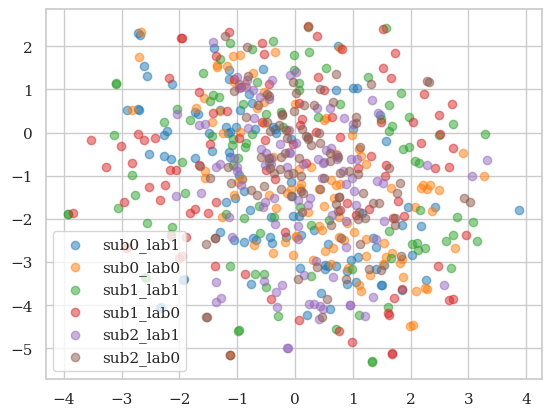

In [7]:
from matplotlib import colors

Y1 = [np.arange(0,300,1),np.arange(600,900,1),np.arange(1200,1500,1)]
Y0 = [np.arange(300,600,1),np.arange(900,1200,1),np.arange(1500,1800,1)]

# plt.scatter(X_embedded_rec[Y1[0],0], X_embedded_rec[Y1[0],1],c='r',alpha=0.5,label='sub1lab1')
# plt.scatter(X_embedded_rec[Y0[0],0], X_embedded_rec[Y0[0],1],c='y',alpha=0.5,label='sub1lab0')
# plt.scatter(X_embedded_rec[Y1[1],0], X_embedded_rec[Y1[1],1],c='b',alpha=0.5,label='sub2lab1')
# plt.scatter(X_embedded_rec[Y0[1],0], X_embedded_rec[Y0[1],1],c='g',alpha=0.5,label='sub2lab0')
# plt.scatter(X_embedded_rec[Y1[2],0], X_embedded_rec[Y1[2],1],c='m',alpha=0.5,label='sub3lab1')
# plt.scatter(X_embedded_rec[Y0[2],0], X_embedded_rec[Y0[2],1],c='c',alpha=0.5,label='sub3lab0')
for i,c in zip(range(6),list(colors.TABLEAU_COLORS)):
    plt.scatter(X_embedded_rec[i*100:(i+1)*100,0], X_embedded_rec[i*100:(i+1)*100,1],label="sub{}_lab{}".format(i//2,(i+1)%2),c=c,alpha=0.5)
plt.legend()

#### LOO recentered

In [7]:
n_cal = 7
n_class = 4
spdbn_accuracy_code_loo = np.zeros(12)
spdbn_tps_train_code_loo = np.zeros(12)
spdbn_tps_test_code_loo = np.zeros(12)
spdbn_accuracy_loo = np.zeros(12)

for i in range(len(subjects)):
    print("TL to the participant : ", i)
    # ind2take = [j for j in range(len(subjects)) if j!=i]
    ind2take = [j for j in [10,8,6,5] if j!=i][:3]
    X = X_parent_rec.copy()
    Y = Y_parent_rec.copy()
    domains = domains_parent_rec.copy()

    X_train = np.concatenate(X[ind2take]).reshape(-1,X.shape[-2],X.shape[-1])
    Y_train = np.concatenate(Y[ind2take]).reshape(-1)

    X_test = X[i]
    Y_test = Y[i]
    labels_code_test = labels_codes[i]

    print("balancing the number of ones and zeros")
    X_train, Y_train, domains_train = balance(X_train,Y_train,np.concatenate(domains[ind2take]))

    print(X_train.shape)
    print(X_test.shape)
    # X_std = X_train.std(axis=0)
    # X_train /= X_std + 1e-8
    # X_std = X_test.std(axis=0)
    # X_test /= X_std + 1e-8

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    batchsize = 64 #128 # 64 for burst
    epoch = 20 #45 # 20 for burst
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = SPDNetBN_Module(bimap_dims=[32,28,14,7])

    print("Fitting")
    start = time.time()
    weight_decay = 1e-4
    
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)

    # Convert data into PyTorch tensors
    X_train_tensor = torch.tensor(x_train, dtype=torch.float64)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_val_tensor = torch.tensor(x_val, dtype=torch.float64)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float64)
    y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

    # Create DataLoader for train, validation, and test sets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    # Define loss function and optimizer
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch_riemannian_adam.RiemannianAdam(clf.parameters(), lr=0.001)

    # Train the model
    num_epochs = 20
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_dataloader:
            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = clf(inputs)
            loss = criterion(outputs.float(), labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_dataloader)}")

    print("Training finished!")
    spdbn_tps_train_code_loo[i] = time.time() - start

    # Validation
    clf.eval()
    val_correct = 0
    val_pred = []
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = clf(inputs)
            _, predicted = torch.max(outputs, 1)
            val_pred.append(np.array(predicted))
            val_correct += (predicted == labels).sum().item()

    val_accuracy = balanced_accuracy_score(y_val,np.concatenate(val_pred))
    print(f"Validation Accuracy: {val_accuracy}")

    # Testing
    start = time.time()
    test_correct = 0
    y_pred= []
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = clf(inputs)
            _, predicted = torch.max(outputs, 1)
            y_pred.append(np.array(predicted))
            test_correct += (predicted == labels).sum().item()
            
    test_accuracy = balanced_accuracy_score(Y_test,np.concatenate(y_pred))
    print(f"Test Accuracy: {test_accuracy}")
    
    print("getting accuracy of participant ", i)
    y_pred = np.concatenate(y_pred)
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    spdbn_accuracy_loo[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=freq, consecutive=50, window_size=window_size
    )
    spdbn_tps_test_code_loo[i] = time.time() - start
    spdbn_accuracy_code_loo[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(spdbn_accuracy_loo)
print(spdbn_tps_train_code_loo)
print(spdbn_tps_test_code_loo)
print(spdbn_accuracy_code_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/score/LOOrecenter2_score",spdbn_accuracy_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/score_code/LOOrecenter2_score_code",spdbn_accuracy_code_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/tps_code/LOOrecenter2_tps_train_code",spdbn_tps_train_code_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/tps_code/LOOrecenter2_tps_test_code",spdbn_tps_test_code_loo)

TL to the participant :  0
balancing the number of ones and zeros
(7200, 32, 32)
(7020, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.662900038209616
Epoch 2, Loss: 0.4969515040809033
Epoch 3, Loss: 0.45461757773277806
Epoch 4, Loss: 0.4436594262426975
Epoch 5, Loss: 0.44040697959123876
Epoch 6, Loss: 0.43491260795032277
Epoch 7, Loss: 0.4329315990793939
Epoch 8, Loss: 0.43075790650704326
Epoch 9, Loss: 0.427710143958821
Epoch 10, Loss: 0.42459872540305643
Epoch 11, Loss: 0.42682260888464313
Epoch 12, Loss: 0.4245959941078635
Epoch 13, Loss: 0.4238740772593255
Epoch 14, Loss: 0.4193749024587519
Epoch 15, Loss: 0.42118101786164674
Epoch 16, Loss: 0.4211764658490817
Epoch 17, Loss: 0.41854791576955835
Epoch 18, Loss: 0.4160403803575273
Epoch 19, Loss: 0.4187120289779177
Epoch 20, Loss: 0.4171321411051002
Training finished!
Validation Accuracy: 0.7817631806395852
Test Accuracy: 0.7578049828178695
getting accuracy of participant  0
TL to the participant :  1
balancing t

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  2
balancing the number of ones and zeros
(7200, 32, 32)
(7020, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6280478122187596
Epoch 2, Loss: 0.47532284113706325
Epoch 3, Loss: 0.4507441286947213
Epoch 4, Loss: 0.44398262044962716
Epoch 5, Loss: 0.44066369124487337
Epoch 6, Loss: 0.43521032175597024
Epoch 7, Loss: 0.43395378922714906
Epoch 8, Loss: 0.42967576927998485
Epoch 9, Loss: 0.42475202621198166
Epoch 10, Loss: 0.42504583795865375
Epoch 11, Loss: 0.4253230638363782
Epoch 12, Loss: 0.4212360034386317
Epoch 13, Loss: 0.4180157441718906
Epoch 14, Loss: 0.4208363887726092
Epoch 15, Loss: 0.41658206371700063
Epoch 16, Loss: 0.4201809708394256
Epoch 17, Loss: 0.41803060545056475
Epoch 18, Loss: 0.4144076013974115
Epoch 19, Loss: 0.4156190571831722
Epoch 20, Loss: 0.414514521465582
Training finished!
Validation Accuracy: 0.8020740694913813
Test Accuracy: 0.8401932989690721
getting accuracy of participant  2
TL to the participant :  3
balancin

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  6
balancing the number of ones and zeros
(7200, 32, 32)
(7020, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6464410798222411
Epoch 2, Loss: 0.5103618721751606
Epoch 3, Loss: 0.47948527248466716
Epoch 4, Loss: 0.4631803026970695
Epoch 5, Loss: 0.45325689894311566
Epoch 6, Loss: 0.4494412737149818
Epoch 7, Loss: 0.4458581901648465
Epoch 8, Loss: 0.44299494255991545
Epoch 9, Loss: 0.44075535559186746
Epoch 10, Loss: 0.43630634189820755
Epoch 11, Loss: 0.43339070677757263
Epoch 12, Loss: 0.43273522251961277
Epoch 13, Loss: 0.4329577097121407
Epoch 14, Loss: 0.42919466337736917
Epoch 15, Loss: 0.42888468971439436
Epoch 16, Loss: 0.42442386524350034
Epoch 17, Loss: 0.424693903502296
Epoch 18, Loss: 0.42616596555008607
Epoch 19, Loss: 0.4194215387105942
Epoch 20, Loss: 0.4174857437610626
Training finished!
Validation Accuracy: 0.7688695652173914
Test Accuracy: 0.7533419243986255
getting accuracy of participant  6


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  7
balancing the number of ones and zeros
(7200, 32, 32)
(7020, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6213483883469713
Epoch 2, Loss: 0.4915741933327095
Epoch 3, Loss: 0.4690003418454937
Epoch 4, Loss: 0.46180979673768957
Epoch 5, Loss: 0.4538126722270367
Epoch 6, Loss: 0.4486784473353741
Epoch 7, Loss: 0.4433085526905808
Epoch 8, Loss: 0.4428102967201495
Epoch 9, Loss: 0.4372936048928429
Epoch 10, Loss: 0.4355340488985473
Epoch 11, Loss: 0.43214451302500334
Epoch 12, Loss: 0.4321017659762326
Epoch 13, Loss: 0.43230971635556686
Epoch 14, Loss: 0.4284580545682533
Epoch 15, Loss: 0.4306990010481255
Epoch 16, Loss: 0.42703531624055374
Epoch 17, Loss: 0.42692437592674704
Epoch 18, Loss: 0.425543668515542
Epoch 19, Loss: 0.4237125252976137
Epoch 20, Loss: 0.4238322762882008
Training finished!
Validation Accuracy: 0.7168149796069707
Test Accuracy: 0.5662414089347079
getting accuracy of participant  7
TL to the participant :  8
balancing the

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  11
balancing the number of ones and zeros
(7200, 32, 32)
(7020, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6500872846911935
Epoch 2, Loss: 0.5186212197238323
Epoch 3, Loss: 0.46594228230270684
Epoch 4, Loss: 0.4566069385584663
Epoch 5, Loss: 0.45035212501591326
Epoch 6, Loss: 0.4428004504126661
Epoch 7, Loss: 0.43974197261473713
Epoch 8, Loss: 0.4351474560943304
Epoch 9, Loss: 0.435121702505093
Epoch 10, Loss: 0.43319559331033747
Epoch 11, Loss: 0.43346767536565367
Epoch 12, Loss: 0.4306628096337412
Epoch 13, Loss: 0.43157391922146665
Epoch 14, Loss: 0.4276251556242214
Epoch 15, Loss: 0.4231989459664214
Epoch 16, Loss: 0.42394813427738115
Epoch 17, Loss: 0.4251953269921097
Epoch 18, Loss: 0.41789399803269145
Epoch 19, Loss: 0.4177880003756168
Epoch 20, Loss: 0.4174889510168749
Training finished!
Validation Accuracy: 0.7993825969515724
Test Accuracy: 0.6855455326460481
getting accuracy of participant  11
[0.75780498 0.7319201  0.8401933  0

#### LOOA recentered

In [13]:
n_cal = 4
n_class = 4
spdbn_accuracy_code_loo = np.zeros(12)
spdbn_tps_train_code_loo = np.zeros(12)
spdbn_tps_test_code_loo = np.zeros(12)
spdbn_accuracy_loo = np.zeros(12)

nb_samples_cal = int(n_cal*n_class*(2.2-window_size)*freq)
print(nb_samples_cal)

for i in range(len(subjects)):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(len(subjects)) if j!=i]
    X = X_parent_rec.copy()
    Y = Y_parent_rec.copy()
    domains = domains_parent_rec.copy()

    X_train = np.concatenate([np.concatenate(X[ind2take]).reshape(-1,X.shape[-2],X.shape[-1]),X[i][:nb_samples_cal]]).reshape(-1,X.shape[-2],X.shape[-1])
    Y_train = np.concatenate([np.concatenate(Y[ind2take]).reshape(-1),Y[i][:nb_samples_cal]]).reshape(-1)
    domains_train = np.concatenate([np.concatenate(domains[ind2take]).reshape(-1),domains[i][:nb_samples_cal]]).reshape(-1)
    X_test = X[i][nb_samples_cal:]
    Y_test = Y[i][nb_samples_cal:]
    domains_test = domains[i][nb_samples_cal:]

    labels_code_test = labels_codes[i][n_cal*n_class:]

    print("balancing the number of ones and zeros")
    X_train, Y_train, domains_train = balance(X_train,Y_train,domains_train)

    print(X_train.shape)
    print(X_test.shape)
    # X_std = X_train.std(axis=0)
    # X_train /= X_std + 1e-8
    # X_std = X_test.std(axis=0)
    # X_test /= X_std + 1e-8

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    batchsize = 64 #128 # 64 for burst
    epoch = 20 #45 # 20 for burst
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = SPDNetBN_Module(bimap_dims=[32,28,14,7])

    print("Fitting")
    start = time.time()
    weight_decay = 1e-4
    
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)

    # Convert data into PyTorch tensors
    X_train_tensor = torch.tensor(x_train, dtype=torch.float64)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_val_tensor = torch.tensor(x_val, dtype=torch.float64)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float64)
    y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

    # Create DataLoader for train, validation, and test sets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    # Define loss function and optimizer
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch_riemannian_adam.RiemannianAdam(clf.parameters(), lr=0.001)

    # Train the model
    num_epochs = 20
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_dataloader:
            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = clf(inputs)
            loss = criterion(outputs.float(), labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_dataloader)}")

    print("Training finished!")
    spdbn_tps_train_code_loo[i] = time.time() - start

    # Validation
    clf.eval()
    val_correct = 0
    val_pred = []
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = clf(inputs)
            _, predicted = torch.max(outputs, 1)
            val_pred.append(np.array(predicted))
            val_correct += (predicted == labels).sum().item()

    val_accuracy = balanced_accuracy_score(y_val,np.concatenate(val_pred))
    print(f"Validation Accuracy: {val_accuracy}")

    # Testing
    start = time.time()
    test_correct = 0
    y_pred= []
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = clf(inputs)
            _, predicted = torch.max(outputs, 1)
            y_pred.append(np.array(predicted))
            test_correct += (predicted == labels).sum().item()
            
    test_accuracy = balanced_accuracy_score(Y_test,np.concatenate(y_pred))
    print(f"Test Accuracy: {test_accuracy}")
    
    print("getting accuracy of participant ", i)
    y_pred = np.concatenate(y_pred)
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    spdbn_accuracy_loo[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=freq, consecutive=50, window_size=window_size
    )
    spdbn_tps_test_code_loo[i] = time.time() - start
    spdbn_accuracy_code_loo[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(spdbn_accuracy_loo)
print(spdbn_tps_train_code_loo)
print(spdbn_tps_test_code_loo)
print(spdbn_accuracy_code_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/score/LOOArecenter_score",spdbn_accuracy_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/score_code/LOOArecenter_score_code",spdbn_accuracy_code_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/tps_code/LOOArecenter_tps_train_code",spdbn_tps_train_code_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/tps_code/LOOArecenter_tps_test_code",spdbn_tps_test_code_loo)

1872
TL to the participant :  0
balancing the number of ones and zeros
(27040, 32, 32)
(5148, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.5181760892780434
Epoch 2, Loss: 0.44064934626026103
Epoch 3, Loss: 0.42919298693576824
Epoch 4, Loss: 0.42363363441832735
Epoch 5, Loss: 0.4194224422059347
Epoch 6, Loss: 0.41827651893529366
Epoch 7, Loss: 0.41321929076838054
Epoch 8, Loss: 0.413486000942433
Epoch 9, Loss: 0.41088180799340324
Epoch 10, Loss: 0.4096518887935348
Epoch 11, Loss: 0.40908968190508566
Epoch 12, Loss: 0.4100382918213296
Epoch 13, Loss: 0.4082028274069934
Epoch 14, Loss: 0.40825362331441695
Epoch 15, Loss: 0.40674543149984416
Epoch 16, Loss: 0.40610758526118723
Epoch 17, Loss: 0.4058061894078267
Epoch 18, Loss: 0.4053060462468565
Epoch 19, Loss: 0.4033108348921528
Epoch 20, Loss: 0.4035842101092101
Training finished!
Validation Accuracy: 0.769631096464654
Test Accuracy: 0.7701733833177131
getting accuracy of participant  0
TL to the participant :  1
bal

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  2
balancing the number of ones and zeros
(27040, 32, 32)
(5148, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.5197707122861557
Epoch 2, Loss: 0.43494454558127194
Epoch 3, Loss: 0.4272654171534411
Epoch 4, Loss: 0.4234726863896127
Epoch 5, Loss: 0.4213302311465496
Epoch 6, Loss: 0.4187602643265812
Epoch 7, Loss: 0.4184418376975172
Epoch 8, Loss: 0.4156945887513048
Epoch 9, Loss: 0.41618470773296407
Epoch 10, Loss: 0.4134962438285507
Epoch 11, Loss: 0.41083515077594696
Epoch 12, Loss: 0.4086282982679177
Epoch 13, Loss: 0.4095514904795669
Epoch 14, Loss: 0.4054448916295695
Epoch 15, Loss: 0.405829104734218
Epoch 16, Loss: 0.4051624942482926
Epoch 17, Loss: 0.4048032430526153
Epoch 18, Loss: 0.40384784239170746
Epoch 19, Loss: 0.40143605683419337
Epoch 20, Loss: 0.4013169434048685
Training finished!
Validation Accuracy: 0.7649132945762525
Test Accuracy: 0.7507907685098407
getting accuracy of participant  2


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  3
balancing the number of ones and zeros
(27040, 32, 32)
(5148, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.5221847269948073
Epoch 2, Loss: 0.43494764369303784
Epoch 3, Loss: 0.42701430489697795
Epoch 4, Loss: 0.4219466425146018
Epoch 5, Loss: 0.4202051427889997
Epoch 6, Loss: 0.4185661972742381
Epoch 7, Loss: 0.41733292511754777
Epoch 8, Loss: 0.41572772083789344
Epoch 9, Loss: 0.4147099579178442
Epoch 10, Loss: 0.41367426240850935
Epoch 11, Loss: 0.412601270818022
Epoch 12, Loss: 0.4143890335256346
Epoch 13, Loss: 0.41130675942566136
Epoch 14, Loss: 0.4106985558596809
Epoch 15, Loss: 0.41001496368192936
Epoch 16, Loss: 0.4092295932879285
Epoch 17, Loss: 0.4089712270210421
Epoch 18, Loss: 0.40933147808072445
Epoch 19, Loss: 0.4078050013289364
Epoch 20, Loss: 0.40572047585577475
Training finished!
Validation Accuracy: 0.8219394544244844
Test Accuracy: 0.800292877225867
getting accuracy of participant  3
TL to the participant :  4
balancing

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  8
balancing the number of ones and zeros
(27040, 32, 32)
(5148, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.5225176297304198
Epoch 2, Loss: 0.43128424593469916
Epoch 3, Loss: 0.4218483103385435
Epoch 4, Loss: 0.4179847366384321
Epoch 5, Loss: 0.41619199174126303
Epoch 6, Loss: 0.41400482710890885
Epoch 7, Loss: 0.4127443314693731
Epoch 8, Loss: 0.40994498188414286
Epoch 9, Loss: 0.40806442483516503
Epoch 10, Loss: 0.4065210103128213
Epoch 11, Loss: 0.40507760557915595
Epoch 12, Loss: 0.4033546062513912
Epoch 13, Loss: 0.4026593307028292
Epoch 14, Loss: 0.4000444153709987
Epoch 15, Loss: 0.39800723135627786
Epoch 16, Loss: 0.3959696687112643
Epoch 17, Loss: 0.3965146178648541
Epoch 18, Loss: 0.39437384273749326
Epoch 19, Loss: 0.3936615522139342
Epoch 20, Loss: 0.39037415510400386
Training finished!
Validation Accuracy: 0.7994173816038337
Test Accuracy: 0.6674613402061855
getting accuracy of participant  8


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  9
balancing the number of ones and zeros
(27040, 32, 32)
(5148, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.5040414092421844
Epoch 2, Loss: 0.4438486662436658
Epoch 3, Loss: 0.4356659524084076
Epoch 4, Loss: 0.4301354909349927
Epoch 5, Loss: 0.4268168136673024
Epoch 6, Loss: 0.4247017823492135
Epoch 7, Loss: 0.4222454531924931
Epoch 8, Loss: 0.421195040928723
Epoch 9, Loss: 0.41935579819003427
Epoch 10, Loss: 0.418242395589045
Epoch 11, Loss: 0.41632466898189757
Epoch 12, Loss: 0.41742076343438755
Epoch 13, Loss: 0.4140476612594184
Epoch 14, Loss: 0.4136041817780868
Epoch 15, Loss: 0.4122995558216816
Epoch 16, Loss: 0.4129560391499302
Epoch 17, Loss: 0.41513179007946976
Epoch 18, Loss: 0.4122380370621293
Epoch 19, Loss: 0.41299939065624097
Epoch 20, Loss: 0.4120967212546216
Training finished!
Validation Accuracy: 0.6873862512404602
Test Accuracy: 0.6604967197750703
getting accuracy of participant  9
TL to the participant :  10
balancing th

#### Train test recentered

In [14]:
n_cal = 7
n_class = 4
spdbn_accuracy_code_loo = np.zeros(12)
spdbn_tps_train_code_loo = np.zeros(12)
spdbn_tps_test_code_loo = np.zeros(12)
spdbn_accuracy_loo = np.zeros(12)
nb_samples_cal = int(n_cal*n_class*(2.2-window_size)*freq)

for i in range(len(subjects)):
    print("TL to the participant : ", i)
    X = X_parent_rec.copy()
    Y = Y_parent_rec.copy()
    domains = domains_parent_rec.copy()

    X_train = X[i][:nb_samples_cal]
    Y_train = Y[i][:nb_samples_cal]
    domains_train = domains[i][:nb_samples_cal]

    X_test = X[i][nb_samples_cal:]
    Y_test = Y[i][nb_samples_cal:]
    labels_code_test = labels_codes[i][n_cal*n_class:]

    print("balancing the number of ones and zeros")
    X_train, Y_train, domains_train = balance(X_train,Y_train,domains_train)

    print(X_train.shape)
    print(X_test.shape)
    # X_std = X_train.std(axis=0)
    # X_train /= X_std + 1e-8
    # X_std = X_test.std(axis=0)
    # X_test /= X_std + 1e-8

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    batchsize = 64 #128 # 64 for burst
    epoch = 20 #45 # 20 for burst
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = SPDNetBN_Module(bimap_dims=[32,28,14,7])

    print("Fitting")
    start = time.time()
    weight_decay = 1e-4
    
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)

    # Convert data into PyTorch tensors
    X_train_tensor = torch.tensor(x_train, dtype=torch.float64)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_val_tensor = torch.tensor(x_val, dtype=torch.float64)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float64)
    y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

    # Create DataLoader for train, validation, and test sets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    # Define loss function and optimizer
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch_riemannian_adam.RiemannianAdam(clf.parameters(), lr=0.001)

    # Train the model
    num_epochs = 20
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_dataloader:
            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = clf(inputs)
            loss = criterion(outputs.float(), labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_dataloader)}")

    print("Training finished!")
    spdbn_tps_train_code_loo[i] = time.time() - start

    # Validation
    clf.eval()
    val_correct = 0
    val_pred = []
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = clf(inputs)
            _, predicted = torch.max(outputs, 1)
            val_pred.append(np.array(predicted))
            val_correct += (predicted == labels).sum().item()

    val_accuracy = balanced_accuracy_score(y_val,np.concatenate(val_pred))
    print(f"Validation Accuracy: {val_accuracy}")

    # Testing
    start = time.time()
    test_correct = 0
    y_pred= []
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = clf(inputs)
            _, predicted = torch.max(outputs, 1)
            y_pred.append(np.array(predicted))
            test_correct += (predicted == labels).sum().item()
            
    test_accuracy = balanced_accuracy_score(Y_test,np.concatenate(y_pred))
    print(f"Test Accuracy: {test_accuracy}")
    
    print("getting accuracy of participant ", i)
    y_pred = np.concatenate(y_pred)
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    spdbn_accuracy_loo[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=freq, consecutive=50, window_size=window_size
    )
    spdbn_tps_test_code_loo[i] = time.time() - start
    spdbn_accuracy_code_loo[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(spdbn_accuracy_loo)
print(spdbn_tps_train_code_loo)
print(spdbn_tps_test_code_loo)
print(spdbn_accuracy_code_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/score/WOrecenter_score",spdbn_accuracy_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/score_code/WOrecenter_score_code",spdbn_accuracy_code_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/temps_train_code/WOrecenter_tps_train_code",spdbn_tps_train_code_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/temps_test_code/WOrecenter_tps_test_code",spdbn_tps_test_code_loo)

TL to the participant :  0


balancing the number of ones and zeros
(1120, 32, 32)
(3744, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6971367336809635
Epoch 2, Loss: 0.682292640209198
Epoch 3, Loss: 0.6629874520003796
Epoch 4, Loss: 0.6279683411121368
Epoch 5, Loss: 0.5773871466517448
Epoch 6, Loss: 0.5343010723590851
Epoch 7, Loss: 0.49250806495547295
Epoch 8, Loss: 0.4529633056372404
Epoch 9, Loss: 0.4254454318434
Epoch 10, Loss: 0.40539074689149857
Epoch 11, Loss: 0.3890000246465206
Epoch 12, Loss: 0.3778130076825619
Epoch 13, Loss: 0.36410319060087204
Epoch 14, Loss: 0.3563872314989567
Epoch 15, Loss: 0.35252060927450657
Epoch 16, Loss: 0.3409002721309662
Epoch 17, Loss: 0.3289609607309103
Epoch 18, Loss: 0.32972571440041065
Epoch 19, Loss: 0.32395063526928425
Epoch 20, Loss: 0.3191244453191757
Training finished!
Validation Accuracy: 0.8409961685823755
Test Accuracy: 0.8500322164948453
getting accuracy of participant  0


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  1
balancing the number of ones and zeros
(1120, 32, 32)
(3744, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6972601190209389
Epoch 2, Loss: 0.6732214167714119
Epoch 3, Loss: 0.6486781351268291
Epoch 4, Loss: 0.6185472644865513
Epoch 5, Loss: 0.5805824138224125
Epoch 6, Loss: 0.5364254396408796
Epoch 7, Loss: 0.5097815133631229
Epoch 8, Loss: 0.4882080126553774
Epoch 9, Loss: 0.4802714716643095
Epoch 10, Loss: 0.46477148681879044
Epoch 11, Loss: 0.4606698229908943
Epoch 12, Loss: 0.4518072232604027
Epoch 13, Loss: 0.44632309302687645
Epoch 14, Loss: 0.43659822829067707
Epoch 15, Loss: 0.42816184274852276
Epoch 16, Loss: 0.42951954901218414
Epoch 17, Loss: 0.4205460771918297
Epoch 18, Loss: 0.4210333414375782
Epoch 19, Loss: 0.41657485254108906
Epoch 20, Loss: 0.4139592610299587
Training finished!
Validation Accuracy: 0.7003225806451613
Test Accuracy: 0.7485341494845361
getting accuracy of participant  1
TL to the participant :  2
balancing t

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  4
balancing the number of ones and zeros
(1120, 32, 32)
(3744, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.7019108645617962
Epoch 2, Loss: 0.67736741527915
Epoch 3, Loss: 0.6558062694966793
Epoch 4, Loss: 0.6214449368417263
Epoch 5, Loss: 0.563482616096735
Epoch 6, Loss: 0.506526030600071
Epoch 7, Loss: 0.46335211768746376
Epoch 8, Loss: 0.42872838117182255
Epoch 9, Loss: 0.4106604866683483
Epoch 10, Loss: 0.3876892775297165
Epoch 11, Loss: 0.375956941395998
Epoch 12, Loss: 0.3608567751944065
Epoch 13, Loss: 0.35446853935718536
Epoch 14, Loss: 0.34737823717296124
Epoch 15, Loss: 0.3388976827263832
Epoch 16, Loss: 0.3329290896654129
Epoch 17, Loss: 0.3295781686902046
Epoch 18, Loss: 0.3242987859994173
Epoch 19, Loss: 0.31984044052660465
Epoch 20, Loss: 0.3170814486220479
Training finished!
Validation Accuracy: 0.8919961427193828
Test Accuracy: 0.8359777706185567
getting accuracy of participant  4
TL to the participant :  5
balancing the num

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  7
balancing the number of ones and zeros
(1120, 32, 32)
(3744, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6985907405614853
Epoch 2, Loss: 0.6793649531900883
Epoch 3, Loss: 0.645826380699873
Epoch 4, Loss: 0.5796525180339813
Epoch 5, Loss: 0.49026724323630333
Epoch 6, Loss: 0.4224397838115692
Epoch 7, Loss: 0.3839489817619324
Epoch 8, Loss: 0.3589301500469446
Epoch 9, Loss: 0.3476825337857008
Epoch 10, Loss: 0.33347557485103607
Epoch 11, Loss: 0.3214314552024007
Epoch 12, Loss: 0.31362891755998135
Epoch 13, Loss: 0.30026603303849697
Epoch 14, Loss: 0.29923069197684526
Epoch 15, Loss: 0.2895486010238528
Epoch 16, Loss: 0.2883009696379304
Epoch 17, Loss: 0.2856099810451269
Epoch 18, Loss: 0.2758106766268611
Epoch 19, Loss: 0.2729570157825947
Epoch 20, Loss: 0.2654208168387413
Training finished!
Validation Accuracy: 0.9208506555804286
Test Accuracy: 0.8745086984536083
getting accuracy of participant  7
TL to the participant :  8
balancing the

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  9
balancing the number of ones and zeros
(1120, 32, 32)
(3744, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6911994218826294
Epoch 2, Loss: 0.6390408761799335
Epoch 3, Loss: 0.5678362138569355
Epoch 4, Loss: 0.47130937315523624
Epoch 5, Loss: 0.38515750877559185
Epoch 6, Loss: 0.33822754584252834
Epoch 7, Loss: 0.3155992701649666
Epoch 8, Loss: 0.2946949936449528
Epoch 9, Loss: 0.2870436869561672
Epoch 10, Loss: 0.26972909830510616
Epoch 11, Loss: 0.25834382604807615
Epoch 12, Loss: 0.2512161023914814
Epoch 13, Loss: 0.2417144225910306
Epoch 14, Loss: 0.24001725763082504
Epoch 15, Loss: 0.22398243751376867
Epoch 16, Loss: 0.22235908918082714
Epoch 17, Loss: 0.22163147386163473
Epoch 18, Loss: 0.2067700121551752
Epoch 19, Loss: 0.21352965105324984
Epoch 20, Loss: 0.20350508019328117
Training finished!
Validation Accuracy: 0.935823754789272
Test Accuracy: 0.9264014175257732
getting accuracy of participant  9


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  10
balancing the number of ones and zeros
(1120, 32, 32)
(3744, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6939576342701912
Epoch 2, Loss: 0.6742031835019588
Epoch 3, Loss: 0.6439589820802212
Epoch 4, Loss: 0.5991391353309155
Epoch 5, Loss: 0.546627763658762
Epoch 6, Loss: 0.4960367064923048
Epoch 7, Loss: 0.4639978799968958
Epoch 8, Loss: 0.43841708451509476
Epoch 9, Loss: 0.4297982156276703
Epoch 10, Loss: 0.41976010240614414
Epoch 11, Loss: 0.4085530862212181
Epoch 12, Loss: 0.40382610633969307
Epoch 13, Loss: 0.3979945480823517
Epoch 14, Loss: 0.40137671679258347
Epoch 15, Loss: 0.3880382049828768
Epoch 16, Loss: 0.3811160121113062
Epoch 17, Loss: 0.37872265465557575
Epoch 18, Loss: 0.37659477069973946
Epoch 19, Loss: 0.37409552559256554
Epoch 20, Loss: 0.3667121082544327
Training finished!
Validation Accuracy: 0.8012820512820513
Test Accuracy: 0.7988160438144329
getting accuracy of participant  10
TL to the participant :  11
balancin

In [12]:
labels_code_test.shape

(0, 60)

#### LOO SPDNet recentered

In [9]:
n_cal = 4
n_class = 4
spd_accuracy_code_loo = np.zeros(12)
spd_tps_train_code_loo = np.zeros(12)
spd_tps_test_code_loo = np.zeros(12)
spd_accuracy_loo = np.zeros(12)

for i in range(len(subjects)):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(len(subjects)) if j!=i]
    X = X_parent_rec.copy()
    Y = Y_parent_rec.copy()
    domains = domains_parent_rec.copy()

    X_train = np.concatenate(X[ind2take]).reshape(-1,X.shape[-2],X.shape[-1])
    Y_train = np.concatenate(Y[ind2take]).reshape(-1)

    X_test = X[i]
    Y_test = Y[i]
    labels_code_test = labels_codes[i]

    print("balancing the number of ones and zeros")
    X_train, Y_train, domains_train = balance(X_train,Y_train,np.concatenate(domains[ind2take]))

    print(X_train.shape)
    print(X_test.shape)
    # X_std = X_train.std(axis=0)
    # X_train /= X_std + 1e-8
    # X_std = X_test.std(axis=0)
    # X_test /= X_std + 1e-8

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    batchsize = 64 #128 # 64 for burst
    epoch = 20 #45 # 20 for burst
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = SPDNet_Tensorflow(bimap_dims=[28,14,7])

    print("Fitting")
    start = time.time()
    weight_decay = 1e-4
    
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)
    history = clf.fit(np.array(x_train), y_train,
                    batch_size=batchsize, epochs=epoch,
                    validation_data=(np.array(x_val), y_val), shuffle=True)
    spd_tps_train_code_loo[i] = time.time() - start

    print("getting accuracy of participant ", i)
    start = time.time()
    y_pred = clf.predict(X_test)[:]
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    spd_accuracy_loo[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=freq, consecutive=50, window_size=window_size
    )
    spd_tps_test_code_loo[i] = time.time() - start
    spd_accuracy_code_loo[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(spd_accuracy_loo)
print(spd_tps_train_code_loo)
print(spd_tps_test_code_loo)
print(spd_accuracy_code_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/score/LOOrecenter_score",spd_accuracy_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/score_code/LOOrecenter_score_code",spd_accuracy_code_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/temps_train_code/LOOrecenter_tps_train_code",spd_tps_train_code_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/temps_test_code/LOOrecenter_tps_test_code",spd_tps_test_code_loo)

TL to the participant :  0
balancing the number of ones and zeros
(26400, 32, 32)
(7020, 32, 32)
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 6s 13ms/step - loss: 0.5404 - sparse_categorical_accuracy: 0.7469 - val_loss: 0.4538 - val_sparse_categorical_accuracy: 0.8042
Epoch 2/20
372/372 [==============================] - 5s 12ms/step - loss: 0.4520 - sparse_categorical_accuracy: 0.7955 - val_loss: 0.4555 - val_sparse_categorical_accuracy: 0.7913
Epoch 3/20
372/372 [==============================] - 5s 12ms/step - loss: 0.4395 - sparse_categorical_accuracy: 0.8006 - val_loss: 0.4368 - val_sparse_categorical_accuracy: 0.7981
Epoch 4/20
372/372 [==============================] - 5s 12ms/step - loss: 0.4352 - sparse_categorical_accuracy: 0.8021 - val_loss: 0.4216 - val_sparse_categorical_accuracy: 0.8102
Epoch 5/20
372/372 [==============================] - 5s 13ms/step - loss: 0.4328 - sparse_categorical_accuracy: 0.8015 - val_loss: 0.4855

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  8
balancing the number of ones and zeros
(26400, 32, 32)
(7020, 32, 32)
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 6s 15ms/step - loss: 0.5211 - sparse_categorical_accuracy: 0.7655 - val_loss: 0.4411 - val_sparse_categorical_accuracy: 0.8121
Epoch 2/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4305 - sparse_categorical_accuracy: 0.8076 - val_loss: 0.4198 - val_sparse_categorical_accuracy: 0.8098
Epoch 3/20
372/372 [==============================] - 6s 15ms/step - loss: 0.4173 - sparse_categorical_accuracy: 0.8120 - val_loss: 0.4109 - val_sparse_categorical_accuracy: 0.8163
Epoch 4/20
372/372 [==============================] - 5s 15ms/step - loss: 0.4116 - sparse_categorical_accuracy: 0.8133 - val_loss: 0.4061 - val_sparse_categorical_accuracy: 0.8205
Epoch 5/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4087 - sparse_categorical_accuracy: 0.8170 - val_loss: 0.4067

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  9
balancing the number of ones and zeros
(26400, 32, 32)
(7020, 32, 32)
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 7s 16ms/step - loss: 0.5573 - sparse_categorical_accuracy: 0.7311 - val_loss: 0.4930 - val_sparse_categorical_accuracy: 0.7742
Epoch 2/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4585 - sparse_categorical_accuracy: 0.7910 - val_loss: 0.4617 - val_sparse_categorical_accuracy: 0.7811
Epoch 3/20
372/372 [==============================] - 6s 15ms/step - loss: 0.4422 - sparse_categorical_accuracy: 0.7963 - val_loss: 0.4558 - val_sparse_categorical_accuracy: 0.7848
Epoch 4/20
372/372 [==============================] - 6s 15ms/step - loss: 0.4370 - sparse_categorical_accuracy: 0.7998 - val_loss: 0.4534 - val_sparse_categorical_accuracy: 0.7845
Epoch 5/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4347 - sparse_categorical_accuracy: 0.8003 - val_loss: 0.4498

#### LOOA SPDNet recentered

In [10]:
n_cal = 4
n_class = 4
spd_accuracy_code_looa = np.zeros(12)
spd_tps_train_code_looa = np.zeros(12)
spd_tps_test_code_looa = np.zeros(12)
spd_accuracy_looa = np.zeros(12)

nb_samples_cal = int(n_cal*n_class*(2.2-window_size)*freq)
print(nb_samples_cal)

for i in range(len(subjects)):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(len(subjects)) if j!=i]
    X = X_parent_rec.copy()
    Y = Y_parent_rec.copy()
    domains = domains_parent_rec.copy()

    X_train = np.concatenate([np.concatenate(X[ind2take]).reshape(-1,X.shape[-2],X.shape[-1]),X[i][:nb_samples_cal]]).reshape(-1,X.shape[-2],X.shape[-1])
    Y_train = np.concatenate([np.concatenate(Y[ind2take]).reshape(-1),Y[i][:nb_samples_cal]]).reshape(-1)
    domains_train = np.concatenate([np.concatenate(domains[ind2take]).reshape(-1),domains[i][:nb_samples_cal]]).reshape(-1)
    X_test = X[i][nb_samples_cal:]
    Y_test = Y[i][nb_samples_cal:]
    domains_test = domains[i][nb_samples_cal:]

    labels_code_test = labels_codes[i][n_cal*n_class:]

    print("balancing the number of ones and zeros")
    X_train, Y_train, domains_train = balance(X_train,Y_train,domains_train)

    print(X_train.shape)
    print(X_test.shape)
    # X_std = X_train.std(axis=0)
    # X_train /= X_std + 1e-8
    # X_std = X_test.std(axis=0)
    # X_test /= X_std + 1e-8

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    batchsize = 64 #128 # 64 for burst
    epoch = 20 #45 # 20 for burst
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = SPDNet_Tensorflow(bimap_dims=[28,14,7])

    print("Fitting")
    start = time.time()
    weight_decay = 1e-4
    
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)
    history = clf.fit(np.array(x_train), y_train,
                    batch_size=batchsize, epochs=epoch,
                    validation_data=(np.array(x_val), y_val), shuffle=True)
    spd_tps_train_code_looa[i] = time.time() - start

    print("getting accuracy of participant ", i)
    start = time.time()
    y_pred = clf.predict(X_test)[:]
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    spd_accuracy_looa[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=freq, consecutive=50, window_size=window_size
    )
    spd_tps_test_code_looa[i] = time.time() - start
    spd_accuracy_code_looa[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(spd_accuracy_looa)
print(spd_tps_train_code_looa)
print(spd_tps_test_code_looa)
print(spd_accuracy_code_looa)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/score/LOOArecenter_score",spd_accuracy_looa)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/score_code/LOOArecenter_score_code",spd_accuracy_code_looa)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/temps_train_code/LOOArecenter_tps_train_code",spd_tps_train_code_looa)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/temps_test_code/LOOArecenter_tps_test_code",spd_tps_test_code_looa)

1872
TL to the participant :  0
balancing the number of ones and zeros
(27040, 32, 32)
(5148, 32, 32)
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 8s 19ms/step - loss: 0.5485 - sparse_categorical_accuracy: 0.7309 - val_loss: 0.4662 - val_sparse_categorical_accuracy: 0.7925
Epoch 2/20
381/381 [==============================] - 7s 17ms/step - loss: 0.4497 - sparse_categorical_accuracy: 0.7980 - val_loss: 0.4459 - val_sparse_categorical_accuracy: 0.7907
Epoch 3/20
381/381 [==============================] - 6s 15ms/step - loss: 0.4375 - sparse_categorical_accuracy: 0.8013 - val_loss: 0.4689 - val_sparse_categorical_accuracy: 0.7774
Epoch 4/20
381/381 [==============================] - 6s 15ms/step - loss: 0.4331 - sparse_categorical_accuracy: 0.8044 - val_loss: 0.4603 - val_sparse_categorical_accuracy: 0.7792
Epoch 5/20
381/381 [==============================] - 6s 15ms/step - loss: 0.4300 - sparse_categorical_accuracy: 0.8041 - val_loss: 0

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  3
balancing the number of ones and zeros
(27040, 32, 32)
(5148, 32, 32)
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 6s 13ms/step - loss: 0.5294 - sparse_categorical_accuracy: 0.7500 - val_loss: 0.4766 - val_sparse_categorical_accuracy: 0.7829
Epoch 2/20
381/381 [==============================] - 5s 14ms/step - loss: 0.4470 - sparse_categorical_accuracy: 0.7976 - val_loss: 0.4396 - val_sparse_categorical_accuracy: 0.8010
Epoch 3/20
381/381 [==============================] - 5s 14ms/step - loss: 0.4348 - sparse_categorical_accuracy: 0.8003 - val_loss: 0.4244 - val_sparse_categorical_accuracy: 0.8084
Epoch 4/20
381/381 [==============================] - 5s 14ms/step - loss: 0.4296 - sparse_categorical_accuracy: 0.8034 - val_loss: 0.4208 - val_sparse_categorical_accuracy: 0.8081
Epoch 5/20
381/381 [==============================] - 5s 14ms/step - loss: 0.4267 - sparse_categorical_accuracy: 0.8064 - val_loss: 0.4200

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  9
balancing the number of ones and zeros
(27040, 32, 32)
(5148, 32, 32)
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 6s 13ms/step - loss: 0.5293 - sparse_categorical_accuracy: 0.7521 - val_loss: 0.4625 - val_sparse_categorical_accuracy: 0.7877
Epoch 2/20
381/381 [==============================] - 5s 14ms/step - loss: 0.4538 - sparse_categorical_accuracy: 0.7935 - val_loss: 0.4452 - val_sparse_categorical_accuracy: 0.7929
Epoch 3/20
381/381 [==============================] - 5s 14ms/step - loss: 0.4437 - sparse_categorical_accuracy: 0.7973 - val_loss: 0.4551 - val_sparse_categorical_accuracy: 0.7885
Epoch 4/20
381/381 [==============================] - 5s 14ms/step - loss: 0.4387 - sparse_categorical_accuracy: 0.7983 - val_loss: 0.4419 - val_sparse_categorical_accuracy: 0.7911
Epoch 5/20
381/381 [==============================] - 6s 15ms/step - loss: 0.4360 - sparse_categorical_accuracy: 0.7989 - val_loss: 0.4390

#### Train test SPDNet recentered

In [15]:
n_cal = 7
n_class = 4
spd_accuracy_code_wo = np.zeros(12)
spd_tps_train_code_wo = np.zeros(12)
spd_tps_test_code_wo = np.zeros(12)
spd_accuracy_wo = np.zeros(12)
nb_samples_cal = int(n_cal*n_class*(2.2-window_size)*freq)

for i in range(len(subjects)):
    print("TL to the participant : ", i)
    X = X_parent_rec.copy()
    Y = Y_parent_rec.copy()
    domains = domains_parent_rec.copy()

    X_train = X[i][:nb_samples_cal]
    Y_train = Y[i][:nb_samples_cal]
    domains_train = domains[i][:nb_samples_cal]

    X_test = X[i][nb_samples_cal:]
    Y_test = Y[i][nb_samples_cal:]
    labels_code_test = labels_codes[i][n_cal*n_class:]

    print("balancing the number of ones and zeros")
    X_train, Y_train, domains_train = balance(X_train,Y_train,domains_train)

    print(X_train.shape)
    print(X_test.shape)
    # X_std = X_train.std(axis=0)
    # X_train /= X_std + 1e-8
    # X_std = X_test.std(axis=0)
    # X_test /= X_std + 1e-8

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    batchsize = 64 #128 # 64 for burst
    epoch = 20 #45 # 20 for burst
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = SPDNet_Tensorflow(bimap_dims=[28,14,7])

    print("Fitting")
    start = time.time()
    weight_decay = 1e-4
    
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)
    history = clf.fit(np.array(x_train), y_train,
                    batch_size=batchsize, epochs=epoch,
                    validation_data=(np.array(x_val), y_val), shuffle=True)
    spd_tps_train_code_wo[i] = time.time() - start

    print("getting accuracy of participant ", i)
    start = time.time()
    y_pred = clf.predict(X_test)[:]
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    spd_accuracy_wo[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=freq, consecutive=50, window_size=window_size
    )
    spd_tps_test_code_wo[i] = time.time() - start
    spd_accuracy_code_wo[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(spd_accuracy_wo)
print(spd_tps_train_code_wo)
print(spd_tps_test_code_wo)
print(spd_accuracy_code_wo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/score/WOrecenter_score",spd_accuracy_wo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/score_code/WOrecenter_score_code",spd_accuracy_code_wo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/temps_train_code/WOrecenter_tps_train_code",spd_tps_train_code_wo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/temps_test_code/WOrecenter_tps_test_code",spd_tps_test_code_wo)

TL to the participant :  0
balancing the number of ones and zeros
(1120, 32, 32)
(3744, 32, 32)
Creating the different pipelines
Fitting
Epoch 1/20
16/16 [==============================] - 1s 30ms/step - loss: 0.8328 - sparse_categorical_accuracy: 0.5238 - val_loss: 0.6839 - val_sparse_categorical_accuracy: 0.5446
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6806 - sparse_categorical_accuracy: 0.5645 - val_loss: 0.6610 - val_sparse_categorical_accuracy: 0.6250
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6529 - sparse_categorical_accuracy: 0.6349 - val_loss: 0.6307 - val_sparse_categorical_accuracy: 0.6696
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 0.6160 - sparse_categorical_accuracy: 0.6964 - val_loss: 0.5923 - val_sparse_categorical_accuracy: 0.7411
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5674 - sparse_categorical_accuracy: 0.7708 - val_loss: 0.5461 - val_spar

### LOO SPDBN net recentered and stretch

In [5]:
# subjects = [1,2,3]
subjects = [1,2,3,4,5,6,7,8,9,10,11,12]
n_channels = 32
on_frame = True
if on_frame:
    freq = fps
else:
    freq = sfreq

raw_data,labels,codes,labels_codes = get_BVEP_data(subjects,on_frame)
recenter = True
toSPD = True
normalise = False

X_parent_rec,Y_parent_rec,domains_parent_rec = prepare_data(subjects,raw_data,labels,on_frame,toSPD,recenter=recenter,codes=codes,normalise=normalise)

for i in range(len(subjects)):
    n_weights = X_parent_rec[i].shape[0]
    sample_weight_d = check_weights(np.ones(n_weights)/(n_weights*X_parent_rec.shape[0]), n_weights)
    dist = distance(
                X_parent_rec[i],
                np.eye(n_channels),
                metric="riemann",
                squared=True,
            )

    dispersions = np.sum(sample_weight_d * np.squeeze(dist))
    

    X_parent_rec[i] = powm(X_parent_rec[i], np.sqrt(1.0 / dispersions))

Choosing the first None classes from all possible events.


None
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad ep

C:\Users\s.velut\Documents\These\moabb\moabb\datasets\castillos2023.py:131: RuntimeWarning: Data file name in EEG.data (P13_burst100.fdt) is incorrect, the file name must have changed on disk, using the correct file name (P6_burst100.fdt).
  raw = mne.io.read_raw_eeglab(file_path_list[0], preload=True, verbose=False)


C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activ

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activ

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activ

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix


In [6]:
to_visualize_rec = []
for k,s in enumerate(subjects):
    ind_1 = np.random.choice(np.where(Y_parent_rec[k]==1)[0],size=100,replace=False)
    ind_0 = np.random.choice(np.where(Y_parent_rec[k]==0)[0],size=100,replace=False)

    cov1 = np.array([X_parent_rec[k][i] for i in ind_1])
    cov0 = np.array([X_parent_rec[k][i] for i in ind_0])
    to_visualize_rec.append(cov1)
    to_visualize_rec.append(cov0)

    # to_visualize_rec.append(get_TSNE_visu(np.concatenate([cov1,cov0]),300))



to_visualize_rec = np.concatenate(np.array(to_visualize_rec))

# TSNE_visu_rec = get_TSNE_visu(to_visualize_rec,600)
to_visualize_rec = TangentSpace().fit_transform(to_visualize_rec)
X_embedded_rec = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=100).fit_transform(to_visualize_rec)

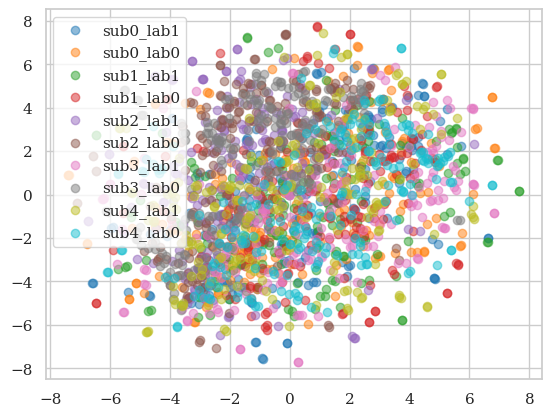

In [7]:
from matplotlib import colors

Y1 = [np.arange(0,300,1),np.arange(600,900,1),np.arange(1200,1500,1)]
Y0 = [np.arange(300,600,1),np.arange(900,1200,1),np.arange(1500,1800,1)]

# plt.scatter(X_embedded_rec[Y1[0],0], X_embedded_rec[Y1[0],1],c='r',alpha=0.5,label='sub1lab1')
# plt.scatter(X_embedded_rec[Y0[0],0], X_embedded_rec[Y0[0],1],c='y',alpha=0.5,label='sub1lab0')
# plt.scatter(X_embedded_rec[Y1[1],0], X_embedded_rec[Y1[1],1],c='b',alpha=0.5,label='sub2lab1')
# plt.scatter(X_embedded_rec[Y0[1],0], X_embedded_rec[Y0[1],1],c='g',alpha=0.5,label='sub2lab0')
# plt.scatter(X_embedded_rec[Y1[2],0], X_embedded_rec[Y1[2],1],c='m',alpha=0.5,label='sub3lab1')
# plt.scatter(X_embedded_rec[Y0[2],0], X_embedded_rec[Y0[2],1],c='c',alpha=0.5,label='sub3lab0')
for i,c in zip(range(12),list(colors.TABLEAU_COLORS)):
    plt.scatter(X_embedded_rec[i*200:(i+1)*200,0], X_embedded_rec[i*200:(i+1)*200,1],label="sub{}_lab{}".format(i//2,(i+1)%2),c=c,alpha=0.5)
plt.legend()
plt.show()

In [8]:
n_cal = 7
n_class = 4
spdbn_accuracy_code_loo = np.zeros(12)
spdbn_tps_train_code_loo = np.zeros(12)
spdbn_tps_test_code_loo = np.zeros(12)
spdbn_accuracy_loo = np.zeros(12)

for i in range(len(subjects)):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(len(subjects)) if j!=i]
    X = X_parent_rec.copy()
    Y = Y_parent_rec.copy()
    domains = domains_parent_rec.copy()

    X_train = np.concatenate(X[ind2take]).reshape(-1,X.shape[-2],X.shape[-1])
    Y_train = np.concatenate(Y[ind2take]).reshape(-1)

    X_test = X[i]
    Y_test = Y[i]
    labels_code_test = labels_codes[i]

    print("balancing the number of ones and zeros")
    X_train, Y_train, domains_train = balance(X_train,Y_train,np.concatenate(domains[ind2take]))

    print(X_train.shape)
    print(X_test.shape)

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    batchsize = 64 #128 # 64 for burst
    epoch = 20 #45 # 20 for burst
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = SPDNetBN_Module(bimap_dims=[32,28,14,7])

    print("Fitting")
    start = time.time()
    weight_decay = 1e-4
    
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)

    # Convert data into PyTorch tensors
    X_train_tensor = torch.tensor(x_train, dtype=torch.float64)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_val_tensor = torch.tensor(x_val, dtype=torch.float64)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float64)
    y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

    # Create DataLoader for train, validation, and test sets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    # Define loss function and optimizer
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch_riemannian_adam.RiemannianAdam(clf.parameters(), lr=0.001)

    # Train the model
    num_epochs = 20
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_dataloader:
            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = clf(inputs)
            loss = criterion(outputs.float(), labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_dataloader)}")

    print("Training finished!")
    spdbn_tps_train_code_loo[i] = time.time() - start

    # Validation
    clf.eval()
    val_correct = 0
    val_pred = []
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = clf(inputs)
            _, predicted = torch.max(outputs, 1)
            val_pred.append(np.array(predicted))
            val_correct += (predicted == labels).sum().item()

    val_accuracy = balanced_accuracy_score(y_val,np.concatenate(val_pred))
    print(f"Validation Accuracy: {val_accuracy}")

    # Testing
    start = time.time()
    test_correct = 0
    y_pred= []
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = clf(inputs)
            _, predicted = torch.max(outputs, 1)
            y_pred.append(np.array(predicted))
            test_correct += (predicted == labels).sum().item()
            
    test_accuracy = balanced_accuracy_score(Y_test,np.concatenate(y_pred))
    print(f"Test Accuracy: {test_accuracy}")
    
    print("getting accuracy of participant ", i)
    y_pred = np.concatenate(y_pred)
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    spdbn_accuracy_loo[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=freq, consecutive=50, window_size=window_size
    )
    spdbn_tps_test_code_loo[i] = time.time() - start
    spdbn_accuracy_code_loo[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(spdbn_accuracy_loo)
print(spdbn_tps_train_code_loo)
print(spdbn_tps_test_code_loo)
print(spdbn_accuracy_code_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/score/LOORecStr_score",spdbn_accuracy_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/score_code/LOORecStr_score_code",spdbn_accuracy_code_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/tps_code/LOORecStr_tps_train_code",spdbn_tps_train_code_loo)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/tps_code/LOORecStr_tps_test_code",spdbn_tps_test_code_loo)

TL to the participant :  0
balancing the number of ones and zeros
(26400, 32, 32)
(7020, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6225241802392467
Epoch 2, Loss: 0.529552380644506
Epoch 3, Loss: 0.4901052012398679
Epoch 4, Loss: 0.46925971657037735
Epoch 5, Loss: 0.4576678084590102
Epoch 6, Loss: 0.4513899982776693
Epoch 7, Loss: 0.4454302462518856
Epoch 8, Loss: 0.44191524434474205
Epoch 9, Loss: 0.43908169689357923
Epoch 10, Loss: 0.43691830953923605
Epoch 11, Loss: 0.43523339558673163
Epoch 12, Loss: 0.4346240527367079
Epoch 13, Loss: 0.43165354855278487
Epoch 14, Loss: 0.4309958833199675
Epoch 15, Loss: 0.42678721785865803
Epoch 16, Loss: 0.426800106922465
Epoch 17, Loss: 0.42553783324296757
Epoch 18, Loss: 0.4245232942924705
Epoch 19, Loss: 0.4241733343530727
Epoch 20, Loss: 0.42433307399993303
Training finished!
Validation Accuracy: 0.5891536711516785
Test Accuracy: 0.5781572164948454
getting accuracy of participant  0


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



TL to the participant :  1
balancing the number of ones and zeros
(26400, 32, 32)
(7020, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.621381611272853
Epoch 2, Loss: 0.5232530877955498
Epoch 3, Loss: 0.47966278833086773
Epoch 4, Loss: 0.45759206000835667
Epoch 5, Loss: 0.4450543203180836
Epoch 6, Loss: 0.4382311075284917
Epoch 7, Loss: 0.4325507638114755
Epoch 8, Loss: 0.430520054073103
Epoch 9, Loss: 0.42731031595218566
Epoch 10, Loss: 0.42568632800091977
Epoch 11, Loss: 0.42450723981344574
Epoch 12, Loss: 0.42422007585084565
Epoch 13, Loss: 0.4208115341682588
Epoch 14, Loss: 0.4190664596615299
Epoch 15, Loss: 0.4177284031625717
Epoch 16, Loss: 0.4153105179148336
Epoch 17, Loss: 0.41438185343498823
Epoch 18, Loss: 0.4134252635381555
Epoch 19, Loss: 0.4106514941780798
Epoch 20, Loss: 0.4097038468205801
Training finished!
Validation Accuracy: 0.7001164128315871
Test Accuracy: 0.6787156357388316
getting accuracy of participant  1


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  2
balancing the number of ones and zeros
(26400, 32, 32)
(7020, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6290346678867135
Epoch 2, Loss: 0.5292654687999397
Epoch 3, Loss: 0.48863907110306526
Epoch 4, Loss: 0.4684774205889753
Epoch 5, Loss: 0.4572179562622501
Epoch 6, Loss: 0.4521932883128043
Epoch 7, Loss: 0.44797726015570344
Epoch 8, Loss: 0.44639805399922916
Epoch 9, Loss: 0.4438960225351395
Epoch 10, Loss: 0.44216408868951185
Epoch 11, Loss: 0.4407616479582684
Epoch 12, Loss: 0.44107678436463876
Epoch 13, Loss: 0.4395489167141658
Epoch 14, Loss: 0.43933415268698045
Epoch 15, Loss: 0.4399554676586582
Epoch 16, Loss: 0.43782656615780247
Epoch 17, Loss: 0.43583669689714266
Epoch 18, Loss: 0.43442047010826806
Epoch 19, Loss: 0.4334373752917013
Epoch 20, Loss: 0.43382881605817425
Training finished!
Validation Accuracy: 0.65465428065721
Test Accuracy: 0.672405498281787
getting accuracy of participant  2
TL to the participant :  3
balancing

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  5
balancing the number of ones and zeros
(26400, 32, 32)
(7020, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.62653091117259
Epoch 2, Loss: 0.5303951616409004
Epoch 3, Loss: 0.4907395661838593
Epoch 4, Loss: 0.47207715778902015
Epoch 5, Loss: 0.46171988791195295
Epoch 6, Loss: 0.4556978329695681
Epoch 7, Loss: 0.45159073390306964
Epoch 8, Loss: 0.45054499460484393
Epoch 9, Loss: 0.44862647034147735
Epoch 10, Loss: 0.4458565969140299
Epoch 11, Loss: 0.4437735549384548
Epoch 12, Loss: 0.4415194022078668
Epoch 13, Loss: 0.4406646122374842
Epoch 14, Loss: 0.4384996979146875
Epoch 15, Loss: 0.4380517828688827
Epoch 16, Loss: 0.4367734680893601
Epoch 17, Loss: 0.43747099713292176
Epoch 18, Loss: 0.4351173084910198
Epoch 19, Loss: 0.43434849798038444
Epoch 20, Loss: 0.4337969086663697
Training finished!
Validation Accuracy: 0.5481448279068113
Test Accuracy: 0.5329166666666667
getting accuracy of participant  5


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  6
balancing the number of ones and zeros
(26400, 32, 32)
(7020, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6231076414546659
Epoch 2, Loss: 0.5280310517197014
Epoch 3, Loss: 0.4863853291157753
Epoch 4, Loss: 0.4642653534969976
Epoch 5, Loss: 0.45140967293772644
Epoch 6, Loss: 0.4435909587529398
Epoch 7, Loss: 0.4399328202970566
Epoch 8, Loss: 0.4369760180513064
Epoch 9, Loss: 0.43408474818833415
Epoch 10, Loss: 0.4321742509641955
Epoch 11, Loss: 0.42983770855171705
Epoch 12, Loss: 0.43023119594461173
Epoch 13, Loss: 0.4296692552105073
Epoch 14, Loss: 0.428229477777276
Epoch 15, Loss: 0.42693738883701704
Epoch 16, Loss: 0.42619154001435927
Epoch 17, Loss: 0.4252098344506756
Epoch 18, Loss: 0.4259158697339796
Epoch 19, Loss: 0.42399467872355573
Epoch 20, Loss: 0.42341572398780497
Training finished!
Validation Accuracy: 0.5155746980916602
Test Accuracy: 0.5330154639175257
getting accuracy of participant  6


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  7
balancing the number of ones and zeros
(26400, 32, 32)
(7020, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6191732341884285
Epoch 2, Loss: 0.5286621892003602
Epoch 3, Loss: 0.490281811324499
Epoch 4, Loss: 0.46976553432403073
Epoch 5, Loss: 0.45928439970618934
Epoch 6, Loss: 0.45185805304396537
Epoch 7, Loss: 0.44849136680044155
Epoch 8, Loss: 0.44589642587528433
Epoch 9, Loss: 0.443804417406359
Epoch 10, Loss: 0.4429209927717845
Epoch 11, Loss: 0.44078658817596333
Epoch 12, Loss: 0.44043367460209837
Epoch 13, Loss: 0.43908392918366257
Epoch 14, Loss: 0.43771432203951705
Epoch 15, Loss: 0.437636145020044
Epoch 16, Loss: 0.4358232592542966
Epoch 17, Loss: 0.43502414907499026
Epoch 18, Loss: 0.4344688246967972
Epoch 19, Loss: 0.4326703974636652
Epoch 20, Loss: 0.433810351116042
Training finished!
Validation Accuracy: 0.7953848908724009
Test Accuracy: 0.7983462199312714
getting accuracy of participant  7
TL to the participant :  8
balancing 

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  9
balancing the number of ones and zeros
(26400, 32, 32)
(7020, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6432417410035287
Epoch 2, Loss: 0.542253919746927
Epoch 3, Loss: 0.4999068420260183
Epoch 4, Loss: 0.4784259693596953
Epoch 5, Loss: 0.46771300800385013
Epoch 6, Loss: 0.4613420944060049
Epoch 7, Loss: 0.4564955264169683
Epoch 8, Loss: 0.45480925101105885
Epoch 9, Loss: 0.45360788070066
Epoch 10, Loss: 0.44967495650053024
Epoch 11, Loss: 0.4492908454229755
Epoch 12, Loss: 0.4485160804563953
Epoch 13, Loss: 0.4473253785762736
Epoch 14, Loss: 0.4464756537188766
Epoch 15, Loss: 0.4455421316207096
Epoch 16, Loss: 0.44333630231439425
Epoch 17, Loss: 0.44102500867779537
Epoch 18, Loss: 0.4408185103087015
Epoch 19, Loss: 0.4403744412045325
Epoch 20, Loss: 0.4404603069828403
Training finished!
Validation Accuracy: 0.7017184898092027
Test Accuracy: 0.7567139175257731
getting accuracy of participant  9
TL to the participant :  10
balancing the

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  11
balancing the number of ones and zeros
(26400, 32, 32)
(7020, 32, 32)
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6199910192079442
Epoch 2, Loss: 0.516913582080154
Epoch 3, Loss: 0.4755606482266098
Epoch 4, Loss: 0.4524017982585456
Epoch 5, Loss: 0.44050060468976215
Epoch 6, Loss: 0.43285266742590933
Epoch 7, Loss: 0.4282356435733457
Epoch 8, Loss: 0.4242212030515876
Epoch 9, Loss: 0.42229908456405
Epoch 10, Loss: 0.4201009098079897
Epoch 11, Loss: 0.41900476388713365
Epoch 12, Loss: 0.4181569011942033
Epoch 13, Loss: 0.41650409403667654
Epoch 14, Loss: 0.4137326906365092
Epoch 15, Loss: 0.4133249582542527
Epoch 16, Loss: 0.4127323305014
Epoch 17, Loss: 0.4134601524039622
Epoch 18, Loss: 0.40953762336604055
Epoch 19, Loss: 0.41100562596192924
Epoch 20, Loss: 0.40972075707489447
Training finished!
Validation Accuracy: 0.5517641549067818
Test Accuracy: 0.5481357388316151
getting accuracy of participant  11


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


[0.57815722 0.67871564 0.6724055  0.7204854  0.65460911 0.53291667
 0.53301546 0.79834622 0.50041667 0.75671392 0.64637887 0.54813574]
[1076.6412065  1102.00782394 1098.63898396 1075.14689684 1062.55792093
 1070.22732615 1077.34478807 1115.76257467 1071.24429369 1070.92151833
 1071.38273525 1071.3893981 ]
[7.79234147 7.90383101 8.05203485 7.8980763  7.2974484  7.63602161
 8.66506362 8.81176591 7.74235153 7.89806008 8.26317644 8.32740545]
[0.73 0.75 0.75 0.87 0.88 0.45 0.43 0.93 0.25 0.97 0.63 0.38]


### LOOA SPDBN net

In [12]:
n_cal = 4
n_class = 4
nb_samples_cal = int(n_class*n_cal*(2.2-window_size)*fps)
spdbn_accuracy_code_looa = np.zeros(12)
spdbn_tps_train_code_looa = np.zeros(12)
spdbn_tps_test_code_looa = np.zeros(12)
spdbn_accuracy_looa = np.zeros(12)

for i in range(12):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(12) if j!=i]
    X = X_parent.copy()
    Y = Y_parent.copy()
    domains = domains_parent.copy()

    X_train = np.concatenate([np.concatenate(X[ind2take]).reshape(-1,X.shape[-2],X.shape[-1]),X[i][:nb_samples_cal]]).reshape(-1,X.shape[-2],X.shape[-1])
    Y_train = np.concatenate([np.concatenate(Y[ind2take]).reshape(-1),Y[i][:nb_samples_cal]]).reshape(-1)
    domains_train = np.concatenate([np.concatenate(domains[ind2take]).reshape(-1),domains[i][:nb_samples_cal]]).reshape(-1)
    X_test = X[i][nb_samples_cal:]
    Y_test = Y[i][nb_samples_cal:]
    domains_test = domains[i][nb_samples_cal:]

    labels_code_test = labels_codes[i][n_cal*n_class:]

    print(X_train.shape)
    print(X_test.shape)
    # X_std = X_train.std(axis=0)
    # X_train /= X_std + 1e-8
    # X_std = X_test.std(axis=0)
    # X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    X_train, Y_train, domains_train = balance(X_train,Y_train,domains_train)

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    batchsize = 64 #128 # 64 for burst
    epoch = 20 #45 # 20 for burst
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = SPDNetBN_Module(bimap_dims=[32,28,14,7])

    print("Fitting")
    start = time.time()
    weight_decay = 1e-4
    
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)

    # Convert data into PyTorch tensors
    X_train_tensor = torch.tensor(x_train, dtype=torch.float64)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_val_tensor = torch.tensor(x_val, dtype=torch.float64)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float64)
    y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

    # Create DataLoader for train, validation, and test sets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    # Define loss function and optimizer
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch_riemannian_adam.RiemannianAdam(clf.parameters(), lr=0.001)

    # Train the model
    num_epochs = 20
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_dataloader:
            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = clf(inputs)
            loss = criterion(outputs.float(), labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_dataloader)}")

    print("Training finished!")
    spdbn_tps_train_code_looa[i] = time.time() - start

    # Validation
    clf.eval()
    val_correct = 0
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = clf(inputs)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()

    val_accuracy = val_correct / len(x_val)
    print(f"Validation Accuracy: {val_accuracy}")

    # Testing
    start = time.time()
    test_correct = 0
    y_pred= []
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = clf(inputs)
            _, predicted = torch.max(outputs, 1)
            y_pred.append(predicted)
            test_correct += (predicted == labels).sum().item()
            
    test_accuracy = test_correct / len(X_test)
    print(f"Test Accuracy: {test_accuracy}")
    
    print("getting accuracy of participant ", i)
    y_pred = np.concatenate(y_pred)
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    spdbn_accuracy_looa[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=fps, consecutive=50, window_size=window_size
    )
    spdbn_tps_test_code_looa[i] = time.time() - start
    spdbn_accuracy_code_looa[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(spdbn_accuracy_looa)
print(spdbn_tps_train_code_looa)
print(spdbn_tps_test_code_looa)
print(spdbn_accuracy_code_looa)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/score/LOOA_score",spdbn_accuracy_looa)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/score_code/LOOA_score_code",spdbn_accuracy_code_looa)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/tps_code/LOOA_tps_train_code",spdbn_tps_train_code_looa)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/tps_code/LOOA_tps_test_code",spdbn_tps_test_code_looa)

TL to the participant :  0
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.5357050396638905
Epoch 2, Loss: 0.45477827718564534
Epoch 3, Loss: 0.4433552782366595
Epoch 4, Loss: 0.43723433791339555
Epoch 5, Loss: 0.44081345333514876
Epoch 6, Loss: 0.43703372139004587
Epoch 7, Loss: 0.432578785995173
Epoch 8, Loss: 0.4330933194147946
Epoch 9, Loss: 0.4276077938204988
Epoch 10, Loss: 0.4324153352753697
Epoch 11, Loss: 0.42883466438358536
Epoch 12, Loss: 0.4215210925719244
Epoch 13, Loss: 0.4213973238008229
Epoch 14, Loss: 0.4260575467833071
Epoch 15, Loss: 0.4259924102486588
Epoch 16, Loss: 0.4224511661085244
Epoch 17, Loss: 0.4279387180260786
Epoch 18, Loss: 0.4226319874365499
Epoch 19, Loss: 0.4257402245610405
Epoch 20, Loss: 0.4191026133032921
Training finished!
Validation Accuracy: 0.8002958579881657
Test Accuracy: 0.7533022533022533
getting accuracy of participant  0
TL to the participant :  1
(79092, 32, 

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  2
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6055009342397605
Epoch 2, Loss: 0.5282870057843175
Epoch 3, Loss: 0.5051150787377295
Epoch 4, Loss: 0.4940072975446546
Epoch 5, Loss: 0.4910286588305876
Epoch 6, Loss: 0.48917685898895963
Epoch 7, Loss: 0.48205712195143613
Epoch 8, Loss: 0.48207450710882355
Epoch 9, Loss: 0.4810407349443811
Epoch 10, Loss: 0.477272746600504
Epoch 11, Loss: 0.47386944231398775
Epoch 12, Loss: 0.4748015630589383
Epoch 13, Loss: 0.4712477489875683
Epoch 14, Loss: 0.4770314350059339
Epoch 15, Loss: 0.47114506504667086
Epoch 16, Loss: 0.47040042570569696
Epoch 17, Loss: 0.47100607624517027
Epoch 18, Loss: 0.4715434057818936
Epoch 19, Loss: 0.46647786851630124
Epoch 20, Loss: 0.46456985390718214
Training finished!
Validation Accuracy: 0.7451923076923077
Test Accuracy: 0.8581973581973582
getting accuracy of participant  2


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  3
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.565274404102736
Epoch 2, Loss: 0.46249209536029284
Epoch 3, Loss: 0.4428175251314959
Epoch 4, Loss: 0.43884084246602895
Epoch 5, Loss: 0.434851061640762
Epoch 6, Loss: 0.434583230437882
Epoch 7, Loss: 0.42525936886081545
Epoch 8, Loss: 0.4284038736516722
Epoch 9, Loss: 0.4267679376630332
Epoch 10, Loss: 0.42349308259843843
Epoch 11, Loss: 0.4222089585278604
Epoch 12, Loss: 0.4241470459095762
Epoch 13, Loss: 0.4237111180316745
Epoch 14, Loss: 0.41900581262243075
Epoch 15, Loss: 0.42386798236000883
Epoch 16, Loss: 0.4188406161201282
Epoch 17, Loss: 0.41728119939330993
Epoch 18, Loss: 0.41731951442446924
Epoch 19, Loss: 0.418428903254937
Epoch 20, Loss: 0.413259967809587
Training finished!
Validation Accuracy: 0.8165680473372781
Test Accuracy: 0.8512043512043512
getting accuracy of participant  3


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  4
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.5430041280944203
Epoch 2, Loss: 0.4605403738071912
Epoch 3, Loss: 0.4504044800605674
Epoch 4, Loss: 0.4440117063797678
Epoch 5, Loss: 0.4401856926795379
Epoch 6, Loss: 0.4384075482217033
Epoch 7, Loss: 0.4341130643066146
Epoch 8, Loss: 0.4350142382730649
Epoch 9, Loss: 0.4307899342903628
Epoch 10, Loss: 0.4316250633379919
Epoch 11, Loss: 0.42981622702493444
Epoch 12, Loss: 0.43367332220077515
Epoch 13, Loss: 0.42522959047415126
Epoch 14, Loss: 0.428146495867589
Epoch 15, Loss: 0.42746786628495365
Epoch 16, Loss: 0.4257108486621711
Epoch 17, Loss: 0.4297129187214719
Epoch 18, Loss: 0.4252106379179817
Epoch 19, Loss: 0.42441452202678037
Epoch 20, Loss: 0.42353855132117985
Training finished!
Validation Accuracy: 0.8080621301775148
Test Accuracy: 0.7148407148407149
getting accuracy of participant  4
TL to the participant :  5
(79092, 32,

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  6
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6498590997980023
Epoch 2, Loss: 0.5172454089004537
Epoch 3, Loss: 0.4866339849049025
Epoch 4, Loss: 0.4806762164033304
Epoch 5, Loss: 0.4751837520305253
Epoch 6, Loss: 0.47238484744637654
Epoch 7, Loss: 0.46789323125924337
Epoch 8, Loss: 0.4620538899904787
Epoch 9, Loss: 0.46099155656308954
Epoch 10, Loss: 0.46036548533151783
Epoch 11, Loss: 0.4554227318350724
Epoch 12, Loss: 0.4546820369605317
Epoch 13, Loss: 0.4543110031311906
Epoch 14, Loss: 0.45294295701142057
Epoch 15, Loss: 0.4511929195853356
Epoch 16, Loss: 0.44804484285707546
Epoch 17, Loss: 0.45014203212705495
Epoch 18, Loss: 0.4474771819871867
Epoch 19, Loss: 0.44459501464222984
Epoch 20, Loss: 0.4448304137219907
Training finished!
Validation Accuracy: 0.7126479289940828
Test Accuracy: 0.8702408702408703
getting accuracy of participant  6


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  7
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.567128237307541
Epoch 2, Loss: 0.44902422249786494
Epoch 3, Loss: 0.43846979416574394
Epoch 4, Loss: 0.4343228977652672
Epoch 5, Loss: 0.42699382980195244
Epoch 6, Loss: 0.4268111503265035
Epoch 7, Loss: 0.42449959768397916
Epoch 8, Loss: 0.42527416082504854
Epoch 9, Loss: 0.4209230934853942
Epoch 10, Loss: 0.42005193096602683
Epoch 11, Loss: 0.41713250144885905
Epoch 12, Loss: 0.4184706796967764
Epoch 13, Loss: 0.416462115180774
Epoch 14, Loss: 0.4172309536946414
Epoch 15, Loss: 0.416485623346539
Epoch 16, Loss: 0.41668925229020004
Epoch 17, Loss: 0.4123420302323469
Epoch 18, Loss: 0.41656093013881074
Epoch 19, Loss: 0.41095249851544696
Epoch 20, Loss: 0.4173983128208501
Training finished!
Validation Accuracy: 0.8106508875739645
Test Accuracy: 0.8098290598290598
getting accuracy of participant  7
TL to the participant :  8
(79092, 3

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  9
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.5642953493150826
Epoch 2, Loss: 0.4648177847461751
Epoch 3, Loss: 0.4492677435318003
Epoch 4, Loss: 0.44243293187123894
Epoch 5, Loss: 0.4433853340743408
Epoch 6, Loss: 0.44389021185439403
Epoch 7, Loss: 0.43750908892611506
Epoch 8, Loss: 0.4383298601378293
Epoch 9, Loss: 0.4396654260283693
Epoch 10, Loss: 0.43778329446246933
Epoch 11, Loss: 0.4343616925277735
Epoch 12, Loss: 0.4380108290926365
Epoch 13, Loss: 0.43552064856519224
Epoch 14, Loss: 0.4335864747915994
Epoch 15, Loss: 0.4350566400943466
Epoch 16, Loss: 0.4327684149654519
Epoch 17, Loss: 0.4351995768822397
Epoch 18, Loss: 0.43227025741354375
Epoch 19, Loss: 0.43460701640666
Epoch 20, Loss: 0.4294192121019514
Training finished!
Validation Accuracy: 0.7714497041420119
Test Accuracy: 0.9248251748251748
getting accuracy of participant  9
TL to the participant :  10
(79092, 32,

### Train Test SPDBN net

In [10]:
n_cal = 7
n_class = 4
nb_fold = 5
spdbn_accuracy_code_perso = np.zeros((nb_fold,12))
spdbn_tps_train_code_perso = np.zeros((nb_fold,12))
spdbn_tps_test_code_perso = np.zeros((nb_fold,12))
spdbn_accuracy_perso = np.zeros((nb_fold,12))

for k in range(nb_fold):
    for i in range(12):
        print("TL to the participant : ", i)
        X = X_parent.copy()
        Y = Y_parent.copy()
        domains = domains_parent.copy()
        nb_sample_cal = int(n_class*n_cal*(2.2-window_size)*freq)

        X_train = X[i][:nb_sample_cal]
        Y_train = Y[i][:nb_sample_cal]
        X_test = X[i][nb_sample_cal:]
        Y_test = Y[i][nb_sample_cal:]
        labels_code_test = labels_codes[i][(n_class*n_cal):]

        print(X_train.shape)
        print(X_test.shape)
        # X_std = X_train.std(axis=0)
        # X_train /= X_std + 1e-8
        # X_std = X_test.std(axis=0)
        # X_test /= X_std + 1e-8

        print("balancing the number of ones and zeros")
        X_train, Y_train, domains_train = balance(X_train,Y_train,domains[i][:nb_sample_cal])

        print("Creating the different pipelines")
        lr = 1e-3
        # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
        batchsize = 64 #128 # 64 for burst
        epoch = 20 #45 # 20 for burst
        # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
        clf = SPDNetBN_Module(bimap_dims=[32,28,14,7])

        print("Fitting")
        start = time.time()
        weight_decay = 1e-4
        
        x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)

        # Convert data into PyTorch tensors
        X_train_tensor = torch.tensor(x_train, dtype=torch.float64)
        y_train_tensor = torch.tensor(y_train, dtype=torch.long)
        X_val_tensor = torch.tensor(x_val, dtype=torch.float64)
        y_val_tensor = torch.tensor(y_val, dtype=torch.long)
        X_test_tensor = torch.tensor(X_test, dtype=torch.float64)
        y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

        # Create DataLoader for train, validation, and test sets
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
        val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
        val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
        test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
        test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

        # Define loss function and optimizer
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch_riemannian_adam.RiemannianAdam(clf.parameters(), lr=0.001)

        # Train the model
        num_epochs = 20
        for epoch in range(num_epochs):
            running_loss = 0.0
            for inputs, labels in train_dataloader:
                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                # print(inputs.shape)
                # print(labels.shape)
                outputs = clf(inputs)
                loss = criterion(outputs.float(), labels)

                # Backward pass and optimize
                loss.backward()
                optimizer.step()

                running_loss += loss.item()

            print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_dataloader)}")

        print("Training finished!")
        spdbn_tps_train_code_perso[k][i] = time.time() - start

        # Validation
        clf.eval()
        val_correct = 0
        with torch.no_grad():
            for inputs, labels in val_dataloader:
                outputs = clf(inputs)
                _, predicted = torch.max(outputs, 1)
                val_correct += (predicted == labels).sum().item()

        val_accuracy = val_correct / len(x_val)
        print(f"Validation Accuracy: {val_accuracy}")

        # Testing
        start = time.time()
        test_correct = 0
        y_pred= []
        with torch.no_grad():
            for inputs, labels in test_dataloader:
                outputs = clf(inputs)
                _, predicted = torch.max(outputs, 1)
                y_pred.append(predicted)
                test_correct += (predicted == labels).sum().item()
                
        test_accuracy = test_correct / len(X_test)
        print(f"Test Accuracy: {test_accuracy}")
        
        print("getting accuracy of participant ", i)
        y_pred = np.concatenate(y_pred)
        y_pred = np.array(y_pred)
        y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
        y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

        tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
        spdbn_accuracy_perso[k][i] = balanced_accuracy_score(y_test_norm,y_pred_norm)

        labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
            y_pred_norm, codes, min_len=30, sfreq=freq, consecutive=50, window_size=window_size
        )
        spdbn_tps_test_code_perso[k][i] = time.time() - start
        spdbn_accuracy_code_perso[k][i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
        keras.backend.clear_session()

spdbn_accuracy_perso = np.mean(spdbn_accuracy_perso,axis=0)
spdbn_tps_train_code_perso = np.mean(spdbn_tps_train_code_perso,axis=0)
spdbn_tps_test_code_perso = np.mean(spdbn_tps_test_code_perso,axis=0)
spdbn_accuracy_code_perso = np.mean(spdbn_accuracy_code_perso,axis=0)

print(spdbn_accuracy_perso)
print(spdbn_tps_train_code_perso)
print(spdbn_tps_test_code_perso)
print(spdbn_accuracy_code_perso)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/score/WO1_score",spdbn_accuracy_perso)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/score_code/WO1_score_code",spdbn_accuracy_code_perso)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/temps_train_code/WO1_tps_train_code",spdbn_tps_train_code_perso)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/temps_test_code/WO1_tps_test_code",spdbn_tps_test_code_perso)

TL to the participant :  0
(3276, 32, 32)
(3744, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6740933805704117
Epoch 2, Loss: 0.6439212076365948
Epoch 3, Loss: 0.6032819598913193
Epoch 4, Loss: 0.5510848499834538
Epoch 5, Loss: 0.5022809822112322
Epoch 6, Loss: 0.4672142080962658
Epoch 7, Loss: 0.4419915359467268
Epoch 8, Loss: 0.42617383040487766
Epoch 9, Loss: 0.41453735902905464
Epoch 10, Loss: 0.40259488485753536
Epoch 11, Loss: 0.3980767820030451
Epoch 12, Loss: 0.3855197448283434
Epoch 13, Loss: 0.37810041941702366
Epoch 14, Loss: 0.3707047514617443
Epoch 15, Loss: 0.3615582790225744
Epoch 16, Loss: 0.3574061095714569
Epoch 17, Loss: 0.3529006354510784
Epoch 18, Loss: 0.3452984616160393
Epoch 19, Loss: 0.3503571357578039
Epoch 20, Loss: 0.3459740709513426
Training finished!
Validation Accuracy: 0.7678571428571429
Test Accuracy: 0.6284722222222222
getting accuracy of participant  0
TL to the participant :  1
(3276, 32, 32

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  11
(3276, 32, 32)
(3744, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.7173149399459362
Epoch 2, Loss: 0.6976576074957848
Epoch 3, Loss: 0.684973306953907
Epoch 4, Loss: 0.6686376743018627
Epoch 5, Loss: 0.6519769579172134
Epoch 6, Loss: 0.626049242913723
Epoch 7, Loss: 0.6002373471856117
Epoch 8, Loss: 0.5781638585031033
Epoch 9, Loss: 0.5629003122448921
Epoch 10, Loss: 0.5520084518939257
Epoch 11, Loss: 0.5445815455168486
Epoch 12, Loss: 0.5377438589930534
Epoch 13, Loss: 0.5271194688975811
Epoch 14, Loss: 0.5224771611392498
Epoch 15, Loss: 0.513324897736311
Epoch 16, Loss: 0.5103409513831139
Epoch 17, Loss: 0.5063256956636906
Epoch 18, Loss: 0.5014372058212757
Epoch 19, Loss: 0.4899433981627226
Epoch 20, Loss: 0.48303342424333096
Training finished!
Validation Accuracy: 0.6875
Test Accuracy: 0.7086004273504274
getting accuracy of participant  11
TL to the participant :  0
(3276, 32, 32)
(3744, 32, 32)

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  7
(3276, 32, 32)
(3744, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6982601098716259
Epoch 2, Loss: 0.6824794113636017
Epoch 3, Loss: 0.667885284870863
Epoch 4, Loss: 0.6436965018510818
Epoch 5, Loss: 0.606279119849205
Epoch 6, Loss: 0.5637833774089813
Epoch 7, Loss: 0.5171687826514244
Epoch 8, Loss: 0.4846601653844118
Epoch 9, Loss: 0.4575319327414036
Epoch 10, Loss: 0.4462438113987446
Epoch 11, Loss: 0.43261917121708393
Epoch 12, Loss: 0.42188954539597034
Epoch 13, Loss: 0.41431340761482716
Epoch 14, Loss: 0.4078121464699507
Epoch 15, Loss: 0.3979873973876238
Epoch 16, Loss: 0.3839787542819977
Epoch 17, Loss: 0.3788114096969366
Epoch 18, Loss: 0.3808080181479454
Epoch 19, Loss: 0.3664334025233984
Epoch 20, Loss: 0.36726788245141506
Training finished!
Validation Accuracy: 0.875
Test Accuracy: 0.8944978632478633
getting accuracy of participant  7
TL to the participant :  8
(3276, 32, 32)
(3744, 32, 32

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  11
(3276, 32, 32)
(3744, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.7274157553911209
Epoch 2, Loss: 0.697570912539959
Epoch 3, Loss: 0.6788592673838139
Epoch 4, Loss: 0.6638869941234589
Epoch 5, Loss: 0.6443443037569523
Epoch 6, Loss: 0.6262398324906826
Epoch 7, Loss: 0.607101708650589
Epoch 8, Loss: 0.5874714180827141
Epoch 9, Loss: 0.5811262093484402
Epoch 10, Loss: 0.5666430555284023
Epoch 11, Loss: 0.5583483316004276
Epoch 12, Loss: 0.5483864098787308
Epoch 13, Loss: 0.5454501062631607
Epoch 14, Loss: 0.5380052607506514
Epoch 15, Loss: 0.530574731528759
Epoch 16, Loss: 0.5257172379642725
Epoch 17, Loss: 0.5252213180065155
Epoch 18, Loss: 0.5196024794131517
Epoch 19, Loss: 0.5155882630497217
Epoch 20, Loss: 0.5210802666842937
Training finished!
Validation Accuracy: 0.6607142857142857
Test Accuracy: 0.8306623931623932
getting accuracy of participant  11


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  0
(3276, 32, 32)
(3744, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6883659176528454
Epoch 2, Loss: 0.6707293502986431
Epoch 3, Loss: 0.6484196148812771
Epoch 4, Loss: 0.6138008758425713
Epoch 5, Loss: 0.5805056393146515
Epoch 6, Loss: 0.544747844338417
Epoch 7, Loss: 0.5234636142849922
Epoch 8, Loss: 0.4941490776836872
Epoch 9, Loss: 0.47480057924985886
Epoch 10, Loss: 0.4535808190703392
Epoch 11, Loss: 0.4393790680915117
Epoch 12, Loss: 0.42275164276361465
Epoch 13, Loss: 0.4082992672920227
Epoch 14, Loss: 0.4077313058078289
Epoch 15, Loss: 0.4018380958586931
Epoch 16, Loss: 0.3875293266028166
Epoch 17, Loss: 0.3835568632930517
Epoch 18, Loss: 0.3757827114313841
Epoch 19, Loss: 0.3776283971965313
Epoch 20, Loss: 0.37373138405382633
Training finished!
Validation Accuracy: 0.875
Test Accuracy: 0.8111645299145299
getting accuracy of participant  0
TL to the participant :  1
(3276, 32, 32)
(3744, 32, 32

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  7
(3276, 32, 32)
(3744, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.700689472258091
Epoch 2, Loss: 0.6725140549242496
Epoch 3, Loss: 0.6273494437336922
Epoch 4, Loss: 0.5668255724012852
Epoch 5, Loss: 0.5046094805002213
Epoch 6, Loss: 0.4577857106924057
Epoch 7, Loss: 0.4250461347401142
Epoch 8, Loss: 0.4017412681132555
Epoch 9, Loss: 0.38724874146282673
Epoch 10, Loss: 0.378529692068696
Epoch 11, Loss: 0.36699342355132103
Epoch 12, Loss: 0.3619737774133682
Epoch 13, Loss: 0.3539547994732857
Epoch 14, Loss: 0.34218514524400234
Epoch 15, Loss: 0.3346121162176132
Epoch 16, Loss: 0.3360068127512932
Epoch 17, Loss: 0.325432064011693
Epoch 18, Loss: 0.3306875014677644
Epoch 19, Loss: 0.3252940997481346
Epoch 20, Loss: 0.3126195976510644
Training finished!
Validation Accuracy: 0.8035714285714286
Test Accuracy: 0.7625534188034188
getting accuracy of participant  7
TL to the participant :  8
(3276, 32, 32)
(3

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  3
(3276, 32, 32)
(3744, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6848261840641499
Epoch 2, Loss: 0.6593155078589916
Epoch 3, Loss: 0.6288651078939438
Epoch 4, Loss: 0.607377965003252
Epoch 5, Loss: 0.5834168419241905
Epoch 6, Loss: 0.5527584031224251
Epoch 7, Loss: 0.5207263622432947
Epoch 8, Loss: 0.49635383673012257
Epoch 9, Loss: 0.4865933507680893
Epoch 10, Loss: 0.4794598240405321
Epoch 11, Loss: 0.4722673073410988
Epoch 12, Loss: 0.4621169473975897
Epoch 13, Loss: 0.46173316799104214
Epoch 14, Loss: 0.45047065801918507
Epoch 15, Loss: 0.44323655590415
Epoch 16, Loss: 0.4419841691851616
Epoch 17, Loss: 0.4327855482697487
Epoch 18, Loss: 0.4307726100087166
Epoch 19, Loss: 0.4292958527803421
Epoch 20, Loss: 0.4222332015633583
Training finished!
Validation Accuracy: 0.8125
Test Accuracy: 0.8533653846153846
getting accuracy of participant  3
TL to the participant :  4
(3276, 32, 32)
(3744, 32, 32)

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  7
(3276, 32, 32)
(3744, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.694632388651371
Epoch 2, Loss: 0.6793176531791687
Epoch 3, Loss: 0.6574830487370491
Epoch 4, Loss: 0.6328931525349617
Epoch 5, Loss: 0.5960994586348534
Epoch 6, Loss: 0.5539155546575785
Epoch 7, Loss: 0.5037111826241016
Epoch 8, Loss: 0.4727093856781721
Epoch 9, Loss: 0.44962310791015625
Epoch 10, Loss: 0.42968447133898735
Epoch 11, Loss: 0.41585942544043064
Epoch 12, Loss: 0.4018355179578066
Epoch 13, Loss: 0.39379626885056496
Epoch 14, Loss: 0.3888222426176071
Epoch 15, Loss: 0.38186181895434856
Epoch 16, Loss: 0.37694717943668365
Epoch 17, Loss: 0.3664712868630886
Epoch 18, Loss: 0.35941771417856216
Epoch 19, Loss: 0.35743776336312294
Epoch 20, Loss: 0.35284137167036533
Training finished!
Validation Accuracy: 0.8392857142857143
Test Accuracy: 0.8803418803418803
getting accuracy of participant  7
TL to the participant :  8
(3276, 32

In [12]:
print(np.mean(spdbn_accuracy_code_perso))
np.mean(np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/score_code/WO_score_code.npy"))

0.5569999999999999


0.9158333333333334

In [25]:
Y[0].shape

(58500,)

In [16]:
inputs.shape

torch.Size([64, 32, 32])

### LOO test on different estimator

In [8]:
raw_data,labels,codes,labels_codes = get_BVEP_data(subjects,on_frame,to_keep=keep,moabb_ds=moabb_ds)
estimators = ["lwf","oas","sch"]
score_code_estim = []


for estimator in estimators:
    X_parent,Y_parent,domains_parent = prepare_data(subjects,raw_data,labels,on_frame,True,recenter,codes=codes, normalise=normalise,estimator=estimator)

    keras.backend.clear_session()
    spd_accuracy_code_loo = np.zeros(len(subjects))
    spd_tps_train_code_loo = np.zeros(len(subjects))
    spd_tps_test_code_loo = np.zeros(len(subjects))
    spd_accuracy_loo = np.zeros(len(subjects))
    batchsize = 64 #128 # 64 for burst
    epoch = 20 #45 # 20 for burst

    for i in range(len(subjects)):
        print("TL to the participant : ", i)
        ind2take = [j for j in range(len(subjects)) if j!=i]
        X = X_parent.copy()
        Y = Y_parent.copy()
        domains = domains_parent.copy()

        X_train = np.concatenate(X[ind2take]).reshape(-1,X.shape[-2],X.shape[-1])
        Y_train = np.concatenate(Y[ind2take]).reshape(-1)
        X_test = X[i]
        Y_test = Y[i]
        # X_test = xdawncov.transform(X_test)

        labels_code_test = labels_codes[i]

        print(X_train.shape)
        print(X_test.shape)
        # X_std = X_train.std(axis=0)
        # X_train /= X_std + 1e-8
        # X_std = X_test.std(axis=0)
        # X_test /= X_std + 1e-8

        print("balancing the number of ones and zeros")
        rus = RandomUnderSampler()
        counter=np.array(range(0,len(Y_train))).reshape(-1,1)
        index,_ = rus.fit_resample(counter,Y_train[:])
        X_train = np.squeeze(X_train[index,:,:], axis=1)
        Y_train = np.squeeze(Y_train[index])

        print("Creating the different pipelines")
        lr = 1e-3
        # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
        # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
        clf = SPDNet_Tensorflow(bimap_dims=[28,14,7])

        print("Fitting")
        start = time.time()
        weight_decay = 1e-4
        
        x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)
        history = clf.fit(np.array(x_train), y_train,
                        batch_size=batchsize, epochs=epoch,
                        validation_data=(np.array(x_val), y_val), shuffle=True)
        spd_tps_train_code_loo[i] = time.time() - start

        print("getting accuracy of participant ", i)
        start = time.time()
        y_pred = clf.predict(X_test)[:]
        y_pred = np.array(y_pred)
        y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
        y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

        tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
        spd_accuracy_loo[i] = (tp+tn)/len(y_test_norm)

        labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
            y_pred_norm, codes, min_len=30, sfreq=fps, consecutive=50, window_size=window_size
        )
        spd_tps_test_code_loo[i] = time.time() - start
        spd_accuracy_code_loo[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
        
        keras.backend.clear_session()
        del X_train
        del X_test
        del Y_train
        del Y_test

    print(spd_accuracy_loo)
    print(spd_accuracy_code_loo)
    print(spd_tps_train_code_loo)
    print(spd_tps_test_code_loo)
    score_code_estim.append(spd_accuracy_code_loo)
print(score_code_estim)
print(np.mean(score_code_estim,axis=0))



Choosing the first None classes from all possible events.


None
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad ep

C:\Users\s.velut\Documents\These\moabb\moabb\datasets\castillos2023.py:129: RuntimeWarning: Data file name in EEG.data (P13_burst100.fdt) is incorrect, the file name must have changed on disk, using the correct file name (P6_burst100.fdt).
  raw = mne.io.read_raw_eeglab(file_path_list[0], preload=True, verbose=False)


C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
TL to the participant :  0
(77220, 32, 32)
(7020, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting

Epoch 1/20

372/372 [==============================] - 7s 14ms/step - loss: 0.5033 - sparse_categorical_accuracy: 0.7683 - val_loss: 0.4570 - val_sparse_categorical_accuracy: 0.7864
Epoch 2/20
372/372 [==============================] - 5s 15ms/step - loss: 0.4525 - sparse_categorical_accuracy: 0.7931 - val_loss: 0.4568 - val_sparse_categorical_accuracy: 0.7799
Epoch 3/20
372/372 [==============================] - 6s 15ms/step - loss: 0.4435 - sparse_categorical_accuracy: 0.7974 - val_loss: 0.4295 - val_sparse_categorical_accuracy: 0.8045
Epoch 4/20
372/372 [

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  1
(77220, 32, 32)
(7020, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 6s 15ms/step - loss: 0.5377 - sparse_categorical_accuracy: 0.7464 - val_loss: 0.4672 - val_sparse_categorical_accuracy: 0.7735
Epoch 2/20
372/372 [==============================] - 6s 15ms/step - loss: 0.4459 - sparse_categorical_accuracy: 0.7986 - val_loss: 0.4567 - val_sparse_categorical_accuracy: 0.7837
Epoch 3/20
372/372 [==============================] - 5s 14ms/step - loss: 0.4352 - sparse_categorical_accuracy: 0.8024 - val_loss: 0.4344 - val_sparse_categorical_accuracy: 0.7936
Epoch 4/20
372/372 [==============================] - 5s 14ms/step - loss: 0.4313 - sparse_categorical_accuracy: 0.8050 - val_loss: 0.4286 - val_sparse_categorical_accuracy: 0.7996
Epoch 5/20
372/372 [==============================] - 5s 14ms/step - loss: 0.4277 - sparse_categorical_accuracy: 0.8048 - val_loss: 0.4237

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  2
(77220, 32, 32)
(7020, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 6s 14ms/step - loss: 0.5457 - sparse_categorical_accuracy: 0.7362 - val_loss: 0.5018 - val_sparse_categorical_accuracy: 0.7458
Epoch 2/20
372/372 [==============================] - 5s 14ms/step - loss: 0.4619 - sparse_categorical_accuracy: 0.7876 - val_loss: 0.4605 - val_sparse_categorical_accuracy: 0.7837
Epoch 3/20
372/372 [==============================] - 6s 15ms/step - loss: 0.4464 - sparse_categorical_accuracy: 0.7949 - val_loss: 0.4639 - val_sparse_categorical_accuracy: 0.7864
Epoch 4/20
372/372 [==============================] - 5s 15ms/step - loss: 0.4408 - sparse_categorical_accuracy: 0.7978 - val_loss: 0.4690 - val_sparse_categorical_accuracy: 0.7754
Epoch 5/20
372/372 [==============================] - 6s 15ms/step - loss: 0.4383 - sparse_categorical_accuracy: 0.7972 - val_loss: 0.4393

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  3
(77220, 32, 32)
(7020, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 6s 15ms/step - loss: 0.5174 - sparse_categorical_accuracy: 0.7566 - val_loss: 0.4670 - val_sparse_categorical_accuracy: 0.7795
Epoch 2/20
372/372 [==============================] - 6s 15ms/step - loss: 0.4518 - sparse_categorical_accuracy: 0.7935 - val_loss: 0.4693 - val_sparse_categorical_accuracy: 0.7811
Epoch 3/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4440 - sparse_categorical_accuracy: 0.7951 - val_loss: 0.4997 - val_sparse_categorical_accuracy: 0.7557
Epoch 4/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4410 - sparse_categorical_accuracy: 0.7976 - val_loss: 0.4657 - val_sparse_categorical_accuracy: 0.7837
Epoch 5/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4390 - sparse_categorical_accuracy: 0.8011 - val_loss: 0.4479

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  4
(77220, 32, 32)
(7020, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 6s 15ms/step - loss: 0.5332 - sparse_categorical_accuracy: 0.7450 - val_loss: 0.4677 - val_sparse_categorical_accuracy: 0.7792
Epoch 2/20
372/372 [==============================] - 5s 14ms/step - loss: 0.4576 - sparse_categorical_accuracy: 0.7881 - val_loss: 0.4530 - val_sparse_categorical_accuracy: 0.7841
Epoch 3/20
372/372 [==============================] - 5s 14ms/step - loss: 0.4487 - sparse_categorical_accuracy: 0.7909 - val_loss: 0.4417 - val_sparse_categorical_accuracy: 0.7871
Epoch 4/20
372/372 [==============================] - 5s 14ms/step - loss: 0.4450 - sparse_categorical_accuracy: 0.7908 - val_loss: 0.4386 - val_sparse_categorical_accuracy: 0.7947
Epoch 5/20
372/372 [==============================] - 5s 15ms/step - loss: 0.4428 - sparse_categorical_accuracy: 0.7933 - val_loss: 0.4411

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  9
(77220, 32, 32)
(7020, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 7s 16ms/step - loss: 0.5350 - sparse_categorical_accuracy: 0.7418 - val_loss: 0.4859 - val_sparse_categorical_accuracy: 0.7602
Epoch 2/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4620 - sparse_categorical_accuracy: 0.7849 - val_loss: 0.4720 - val_sparse_categorical_accuracy: 0.7667
Epoch 3/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4543 - sparse_categorical_accuracy: 0.7917 - val_loss: 0.4617 - val_sparse_categorical_accuracy: 0.7780
Epoch 4/20
372/372 [==============================] - 6s 15ms/step - loss: 0.4510 - sparse_categorical_accuracy: 0.7904 - val_loss: 0.4595 - val_sparse_categorical_accuracy: 0.7754
Epoch 5/20
372/372 [==============================] - 6s 17ms/step - loss: 0.4483 - sparse_categorical_accuracy: 0.7941 - val_loss: 0.4661

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


[0.8525641  0.802849   0.8482906  0.86410256 0.62478632 0.79287749
 0.72150997 0.85555556 0.83589744 0.84672365 0.81481481 0.81039886]
[0.93 0.83 0.98 0.95 0.97 1.   0.92 0.98 0.85 0.98 0.88 0.77]
[ 134.1680994   110.66777778  114.12455773  114.91205478  109.01135278
  111.66560197  110.39023018  111.09263444  126.11424232 4724.49911332
  110.33957839  117.22049046]
[2.26581001 2.55200768 1.75153637 2.5543828  2.58107114 2.42055011
 2.49375153 2.51587582 1.79404283 2.46344543 2.57943487 2.62725592]
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
TL to the participant :  0
(77220, 32, 32)
(7020, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 7s 16ms/step - loss: 0.5148 

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  2
(77220, 32, 32)
(7020, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 7s 16ms/step - loss: 0.5146 - sparse_categorical_accuracy: 0.7620 - val_loss: 0.4511 - val_sparse_categorical_accuracy: 0.7977
Epoch 2/20
372/372 [==============================] - 6s 15ms/step - loss: 0.4361 - sparse_categorical_accuracy: 0.8014 - val_loss: 0.4416 - val_sparse_categorical_accuracy: 0.7909
Epoch 3/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4230 - sparse_categorical_accuracy: 0.8051 - val_loss: 0.4300 - val_sparse_categorical_accuracy: 0.8023
Epoch 4/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4190 - sparse_categorical_accuracy: 0.8084 - val_loss: 0.4240 - val_sparse_categorical_accuracy: 0.8045
Epoch 5/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4170 - sparse_categorical_accuracy: 0.8087 - val_loss: 0.4459

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  3
(77220, 32, 32)
(7020, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 7s 16ms/step - loss: 0.5115 - sparse_categorical_accuracy: 0.7561 - val_loss: 0.4347 - val_sparse_categorical_accuracy: 0.8008
Epoch 2/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4276 - sparse_categorical_accuracy: 0.8069 - val_loss: 0.4385 - val_sparse_categorical_accuracy: 0.7902
Epoch 3/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4180 - sparse_categorical_accuracy: 0.8080 - val_loss: 0.4142 - val_sparse_categorical_accuracy: 0.8061
Epoch 4/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4144 - sparse_categorical_accuracy: 0.8111 - val_loss: 0.4242 - val_sparse_categorical_accuracy: 0.8076
Epoch 5/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4118 - sparse_categorical_accuracy: 0.8112 - val_loss: 0.4074

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  4
(77220, 32, 32)
(7020, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 7s 16ms/step - loss: 0.4913 - sparse_categorical_accuracy: 0.7776 - val_loss: 0.4319 - val_sparse_categorical_accuracy: 0.8087
Epoch 2/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4330 - sparse_categorical_accuracy: 0.8010 - val_loss: 0.4162 - val_sparse_categorical_accuracy: 0.8133
Epoch 3/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4247 - sparse_categorical_accuracy: 0.8054 - val_loss: 0.4564 - val_sparse_categorical_accuracy: 0.7826
Epoch 4/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4213 - sparse_categorical_accuracy: 0.8059 - val_loss: 0.4192 - val_sparse_categorical_accuracy: 0.8106
Epoch 5/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4195 - sparse_categorical_accuracy: 0.8090 - val_loss: 0.4191

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  7
(77220, 32, 32)
(7020, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 7s 16ms/step - loss: 0.5111 - sparse_categorical_accuracy: 0.7654 - val_loss: 0.4573 - val_sparse_categorical_accuracy: 0.7943
Epoch 2/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4341 - sparse_categorical_accuracy: 0.8004 - val_loss: 0.4572 - val_sparse_categorical_accuracy: 0.7833
Epoch 3/20
372/372 [==============================] - 6s 15ms/step - loss: 0.4250 - sparse_categorical_accuracy: 0.8045 - val_loss: 0.4347 - val_sparse_categorical_accuracy: 0.7981
Epoch 4/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4217 - sparse_categorical_accuracy: 0.8061 - val_loss: 0.4475 - val_sparse_categorical_accuracy: 0.7864
Epoch 5/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4195 - sparse_categorical_accuracy: 0.8069 - val_loss: 0.4359

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  9
(77220, 32, 32)
(7020, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 7s 17ms/step - loss: 0.5184 - sparse_categorical_accuracy: 0.7538 - val_loss: 0.4648 - val_sparse_categorical_accuracy: 0.7830
Epoch 2/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4512 - sparse_categorical_accuracy: 0.7928 - val_loss: 0.4397 - val_sparse_categorical_accuracy: 0.7913
Epoch 3/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4404 - sparse_categorical_accuracy: 0.7965 - val_loss: 0.4318 - val_sparse_categorical_accuracy: 0.8023
Epoch 4/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4361 - sparse_categorical_accuracy: 0.7993 - val_loss: 0.4325 - val_sparse_categorical_accuracy: 0.7985
Epoch 5/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4342 - sparse_categorical_accuracy: 0.7980 - val_loss: 0.4447

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  11
(77220, 32, 32)
(7020, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 7s 16ms/step - loss: 0.4933 - sparse_categorical_accuracy: 0.7701 - val_loss: 0.4530 - val_sparse_categorical_accuracy: 0.7803
Epoch 2/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4206 - sparse_categorical_accuracy: 0.8094 - val_loss: 0.4326 - val_sparse_categorical_accuracy: 0.7936
Epoch 3/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4127 - sparse_categorical_accuracy: 0.8116 - val_loss: 0.4155 - val_sparse_categorical_accuracy: 0.8091
Epoch 4/20
372/372 [==============================] - 6s 15ms/step - loss: 0.4097 - sparse_categorical_accuracy: 0.8136 - val_loss: 0.4133 - val_sparse_categorical_accuracy: 0.8072
Epoch 5/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4079 - sparse_categorical_accuracy: 0.8144 - val_loss: 0.418

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


[0.8454416  0.78105413 0.82378917 0.81367521 0.89472934 0.86609687
 0.81623932 0.7991453  0.83660969 0.82578348 0.79131054 0.77293447]
[0.95 0.88 0.97 0.97 1.   1.   0.9  0.97 0.85 0.98 0.57 0.78]
[118.7223084  119.17349291 118.57616806 119.65114498 120.19709778
 119.87414622 117.80044246 117.74926281 118.22129178 118.15077806
 117.01384139 118.25339985]
[2.51092958 2.62453055 2.55175662 2.64053345 2.45577049 2.45312428
 2.52069664 2.50191903 2.54976153 2.48028469 2.66521716 2.68088245]
Recentering the matrix


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyriemann\utils\mean.py:540: UserWarning: Convergence not reached
  warnings.warn("Convergence not reached")


Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
TL to the participant :  0
(77220, 32, 32)
(7020, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 7s 16ms/step - loss: 0.5458 - sparse_categorical_accuracy: 0.7380 - val_loss: 0.4768 - val_sparse_categorical_accuracy: 0.7913
Epoch 2/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4513 - sparse_categorical_accuracy: 0.7962 - val_loss: 0.4605 - val_sparse_categorical_accuracy: 0.7758
Epoch 3/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4335 - sparse_categorical_accuracy: 0.8034 - val_loss: 0.4379 - val_sparse_categorical_accuracy: 0.7955
Epoch 4/20
372/372 [==============================] - 6s 16ms/step

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  7
(77220, 32, 32)
(7020, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 7s 16ms/step - loss: 0.5569 - sparse_categorical_accuracy: 0.7333 - val_loss: 0.4896 - val_sparse_categorical_accuracy: 0.7890
Epoch 2/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4578 - sparse_categorical_accuracy: 0.7984 - val_loss: 0.4684 - val_sparse_categorical_accuracy: 0.7860
Epoch 3/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4367 - sparse_categorical_accuracy: 0.8020 - val_loss: 0.4495 - val_sparse_categorical_accuracy: 0.8000
Epoch 4/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4291 - sparse_categorical_accuracy: 0.8068 - val_loss: 0.4396 - val_sparse_categorical_accuracy: 0.8008
Epoch 5/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4246 - sparse_categorical_accuracy: 0.8111 - val_loss: 0.4375

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  8
(77220, 32, 32)
(7020, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 7s 16ms/step - loss: 0.5591 - sparse_categorical_accuracy: 0.7287 - val_loss: 0.4983 - val_sparse_categorical_accuracy: 0.7701
Epoch 2/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4548 - sparse_categorical_accuracy: 0.7966 - val_loss: 0.4649 - val_sparse_categorical_accuracy: 0.7898
Epoch 3/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4350 - sparse_categorical_accuracy: 0.8031 - val_loss: 0.4397 - val_sparse_categorical_accuracy: 0.7920
Epoch 4/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4253 - sparse_categorical_accuracy: 0.8059 - val_loss: 0.4813 - val_sparse_categorical_accuracy: 0.7697
Epoch 5/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4170 - sparse_categorical_accuracy: 0.8115 - val_loss: 0.4359

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  9
(77220, 32, 32)
(7020, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
372/372 [==============================] - 7s 16ms/step - loss: 0.5654 - sparse_categorical_accuracy: 0.7250 - val_loss: 0.5202 - val_sparse_categorical_accuracy: 0.7367
Epoch 2/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4647 - sparse_categorical_accuracy: 0.7921 - val_loss: 0.4784 - val_sparse_categorical_accuracy: 0.7716
Epoch 3/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4432 - sparse_categorical_accuracy: 0.7979 - val_loss: 0.4543 - val_sparse_categorical_accuracy: 0.7902
Epoch 4/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4344 - sparse_categorical_accuracy: 0.8035 - val_loss: 0.4532 - val_sparse_categorical_accuracy: 0.7932
Epoch 5/20
372/372 [==============================] - 6s 16ms/step - loss: 0.4297 - sparse_categorical_accuracy: 0.8048 - val_loss: 0.4452

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


[0.72920228 0.6994302  0.82635328 0.79415954 0.79358974 0.84031339
 0.81509972 0.82891738 0.84202279 0.82962963 0.59330484 0.79358974]
[0.97 0.82 0.97 0.93 0.98 0.95 0.93 0.98 0.85 1.   0.82 0.82]
[120.2883575  116.46268225 114.50882244 116.17678785 116.584203
 118.62001824 118.04905391 119.92977929 120.47330427 119.04386091
 123.07056785 123.08737445]
[2.5975554  2.71311688 2.46199608 2.5715363  2.46080399 2.50728393
 2.57893372 2.48067307 2.68755054 2.4306097  2.73518038 2.71519828]


LinAlgError: The leading minor of order 32 of B is not positive definite. The factorization of B could not be completed and no eigenvalues or eigenvectors were computed.

In [10]:
estimators = ["lwf","oas","sch"]

estims_score_code = [[0.93, 0.83, 0.98, 0.95, 0.97, 1,   0.92, 0.98, 0.85, 0.98, 0.88, 0.77],
 [0.95, 0.88, 0.97, 0.97, 1,   1,   0.9,  0.97, 0.85, 0.98, 0.57, 0.78],
 [0.97, 0.82, 0.97, 0.93, 0.98, 0.95, 0.93, 0.98, 0.85, 1,   0.82, 0.82]]

print('mean',np.mean(estims_score_code,axis=1))
print('var',np.var(estims_score_code,axis=1))

mean [0.92       0.90166667 0.91833333]
var [0.00481667 0.01414722 0.00454722]


### LOOA BNSPD net

In [11]:
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

keras.backend.clear_session()
window_size=0.25
n_cal = 4
n_class = 4
nb_samples_cal = int(n_class*n_cal*(2.2-window_size)*fps)
spd_accuracy_code_looa = np.zeros(12)
spd_tps_train_code_looa = np.zeros(12)
spd_tps_test_code_looa = np.zeros(12)
spd_accuracy_looa = np.zeros(12)
batchsize = 64 #128 # 64 for burst
epoch = 20 #45 # 20 for burst

for i in range(12):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(12) if j!=i]
    X = X_parent.copy()
    Y = Y_parent.copy()
    domains = domains_parent.copy()

    X_train = np.concatenate([np.concatenate(X[ind2take]).reshape(-1,X.shape[-2],X.shape[-1]),X[i][:nb_samples_cal]]).reshape(-1,X.shape[-2],X.shape[-1])
    Y_train = np.concatenate([np.concatenate(Y[ind2take]).reshape(-1),Y[i][:nb_samples_cal]]).reshape(-1)
    domains_train = np.concatenate([np.concatenate(domains[ind2take]).reshape(-1),domains[i][:nb_samples_cal]]).reshape(-1)
    X_test = X[i][nb_samples_cal:]
    Y_test = Y[i][nb_samples_cal:]
    domains_test = domains[i][nb_samples_cal:]

    labels_code_test = labels_codes[i][n_cal*n_class:]
    print(labels_code_test.shape)

    X_std = X_train.std(axis=0)
    X_train /= X_std + 1e-8
    X_std = X_test.std(axis=0)
    X_test /= X_std + 1e-8

    X_train, Y_train, domains_train = balance(X_train, Y_train, domains_train)
    # print(Y_train)

    print(X_train.shape)
    print(Y_train.shape)
    print(domains_train.shape)
    print(X_test.shape)

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = BNSPD_Net(bimap_dims=[28,14,7])

    print("Fitting")
    start = time.time()
    weight_decay = 1e-4
    
    # x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)
    clf.fit_step(X_train,Y_train, domains_train,"./results/")
    # history = clf.fit(np.array(x_train), y_train,
    #                 batch_size=batchsize, epochs=epoch,
    #                 validation_data=(np.array(x_val), y_val), shuffle=True)
    spd_tps_train_code_looa[i] = time.time() - start
    
    print("getting accuracy of participant ", i)
    start = time.time()
    y_pred = clf.predict_step(X_test,domains_test,Y_test,)
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    spd_accuracy_looa[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)
    print(spd_accuracy_looa[i])

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=60, consecutive=50, window_size=window_size
    )
    spd_tps_test_code_looa[i] = time.time() - start
    spd_accuracy_code_looa[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
        
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/BNSPDNet/LOOA_score_{}".format(i),spd_accuracy_looa[i])
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/BNSPDNet/LOOA_score_code_{}".format(i),spd_accuracy_code_looa[i])
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/BNSPDNet/LOOA_tps_train_code_{}".format(i),spd_tps_train_code_looa[i])
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/BNSPDNet/LOOA_tps_test_code_{}".format(i),spd_tps_test_code_looa[i])

    keras.backend.clear_session()
    del X_train
    del X_test
    del Y_train
    del Y_test

print(spd_accuracy_looa)
print(spd_accuracy_code_looa)
print(spd_tps_train_code_looa)
print(spd_tps_test_code_looa)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/BNSPDNet/LOOA_score",spd_accuracy_looa)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/BNSPDNet/LOOA_score_code",spd_accuracy_code_looa)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/BNSPDNet/LOOA_tps_train_code",spd_tps_train_code_looa)
np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/BNSPDNet/LOOA_tps_test_code",spd_tps_test_code_looa)


TL to the participant :  0
(44,)
(27040, 32, 32)
(27040,)
(27040,)
(5148, 32, 32)
Creating the different pipelines
Fitting
calcul of loss
[0 1 0 1 1 0 0 1 1 1 1 1 0 0 1]
Epoch 1, Loss: 0.7289096713066101
la prediction est:
[0.80239916 0.31137502 0.8352108  0.4568881  0.4832304  0.4365525
 0.18303622 0.2549526  0.44534874 0.48355627 0.47086632 0.5986093
 0.5798814  0.5370952  0.42522943 0.72027665 0.22250581 0.60665643
 0.5710585  0.5537829  0.18489912 0.45514825 0.53136444 0.55004907
 0.2120946  0.36758634 0.29858223 0.3503095  0.5322074  0.78374916
 0.44733065 0.16185164 0.6566714  0.20992486 0.6514263  0.3470706
 0.34413123 0.27190736 0.59992874 0.6847563  0.55748713 0.7052493
 0.40441912 0.53092176 0.5570518  0.3490378  0.22085601 0.2858488
 0.31607905 0.52562374 0.59549105 0.36617798 0.43447426 0.66905457
 0.57266253 0.69111353 0.39755896 0.36582276 0.7356812  0.49105522
 0.26763636 0.77501    0.5283919  0.58492476]
[1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  1
(44,)
(27040, 32, 32)
(27040,)
(27040,)
(5148, 32, 32)
Creating the different pipelines
Fitting
calcul of loss
[1 0 0 0 1 0 0 0 1 0 0 0 1 1 0]
Epoch 1, Loss: 0.6880577802658081
la prediction est:
[0.5681742  0.6002174  0.36704832 0.7130162  0.777158   0.5531602
 0.2579331  0.6341817  0.88438076 0.5526899  0.7539159  0.53472495
 0.47703415 0.60438246 0.3669488  0.15841566 0.59567356 0.40236574
 0.55109835 0.45817065 0.42200008 0.5616408  0.597748   0.3523803
 0.42826462 0.6433593  0.34540564 0.47702882 0.63495994 0.6983459
 0.3687386  0.6650618  0.5085865  0.64963305 0.42995712 0.44113067
 0.3524387  0.4489235  0.6414024  0.62569237 0.29690722 0.6005083
 0.5728591  0.57414323 0.6748557  0.1721246  0.61280304 0.4523256
 0.5256798  0.7592076  0.4869309  0.57664484 0.5551653  0.70925397
 0.27242067 0.5859539  0.52095383 0.5610093  0.5524074  0.5923273
 0.59971577 0.25631782 0.38336387 0.34231603]
[1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  2
(44,)
(27040, 32, 32)
(27040,)
(27040,)
(5148, 32, 32)
Creating the different pipelines
Fitting
calcul of loss
[0 1 1 1 1 1 1 0 0 1 1 1 1 0 0]
Epoch 1, Loss: 0.7336853742599487
la prediction est:
[0.34146965 0.5569613  0.37092564 0.50799274 0.216715   0.7024496
 0.544797   0.582149   0.56115615 0.6085307  0.38921565 0.5232912
 0.4329318  0.56882966 0.61864066 0.6771908  0.5268415  0.46236527
 0.28864875 0.5452699  0.396945   0.63172626 0.30052516 0.5637999
 0.47689012 0.31312665 0.55867195 0.5030556  0.46316257 0.5542661
 0.50887984 0.66686    0.43735546 0.5034424  0.4781877  0.49765095
 0.2716333  0.5412995  0.1970912  0.39772016 0.6357417  0.40872538
 0.30455133 0.43195397 0.8502979  0.4245517  0.43275553 0.2944807
 0.38982117 0.7744043  0.38658583 0.4267731  0.39993614 0.38430768
 0.5692246  0.46195063 0.40689513 0.47058827 0.18218857 0.50469077
 0.15729032 0.46495596 0.46987355 0.39671978]
[1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  4
(44,)
(27040, 32, 32)
(27040,)
(27040,)
(5148, 32, 32)
Creating the different pipelines
Fitting
calcul of loss
[1 0 1 1 1 1 0 1 0 1 0 0 1 1 0]
Epoch 1, Loss: 0.7553500533103943
la prediction est:
[0.332516   0.5503572  0.53326315 0.46547565 0.4830804  0.5569304
 0.508111   0.6633043  0.44018897 0.50382954 0.4438986  0.56723887
 0.47810835 0.4397436  0.6589655  0.5213425  0.5803807  0.55664337
 0.54062843 0.72254306 0.48480168 0.5331584  0.51273    0.616001
 0.42031422 0.53675616 0.5263562  0.6140915  0.5991187  0.41096073
 0.6209169  0.61319816 0.48701945 0.56365323 0.48869053 0.3765482
 0.3499768  0.48194003 0.44021836 0.6050288  0.42563194 0.4634203
 0.44940957 0.545253   0.35371447 0.3928377  0.5419099  0.5006337
 0.39152306 0.5986954  0.40443864 0.44817922 0.43430597 0.55455893
 0.5523415  0.5456873  0.62357914 0.31895426 0.60392016 0.50050473
 0.66127306 0.5431163  0.52524054 0.5619834 ]
[0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  5
(44,)
(27040, 32, 32)
(27040,)
(27040,)
(5148, 32, 32)
Creating the different pipelines
Fitting
calcul of loss
[1 1 1 1 1 0 0 1 1 0 0 0 0 1 0]
Epoch 1, Loss: 0.6688268780708313
la prediction est:
[0.56539524 0.4719292  0.2454506  0.49413824 0.5583803  0.8008786
 0.2276837  0.21732886 0.8009721  0.508146   0.6694531  0.29476666
 0.5766096  0.62298405 0.5293528  0.17760777 0.32007006 0.25187182
 0.61856556 0.71119386 0.37005627 0.6414312  0.40849984 0.8132512
 0.5678002  0.26900965 0.6186243  0.583659   0.3606542  0.7852448
 0.47075808 0.5173449  0.4911559  0.8629206  0.4184919  0.5446047
 0.64459926 0.6877239  0.6775498  0.6552109  0.7322982  0.37158626
 0.3098994  0.3386348  0.89419085 0.23395419 0.55647737 0.4108492
 0.5908075  0.5834946  0.74350554 0.6476675  0.31006563 0.61216694
 0.6252095  0.5565193  0.6629267  0.5043598  0.53268784 0.6322245
 0.7288602  0.28184685 0.51951087 0.46963105]
[1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  7
(44,)
(27040, 32, 32)
(27040,)
(27040,)
(5148, 32, 32)
Creating the different pipelines
Fitting
calcul of loss
[0 0 1 0 1 0 1 1 0 1 0 0 0 1 0]
Epoch 1, Loss: 0.9091367125511169
la prediction est:
[0.63012385 0.5402225  0.55907285 0.66127795 0.63376886 0.37744284
 0.31426826 0.47054216 0.27148086 0.81555897 0.73323625 0.42028728
 0.3567912  0.43308035 0.35249448 0.29910564 0.53398526 0.45948422
 0.4353925  0.6130746  0.5391568  0.54568344 0.521383   0.6270917
 0.5921873  0.5844764  0.47994193 0.5864288  0.44275838 0.49270353
 0.5701083  0.44142956 0.5497751  0.25981578 0.53003263 0.50940084
 0.54315215 0.19694367 0.46925068 0.57786393 0.56270546 0.39908412
 0.5501475  0.41045502 0.5239001  0.4773397  0.6147771  0.6091472
 0.623521   0.45468354 0.5819698  0.43772468 0.22557952 0.45253223
 0.34625173 0.41790497 0.3989891  0.61428237 0.4175459  0.59580874
 0.16878167 0.45955747 0.47589412 0.45610273]
[0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  11
(44,)
(27040, 32, 32)
(27040,)
(27040,)
(5148, 32, 32)
Creating the different pipelines
Fitting
calcul of loss
[0 1 1 1 1 1 1 0 1 1 1 0 1 1 0]
Epoch 1, Loss: 0.7541704177856445
la prediction est:
[0.30669436 0.38642752 0.68964356 0.35628623 0.23167482 0.29479295
 0.2953171  0.48946285 0.34380662 0.44390917 0.13760924 0.5417884
 0.20854354 0.2160491  0.30818194 0.53151244 0.24081308 0.34028694
 0.5098308  0.23709977 0.2808066  0.40214106 0.21956591 0.40070316
 0.28100657 0.35700577 0.45821822 0.28682342 0.5091518  0.33909577
 0.19325402 0.28880447 0.21353832 0.39021483 0.3688039  0.28989613
 0.24243328 0.22952679 0.38817167 0.4954941  0.43947023 0.27413172
 0.46910256 0.28669608 0.3069764  0.48779896 0.3945365  0.45294175
 0.30797765 0.3366508  0.18037781 0.21588913 0.6632509  0.21961686
 0.48185173 0.3504861  0.29352212 0.23994501 0.26851657 0.55289686
 0.39900187 0.4084905  0.46005073 0.40670654]
[0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 

### RPA transfer learning

In [7]:
def get_scores(source_org,target_org_train,target_org_test):
    # create a scores dictionary
    methods_list = ['org', 'rct', 'rpa', 'clb']
    scores = OrderedDict()
    for method in methods_list:
        scores[method] = []

    nrzt = 10
    for _ in range(nrzt):

        # get the split for the source and target dataset
        # source_org, target_org_train, target_org_test = TL.get_sourcetarget_split(source, target, ncovs_train=10)

        # get the score with the original dataset
        print("get the score with the original dataset")
        scores['org'].append(TL.get_score_transferlearning(clf, source_org, target_org_train, target_org_test))

        # get the score with the re-centered matrices
        print("get the score with the re-centered matrices")
        source_rct, target_rct_train, target_rct_test = TL.RPA_recenter(source_org, target_org_train, target_org_test)
        scores['rct'].append(TL.get_score_transferlearning(clf, source_rct, target_rct_train, target_rct_test))

        # rotate the re-centered-stretched matrices using information from classes
        print("get the score with the rotated matrices")
        source_rpa, target_rpa_train, target_rpa_test = TL.RPA_rotate(source_rct, target_rct_train, target_rct_test,distance="rie")
        scores['rpa'].append(TL.get_score_transferlearning(clf, source_rpa, target_rpa_train, target_rpa_test))

        # get the score without any transformation
        print("get the score with the no_transfo matrices")
        scores['clb'].append(TL.get_score_notransfer(clf, target_org_train, target_org_test))
        
    for method in methods_list:
        scores[method] = np.mean(scores[method])

    return scores

In [8]:
def get_ypred(source_org,target_org_train,target_org_test,clf):
    # create a scores dictionary
    methods_list = ['org', 'rct', 'rpa', 'clb']
    y_pred = OrderedDict()
    tps_train = OrderedDict()
    tps_test = OrderedDict()
    for method in methods_list:
        y_pred[method] = []
        tps_train[method] = []
        tps_test[method] = []

    # get the split for the source and target dataset
    # source_org, target_org_train, target_org_test = TL.get_sourcetarget_split(source, target, ncovs_train=10)

    # get the y_pred with the original dataset
    print("get the y_pred with the original dataset")
    yp,t_train,t_test = TL.get_y_pred_transferlearning(clf, source_org, target_org_train, target_org_test)
    y_pred['org'].append(yp)
    tps_train['org'].append(t_train)
    tps_test['org'].append(t_test)

    # get the y_pred with the re-centered matrices
    print("Recenter the martices")
    source_rct, target_rct_train, target_rct_test = TL.RPA_recenter(source_org, target_org_train, target_org_test)
    print("get the y_pred with the re-centered matrices")
    yp,t_train,t_test = TL.get_y_pred_transferlearning(clf, source_rct, target_rct_train, target_rct_test)
    y_pred['rct'].append(yp)
    tps_train['rct'].append(t_train)
    tps_test['rct'].append(t_test)

    # rotate the re-centered-stretched matrices using information from classes
    print("Rotating the matices")
    source_rpa, target_rpa_train, target_rpa_test = TL.RPA_rotate(source_rct, target_rct_train, target_rct_test,distance="rie")
    print("get the y_pred with the rotated matrices")
    yp,t_train,t_test = TL.get_y_pred_transferlearning(clf, source_rpa, target_rpa_train, target_rpa_test)
    y_pred['rpa'].append(yp)
    tps_train['rpa'].append(t_train)
    tps_test['rpa'].append(t_test)

    # get the y_pred without any transformation
    print("get the y_pred with the no_transfo matrices")
    yp,t_train,t_test = TL.get_y_pred_notransfer(clf, target_org_train, target_org_test)
    y_pred['clb'].append(yp)
    tps_train['clb'].append(t_train)
    tps_test['clb'].append(t_test)
    
        
    # for method in methods_list:
    #     y_pred[method] = np.mean(y_pred[method])

    return y_pred, tps_train, tps_test

In [9]:
n_cal = 4
n_class = 4
methods_list = ['org', 'rct', 'rpa', 'clb']
nb_samples_cal = int(n_class*n_cal*(2.2-window_size)*fps)

spd_accuracy_code_rpa = OrderedDict()
spd_accuracy_rpa = OrderedDict()
spd_tps_train_code_rpa = OrderedDict()
spd_tps_test_code_rpa = OrderedDict()
for method in methods_list:
    spd_accuracy_code_rpa[method] = np.zeros(12)
    spd_accuracy_rpa[method] = np.zeros(12)
    spd_tps_train_code_rpa[method] = np.zeros(12)
    spd_tps_test_code_rpa[method] = np.zeros(12)

for i in range(12):
    print("TL to the participant : ", i)
    # ind2take = [2,3]
    X = X_parent.copy()
    Y = Y_parent.copy()
    domains = domains_parent.copy()
    ind2take = [j for j in range(12) if j!=i]

    X_source_org = np.concatenate(X[ind2take]).reshape(-1,X.shape[-2],X.shape[-1])
    Y_source_org = np.concatenate(Y[ind2take]).reshape(-1)
    X_source_org,Y_source_org,domains_source = balance(X_source_org,Y_source_org, np.concatenate(domains[ind2take]))

    X_target_train_org, Y_target_train_org = X[i][:nb_samples_cal],Y[i][:nb_samples_cal]
    X_target_train_org,Y_target_train_org,domains_target_train = balance(X_target_train_org,Y_target_train_org, domains[i][:nb_samples_cal])

    X_target_test_org, Y_target_test_org = X[i][nb_samples_cal:], Y[i][nb_samples_cal:]
    # X_target_org = xdawncov.transform(X_target_org)
    labels_code_test = labels_codes[i][(n_class*n_cal):]

    print(X_source_org.shape)
    print(labels_code_test.shape)
    print(X_target_train_org.shape)
    print(X_target_test_org.shape)
    X_std = X_source_org.std(axis=0)
    X_source_org /= X_std + 1e-8
    X_std = X_target_train_org.std(axis=0)
    X_target_train_org /= X_std + 1e-8
    X_std = X_target_test_org.std(axis=0)
    X_target_test_org /= X_std + 1e-8

    print("Creating the dic")
    source_org = {}
    source_org['covs'] = X_source_org
    source_org['labels'] = Y_source_org
    target_org_train = {}
    target_org_train['covs'] = X_target_train_org
    target_org_train['labels'] = Y_target_train_org
    target_org_test = {}
    target_org_test['covs'] = X_target_test_org
    target_org_test['labels'] = Y_target_test_org

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    batchsize = 64 #128 # 64 for burst
    epoch = 20 #45 # 20 for burst
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = SPDNet_Tensorflow(bimap_dims=[28,14,7])

    print("Fitting")
    weight_decay = 1e-4

    # X_source_org, x_val, Y_source_org, y_val = train_test_split(X_source_org, Y_source_org, test_size=0.1, random_state=42, shuffle=True)
    # history = clf.fit(np.array(X_source_org), Y_source_org,
    #                 batch_size=batchsize, epochs=epoch,
    #                 validation_data=(np.array(x_val), y_val), shuffle=True)

    # # clf.fit_and_predict(X_source_org,Y_source_org,X_target_org,Y_test,"C:\\Users\\s.velut\\Documents\\These\\Protheus_PHD\\pictures\\SPD_Net")

    # print("getting accuracy of participant ", i)
    # y_pred = clf.predict(X_target_org)[:]
    # y_pred = np.array(y_pred)
    y_pred, tps_train, tps_test = get_ypred(source_org,target_org_train,target_org_test,clf)

    for method in methods_list:
        y_pred_temp = y_pred[method]
        # print(y_pred_temp)
        y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred_temp[0]])
        y_test_norm = np.array([0 if y == 0 else 1 for y in Y_target_test_org])

        tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
        spd_accuracy_rpa[method][i] = balanced_accuracy_score(y_test_norm,y_pred_norm)
        
        start = time.time()
        labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
            y_pred_norm, codes, min_len=30, sfreq=fps, consecutive=50, window_size=window_size
        )
        spd_tps_train_code_rpa[method][i] = tps_train[method][0]
        spd_tps_test_code_rpa[method][i] = tps_test[method][0] + time.time()-start
        spd_accuracy_code_rpa[method][i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(spd_accuracy_rpa)
print(spd_tps_train_code_rpa)
print(spd_tps_test_code_rpa)
print(spd_accuracy_code_rpa)
for m in methods_list:
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/RPA{}_score".format(m),spd_accuracy_rpa[m])
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/RPA{}_score_code".format(m),spd_accuracy_code_rpa[m])
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/RPA{}_tps_train_code".format(m),spd_tps_train_code_rpa[m])
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/RPA{}_tps_test_code".format(m),spd_tps_test_code_rpa[m])

TL to the participant :  0


(26400, 32, 32)
(44,)
(640, 32, 32)
(5148, 32, 32)
Creating the dic
Creating the different pipelines
Fitting
get the y_pred with the original dataset
shape of training X (27040, 32, 32)
shape of training Y (27040,)


Epoch 1/20

381/381 [==============================] - 11s 22ms/step - loss: 0.5931 - sparse_categorical_accuracy: 0.7110 - val_loss: 0.4559 - val_sparse_categorical_accuracy: 0.8140
Epoch 2/20
381/381 [==============================] - 9s 22ms/step - loss: 0.4240 - sparse_categorical_accuracy: 0.8177 - val_loss: 0.4199 - val_sparse_categorical_accuracy: 0.8099
Epoch 3/20
381/381 [==============================] - 8s 22ms/step - loss: 0.4038 - sparse_categorical_accuracy: 0.8192 - val_loss: 0.4548 - val_sparse_categorical_accuracy: 0.7866
Epoch 4/20
381/381 [==============================] - 8s 22ms/step - loss: 0.3987 - sparse_categorical_accuracy: 0.8235 - val_loss: 0.4242 - val_sparse_categorical_accuracy: 0.8055
Epoch 5/20
381/381 [==============================] - 9s 

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  1
(26400, 32, 32)
(44,)
(640, 32, 32)
(5148, 32, 32)
Creating the dic
Creating the different pipelines
Fitting
get the y_pred with the original dataset
shape of training X (27040, 32, 32)
shape of training Y (27040,)
Epoch 1/20
381/381 [==============================] - 7s 17ms/step - loss: 0.5445 - sparse_categorical_accuracy: 0.7517 - val_loss: 0.4492 - val_sparse_categorical_accuracy: 0.7936
Epoch 2/20
381/381 [==============================] - 6s 17ms/step - loss: 0.4005 - sparse_categorical_accuracy: 0.8265 - val_loss: 0.4068 - val_sparse_categorical_accuracy: 0.8151
Epoch 3/20
381/381 [==============================] - 7s 17ms/step - loss: 0.3915 - sparse_categorical_accuracy: 0.8270 - val_loss: 0.4022 - val_sparse_categorical_accuracy: 0.8203
Epoch 4/20
381/381 [==============================] - 7s 17ms/step - loss: 0.3884 - sparse_categorical_accuracy: 0.8273 - val_loss: 0.4086 - val_sparse_categorical_accuracy: 0.8195
Epoch 5/20
381/381 [==============

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  2
(26400, 32, 32)
(44,)
(640, 32, 32)
(5148, 32, 32)
Creating the dic
Creating the different pipelines
Fitting
get the y_pred with the original dataset
shape of training X (27040, 32, 32)
shape of training Y (27040,)
Epoch 1/20
381/381 [==============================] - 13s 28ms/step - loss: 0.5264 - sparse_categorical_accuracy: 0.7602 - val_loss: 0.4420 - val_sparse_categorical_accuracy: 0.7929
Epoch 2/20
381/381 [==============================] - 10s 27ms/step - loss: 0.4016 - sparse_categorical_accuracy: 0.8264 - val_loss: 0.4207 - val_sparse_categorical_accuracy: 0.8025
Epoch 3/20
381/381 [==============================] - 10s 26ms/step - loss: 0.3911 - sparse_categorical_accuracy: 0.8269 - val_loss: 0.4125 - val_sparse_categorical_accuracy: 0.8136
Epoch 4/20
381/381 [==============================] - 10s 27ms/step - loss: 0.3890 - sparse_categorical_accuracy: 0.8286 - val_loss: 0.4120 - val_sparse_categorical_accuracy: 0.8177
Epoch 5/20
381/381 [==========

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  3
(26400, 32, 32)
(44,)
(640, 32, 32)
(5148, 32, 32)
Creating the dic
Creating the different pipelines
Fitting
get the y_pred with the original dataset
shape of training X (27040, 32, 32)
shape of training Y (27040,)
Epoch 1/20
381/381 [==============================] - 7s 16ms/step - loss: 0.5760 - sparse_categorical_accuracy: 0.7541 - val_loss: 0.4334 - val_sparse_categorical_accuracy: 0.8066
Epoch 2/20
381/381 [==============================] - 6s 16ms/step - loss: 0.4051 - sparse_categorical_accuracy: 0.8224 - val_loss: 0.4025 - val_sparse_categorical_accuracy: 0.8184
Epoch 3/20
381/381 [==============================] - 6s 16ms/step - loss: 0.3934 - sparse_categorical_accuracy: 0.8248 - val_loss: 0.4064 - val_sparse_categorical_accuracy: 0.8143
Epoch 4/20
381/381 [==============================] - 6s 16ms/step - loss: 0.3900 - sparse_categorical_accuracy: 0.8268 - val_loss: 0.4018 - val_sparse_categorical_accuracy: 0.8151
Epoch 5/20
381/381 [==============

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  4
(26400, 32, 32)
(44,)
(640, 32, 32)
(5148, 32, 32)
Creating the dic
Creating the different pipelines
Fitting
get the y_pred with the original dataset
shape of training X (27040, 32, 32)
shape of training Y (27040,)
Epoch 1/20
381/381 [==============================] - 7s 15ms/step - loss: 0.6975 - sparse_categorical_accuracy: 0.7114 - val_loss: 0.4312 - val_sparse_categorical_accuracy: 0.8077
Epoch 2/20
381/381 [==============================] - 6s 14ms/step - loss: 0.4148 - sparse_categorical_accuracy: 0.8164 - val_loss: 0.4043 - val_sparse_categorical_accuracy: 0.8121
Epoch 3/20
381/381 [==============================] - 6s 14ms/step - loss: 0.4009 - sparse_categorical_accuracy: 0.8187 - val_loss: 0.4023 - val_sparse_categorical_accuracy: 0.8243
Epoch 4/20
381/381 [==============================] - 6s 14ms/step - loss: 0.3964 - sparse_categorical_accuracy: 0.8207 - val_loss: 0.4361 - val_sparse_categorical_accuracy: 0.8044
Epoch 5/20
381/381 [==============

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  6
(26400, 32, 32)
(44,)
(640, 32, 32)
(5148, 32, 32)
Creating the dic
Creating the different pipelines
Fitting
get the y_pred with the original dataset
shape of training X (27040, 32, 32)
shape of training Y (27040,)
Epoch 1/20
381/381 [==============================] - 7s 16ms/step - loss: 0.5321 - sparse_categorical_accuracy: 0.7539 - val_loss: 0.4497 - val_sparse_categorical_accuracy: 0.7955
Epoch 2/20
381/381 [==============================] - 6s 16ms/step - loss: 0.4020 - sparse_categorical_accuracy: 0.8239 - val_loss: 0.4611 - val_sparse_categorical_accuracy: 0.7803
Epoch 3/20
381/381 [==============================] - 6s 16ms/step - loss: 0.3910 - sparse_categorical_accuracy: 0.8256 - val_loss: 0.4426 - val_sparse_categorical_accuracy: 0.7907
Epoch 4/20
381/381 [==============================] - 6s 17ms/step - loss: 0.3876 - sparse_categorical_accuracy: 0.8275 - val_loss: 0.4119 - val_sparse_categorical_accuracy: 0.8103
Epoch 5/20
381/381 [==============

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\

TL to the participant :  7
(26400, 32, 32)
(44,)
(640, 32, 32)
(5148, 32, 32)
Creating the dic
Creating the different pipelines
Fitting
get the y_pred with the original dataset
shape of training X (27040, 32, 32)
shape of training Y (27040,)
Epoch 1/20
381/381 [==============================] - 6s 14ms/step - loss: 0.5274 - sparse_categorical_accuracy: 0.7498 - val_loss: 0.4323 - val_sparse_categorical_accuracy: 0.8147
Epoch 2/20
381/381 [==============================] - 5s 14ms/step - loss: 0.4117 - sparse_categorical_accuracy: 0.8163 - val_loss: 0.4374 - val_sparse_categorical_accuracy: 0.7955
Epoch 3/20
381/381 [==============================] - 5s 14ms/step - loss: 0.4027 - sparse_categorical_accuracy: 0.8193 - val_loss: 0.4136 - val_sparse_categorical_accuracy: 0.8180
Epoch 4/20
381/381 [==============================] - 5s 14ms/step - loss: 0.3995 - sparse_categorical_accuracy: 0.8204 - val_loss: 0.4156 - val_sparse_categorical_accuracy: 0.8151
Epoch 5/20
381/381 [==============

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  8
(26400, 32, 32)
(44,)
(640, 32, 32)
(5148, 32, 32)
Creating the dic
Creating the different pipelines
Fitting
get the y_pred with the original dataset
shape of training X (27040, 32, 32)
shape of training Y (27040,)
Epoch 1/20
381/381 [==============================] - 7s 16ms/step - loss: 0.6494 - sparse_categorical_accuracy: 0.7244 - val_loss: 0.4292 - val_sparse_categorical_accuracy: 0.8155
Epoch 2/20
381/381 [==============================] - 6s 16ms/step - loss: 0.4040 - sparse_categorical_accuracy: 0.8241 - val_loss: 0.3821 - val_sparse_categorical_accuracy: 0.8303
Epoch 3/20
381/381 [==============================] - 6s 15ms/step - loss: 0.3907 - sparse_categorical_accuracy: 0.8266 - val_loss: 0.3885 - val_sparse_categorical_accuracy: 0.8247
Epoch 4/20
381/381 [==============================] - 6s 15ms/step - loss: 0.3872 - sparse_categorical_accuracy: 0.8278 - val_loss: 0.3779 - val_sparse_categorical_accuracy: 0.8328
Epoch 5/20
381/381 [==============

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  9
(26400, 32, 32)
(44,)
(640, 32, 32)
(5148, 32, 32)
Creating the dic
Creating the different pipelines
Fitting
get the y_pred with the original dataset
shape of training X (27040, 32, 32)
shape of training Y (27040,)
Epoch 1/20
381/381 [==============================] - 7s 17ms/step - loss: 0.5662 - sparse_categorical_accuracy: 0.7234 - val_loss: 0.4485 - val_sparse_categorical_accuracy: 0.7911
Epoch 2/20
381/381 [==============================] - 6s 17ms/step - loss: 0.4175 - sparse_categorical_accuracy: 0.8143 - val_loss: 0.4225 - val_sparse_categorical_accuracy: 0.8058
Epoch 3/20
381/381 [==============================] - 7s 18ms/step - loss: 0.4070 - sparse_categorical_accuracy: 0.8167 - val_loss: 0.4143 - val_sparse_categorical_accuracy: 0.8066
Epoch 4/20
381/381 [==============================] - 7s 18ms/step - loss: 0.4042 - sparse_categorical_accuracy: 0.8173 - val_loss: 0.4103 - val_sparse_categorical_accuracy: 0.8084
Epoch 5/20
381/381 [==============

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  10
(26400, 32, 32)
(44,)
(640, 32, 32)
(5148, 32, 32)
Creating the dic
Creating the different pipelines
Fitting
get the y_pred with the original dataset
shape of training X (27040, 32, 32)
shape of training Y (27040,)
Epoch 1/20
381/381 [==============================] - 7s 17ms/step - loss: 0.5610 - sparse_categorical_accuracy: 0.7391 - val_loss: 0.4433 - val_sparse_categorical_accuracy: 0.7973
Epoch 2/20
381/381 [==============================] - 7s 17ms/step - loss: 0.4047 - sparse_categorical_accuracy: 0.8183 - val_loss: 0.4053 - val_sparse_categorical_accuracy: 0.8177
Epoch 3/20
381/381 [==============================] - 7s 18ms/step - loss: 0.3954 - sparse_categorical_accuracy: 0.8190 - val_loss: 0.4065 - val_sparse_categorical_accuracy: 0.8180
Epoch 4/20
381/381 [==============================] - 7s 18ms/step - loss: 0.3915 - sparse_categorical_accuracy: 0.8227 - val_loss: 0.4103 - val_sparse_categorical_accuracy: 0.8173
Epoch 5/20
381/381 [=============

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  11
(26400, 32, 32)
(44,)
(640, 32, 32)
(5148, 32, 32)
Creating the dic
Creating the different pipelines
Fitting
get the y_pred with the original dataset
shape of training X (27040, 32, 32)
shape of training Y (27040,)
Epoch 1/20
381/381 [==============================] - 8s 16ms/step - loss: 0.5847 - sparse_categorical_accuracy: 0.7083 - val_loss: 0.5135 - val_sparse_categorical_accuracy: 0.7541
Epoch 2/20
381/381 [==============================] - 6s 15ms/step - loss: 0.4685 - sparse_categorical_accuracy: 0.7922 - val_loss: 0.4700 - val_sparse_categorical_accuracy: 0.7766
Epoch 3/20
381/381 [==============================] - 6s 15ms/step - loss: 0.4343 - sparse_categorical_accuracy: 0.8063 - val_loss: 0.4352 - val_sparse_categorical_accuracy: 0.8092
Epoch 4/20
381/381 [==============================] - 6s 15ms/step - loss: 0.4184 - sparse_categorical_accuracy: 0.8128 - val_loss: 0.4091 - val_sparse_categorical_accuracy: 0.8251
Epoch 5/20
381/381 [=============

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


OrderedDict([('org', array([0.8412254 , 0.76822868, 0.84697165, 0.80131209, 0.84462277,
       0.87724344, 0.81313261, 0.87970361, 0.7336926 , 0.92502343,
       0.79664948, 0.70688261])), ('rct', array([0.83133786, 0.7448395 , 0.7712746 , 0.77350047, 0.75364339,
       0.78526828, 0.76293932, 0.70769681, 0.70084934, 0.93695525,
       0.78245665, 0.68332357])), ('rpa', array([0.69078022, 0.570888  , 0.73844892, 0.70031631, 0.74375   ,
       0.74824859, 0.70573454, 0.75664246, 0.58345244, 0.81223055,
       0.69968955, 0.66270501])), ('clb', array([0.84745197, 0.68589503, 0.80178069, 0.68970244, 0.82877812,
       0.87802249, 0.79854147, 0.83952085, 0.64830131, 0.92776476,
       0.79814316, 0.68967901]))])
OrderedDict([('org', array([145.51100039, 149.36429358, 188.39992118, 166.63887334,
       112.30920291, 114.93036413, 125.59730315, 110.15398335,
       118.23127961, 124.31254554, 128.76073503, 122.99023223])), ('rct', array([201.91000032, 155.41790271, 183.78675413, 146.891747  

### RPA from pyriemann learning

In [10]:
def get_ypred_pyriemann(X_org,Y_org,Y_enc,domain,target_domain,clf):
    # create a scores dictionary
    methods_list = ['org', 'rct', 'rot']
    y_pred = OrderedDict()
    tps_train = OrderedDict()
    tps_test = OrderedDict()
    for method in methods_list:
        y_pred[method] = []
        tps_train[method] = []
        tps_test[method] = []

    # get the y_pred with the original dataset
    print("get the y_pred with the original dataset")
    yp, t_train, t_test = get_y_pred(clf, X_org[domain!=target_domain], Y_org[domain!=target_domain], X_org[domain==target_domain], Y_org[domain==target_domain])
    y_pred['org'].append(yp)
    tps_train['org'].append(t_train)
    tps_test['org'].append(t_test)

    # get the y_pred with the re-centered matrices
    print("Recenter the martices")
    rct = TLCenter(target_domain=target_domain)
    X_rct = rct.fit_transform(X_org, Y_enc)
    Y_rct = Y_org
    print("get the y_pred with the re-centered matrices")
    yp, t_train, t_test = get_y_pred(clf, X_rct[domain!=target_domain], Y_rct[domain!=target_domain], X_rct[domain==target_domain], Y_rct[domain==target_domain])
    y_pred['rct'].append(yp)
    tps_train['rct'].append(t_train)
    tps_test['rct'].append(t_test)# X_rct = X_org.copy()
    # Y_rct = Y_org.copy()

    # rotate the re-centered-stretched matrices using information from classes
    # print("Rotating the matices")
    # rot = TLRotate(target_domain=target_domain, metric='riemann')
    # X_rot = rot.fit_transform(X_rct, Y_enc)
    # Y_rot = Y_rct
    # print("get the y_pred with the rotated matrices")
    # yp, t_train, t_test = get_y_pred(clf, X_rot[domain!=target_domain], Y_rot[domain!=target_domain], X_rot[domain==target_domain], Y_rot[domain==target_domain])
    # y_pred['rot'].append(yp)
    # tps_train['rot'].append(t_train)
    # tps_test['rot'].append(t_test)

    return y_pred, tps_train, tps_test

In [11]:
X_parent.shape

(12, 7020, 32, 32)

In [14]:
n_cal = 4
n_class = 4
methods_list = ['org', 'rct']#, 'rot']
nb_samples_cal = int(n_class*n_cal*(2.2-window_size)*fps)

spd_accuracy_code_rpa = OrderedDict()
spd_accuracy_rpa = OrderedDict()
spd_tps_train_code_rpa = OrderedDict()
spd_tps_test_code_rpa = OrderedDict()
for method in methods_list:
    spd_accuracy_code_rpa[method] = np.zeros(12)
    spd_accuracy_rpa[method] = np.zeros(12)
    spd_tps_train_code_rpa[method] = np.zeros(12)
    spd_tps_test_code_rpa[method] = np.zeros(12)

for i in range(12):
    print("TL to the participant : ", i)
    # ind2take = [2,3]
    X = X_parent.copy()
    Y = Y_parent.copy()
    domains = domains_parent.copy().reshape(-1)
    Y_org = Y.reshape(-1)
    X_org = X.reshape(-1,X.shape[-2],X.shape[-1])
    labels_code_test = labels_codes[i]

    print(X_org.shape)
    print(domains.shape)
    X_std = X_org.std(axis=0)
    X_org /= X_std + 1e-8

    X_enc, Y_enc = encode_domains(X_org,Y_org,domains)

    clf = SPDNet_Tensorflow(bimap_dims=[28,14,7])

    y_pred, tps_train, tps_test = get_ypred_pyriemann(X_org,Y_org,Y_enc,domains,"Source_sub_{}".format(i),clf)


    for method in methods_list:
        y_pred_temp = y_pred[method]
        # print(y_pred_temp)
        y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred_temp[0]])
        y_test_norm = np.array([0 if y == 0 else 1 for y in Y_org[domains=="Source_sub_{}".format(i)]])

        tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
        spd_accuracy_rpa[method][i] = balanced_accuracy_score(y_test_norm,y_pred_norm)
        print(spd_accuracy_rpa[method][i])
        
        start = time.time()
        labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
            y_pred_norm, codes, min_len=30, sfreq=freq, consecutive=50, window_size=window_size
        )
        spd_tps_train_code_rpa[method][i] = tps_train[method][0]
        spd_tps_test_code_rpa[method][i] = tps_test[method][0] + time.time()-start
        spd_accuracy_code_rpa[method][i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)

        # np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/RPApyriem{}_score_{}".format(method,i),spd_accuracy_rpa[method])
        # np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/RPApyriem{}_score_code_{}".format(method,i),spd_accuracy_code_rpa[method])
        # np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/RPApyriem{}_tps_train_code_{}".format(method,i),spd_tps_train_code_rpa[method])
        # np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/RPApyriem{}_tps_test_code_{}".format(method,i),spd_tps_test_code_rpa[method])
    keras.backend.clear_session()

print(spd_accuracy_rpa)
print(spd_tps_train_code_rpa)
print(spd_tps_test_code_rpa)
print(spd_accuracy_code_rpa)
for m in methods_list:
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/score/RPApyriem{}_score".format(m),spd_accuracy_rpa[m])
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/score_code/RPApyriem{}_score_code".format(m),spd_accuracy_code_rpa[m])
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/temps_train_code/RPApyriem{}_tps_train_code".format(m),spd_tps_train_code_rpa[m])
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/temps_test_code/RPApyriem{}_tps_test_code".format(m),spd_tps_test_code_rpa[m])

TL to the participant :  0
(84240, 32, 32)
(84240,)
get the y_pred with the original dataset
Epoch 1/20
1086/1086 [==============================] - 17s 15ms/step - loss: 0.3202 - sparse_categorical_accuracy: 0.8666 - val_loss: 0.2819 - val_sparse_categorical_accuracy: 0.8815
Epoch 2/20
1086/1086 [==============================] - 15s 14ms/step - loss: 0.2780 - sparse_categorical_accuracy: 0.8833 - val_loss: 0.2893 - val_sparse_categorical_accuracy: 0.8814
Epoch 3/20
1086/1086 [==============================] - 15s 14ms/step - loss: 0.2745 - sparse_categorical_accuracy: 0.8857 - val_loss: 0.2714 - val_sparse_categorical_accuracy: 0.8891
Epoch 4/20
1086/1086 [==============================] - 16s 14ms/step - loss: 0.2715 - sparse_categorical_accuracy: 0.8865 - val_loss: 0.2827 - val_sparse_categorical_accuracy: 0.8814
Epoch 5/20
1086/1086 [==============================] - 15s 14ms/step - loss: 0.2692 - sparse_categorical_accuracy: 0.8873 - val_loss: 0.2728 - val_sparse_categorical_accu

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


0.7629252577319587


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  1
(84240, 32, 32)
(84240,)
get the y_pred with the original dataset
Epoch 1/20
1086/1086 [==============================] - 18s 16ms/step - loss: 0.3095 - sparse_categorical_accuracy: 0.8695 - val_loss: 0.2703 - val_sparse_categorical_accuracy: 0.8832
Epoch 2/20
1086/1086 [==============================] - 18s 16ms/step - loss: 0.2689 - sparse_categorical_accuracy: 0.8878 - val_loss: 0.2747 - val_sparse_categorical_accuracy: 0.8815
Epoch 3/20
1086/1086 [==============================] - 18s 16ms/step - loss: 0.2665 - sparse_categorical_accuracy: 0.8892 - val_loss: 0.2720 - val_sparse_categorical_accuracy: 0.8845
Epoch 4/20
1086/1086 [==============================] - 17s 16ms/step - loss: 0.2648 - sparse_categorical_accuracy: 0.8891 - val_loss: 0.2633 - val_sparse_categorical_accuracy: 0.8908
Epoch 5/20
1086/1086 [==============================] - 18s 16ms/step - loss: 0.2623 - sparse_categorical_accuracy: 0.8907 - val_loss: 0.2673 - val_sparse_categorical_accu

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


0.679823883161512


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  2
(84240, 32, 32)
(84240,)
get the y_pred with the original dataset
Epoch 1/20
1086/1086 [==============================] - 18s 16ms/step - loss: 0.3247 - sparse_categorical_accuracy: 0.8675 - val_loss: 0.2800 - val_sparse_categorical_accuracy: 0.8822
Epoch 2/20
1086/1086 [==============================] - 19s 17ms/step - loss: 0.2758 - sparse_categorical_accuracy: 0.8853 - val_loss: 0.2812 - val_sparse_categorical_accuracy: 0.8806
Epoch 3/20
1086/1086 [==============================] - 18s 17ms/step - loss: 0.2717 - sparse_categorical_accuracy: 0.8875 - val_loss: 0.2697 - val_sparse_categorical_accuracy: 0.8881
Epoch 4/20
1086/1086 [==============================] - 19s 17ms/step - loss: 0.2688 - sparse_categorical_accuracy: 0.8893 - val_loss: 0.2840 - val_sparse_categorical_accuracy: 0.8845
Epoch 5/20
1086/1086 [==============================] - 19s 17ms/step - loss: 0.2676 - sparse_categorical_accuracy: 0.8892 - val_loss: 0.2675 - val_sparse_categorical_accu

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


0.692048969072165


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  3
(84240, 32, 32)
(84240,)
get the y_pred with the original dataset
Epoch 1/20
1086/1086 [==============================] - 19s 16ms/step - loss: 0.3054 - sparse_categorical_accuracy: 0.8713 - val_loss: 0.2770 - val_sparse_categorical_accuracy: 0.8845
Epoch 2/20
1086/1086 [==============================] - 17s 16ms/step - loss: 0.2711 - sparse_categorical_accuracy: 0.8865 - val_loss: 0.2703 - val_sparse_categorical_accuracy: 0.8862
Epoch 3/20
1086/1086 [==============================] - 17s 16ms/step - loss: 0.2681 - sparse_categorical_accuracy: 0.8886 - val_loss: 0.2630 - val_sparse_categorical_accuracy: 0.8899
Epoch 4/20
1086/1086 [==============================] - 17s 16ms/step - loss: 0.2653 - sparse_categorical_accuracy: 0.8896 - val_loss: 0.2692 - val_sparse_categorical_accuracy: 0.8889
Epoch 5/20
1086/1086 [==============================] - 17s 16ms/step - loss: 0.2637 - sparse_categorical_accuracy: 0.8904 - val_loss: 0.2643 - val_sparse_categorical_accu

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


0.6722637457044673


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  4
(84240, 32, 32)
(84240,)
get the y_pred with the original dataset
Epoch 1/20
1086/1086 [==============================] - 20s 17ms/step - loss: 0.3146 - sparse_categorical_accuracy: 0.8666 - val_loss: 0.2751 - val_sparse_categorical_accuracy: 0.8825
Epoch 2/20
1086/1086 [==============================] - 18s 17ms/step - loss: 0.2791 - sparse_categorical_accuracy: 0.8828 - val_loss: 0.2739 - val_sparse_categorical_accuracy: 0.8853
Epoch 3/20
1086/1086 [==============================] - 18s 17ms/step - loss: 0.2759 - sparse_categorical_accuracy: 0.8838 - val_loss: 0.2689 - val_sparse_categorical_accuracy: 0.8857
Epoch 4/20
1086/1086 [==============================] - 19s 17ms/step - loss: 0.2736 - sparse_categorical_accuracy: 0.8855 - val_loss: 0.2685 - val_sparse_categorical_accuracy: 0.8864
Epoch 5/20
1086/1086 [==============================] - 19s 17ms/step - loss: 0.2713 - sparse_categorical_accuracy: 0.8861 - val_loss: 0.2690 - val_sparse_categorical_accu

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


0.6609235395189004


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  5
(84240, 32, 32)
(84240,)
get the y_pred with the original dataset
Epoch 1/20
1086/1086 [==============================] - 19s 17ms/step - loss: 0.3318 - sparse_categorical_accuracy: 0.8583 - val_loss: 0.2819 - val_sparse_categorical_accuracy: 0.8818
Epoch 2/20
1086/1086 [==============================] - 18s 17ms/step - loss: 0.2812 - sparse_categorical_accuracy: 0.8818 - val_loss: 0.2779 - val_sparse_categorical_accuracy: 0.8820
Epoch 3/20
1086/1086 [==============================] - 18s 17ms/step - loss: 0.2782 - sparse_categorical_accuracy: 0.8834 - val_loss: 0.2757 - val_sparse_categorical_accuracy: 0.8844
Epoch 4/20
1086/1086 [==============================] - 18s 17ms/step - loss: 0.2763 - sparse_categorical_accuracy: 0.8848 - val_loss: 0.2742 - val_sparse_categorical_accuracy: 0.8863
Epoch 5/20
1086/1086 [==============================] - 18s 17ms/step - loss: 0.2743 - sparse_categorical_accuracy: 0.8854 - val_loss: 0.2750 - val_sparse_categorical_accu

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


0.8128049828178694


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  6
(84240, 32, 32)
(84240,)
get the y_pred with the original dataset
Epoch 1/20
1086/1086 [==============================] - 21s 19ms/step - loss: 0.3600 - sparse_categorical_accuracy: 0.8495 - val_loss: 0.2746 - val_sparse_categorical_accuracy: 0.8831
Epoch 2/20
1086/1086 [==============================] - 20s 19ms/step - loss: 0.2761 - sparse_categorical_accuracy: 0.8841 - val_loss: 0.2665 - val_sparse_categorical_accuracy: 0.8875
Epoch 3/20
1086/1086 [==============================] - 20s 19ms/step - loss: 0.2724 - sparse_categorical_accuracy: 0.8857 - val_loss: 0.2624 - val_sparse_categorical_accuracy: 0.8904
Epoch 4/20
1086/1086 [==============================] - 20s 19ms/step - loss: 0.2690 - sparse_categorical_accuracy: 0.8882 - val_loss: 0.2599 - val_sparse_categorical_accuracy: 0.8919
Epoch 5/20
1086/1086 [==============================] - 20s 18ms/step - loss: 0.2665 - sparse_categorical_accuracy: 0.8885 - val_loss: 0.2611 - val_sparse_categorical_accu

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


0.7262414089347079


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  7
(84240, 32, 32)
(84240,)
get the y_pred with the original dataset
Epoch 1/20
1086/1086 [==============================] - 19s 17ms/step - loss: 0.3216 - sparse_categorical_accuracy: 0.8647 - val_loss: 0.2788 - val_sparse_categorical_accuracy: 0.8827
Epoch 2/20
1086/1086 [==============================] - 18s 17ms/step - loss: 0.2835 - sparse_categorical_accuracy: 0.8813 - val_loss: 0.2783 - val_sparse_categorical_accuracy: 0.8824
Epoch 3/20
1086/1086 [==============================] - 18s 17ms/step - loss: 0.2799 - sparse_categorical_accuracy: 0.8821 - val_loss: 0.2784 - val_sparse_categorical_accuracy: 0.8834
Epoch 4/20
1086/1086 [==============================] - 19s 17ms/step - loss: 0.2773 - sparse_categorical_accuracy: 0.8840 - val_loss: 0.2692 - val_sparse_categorical_accuracy: 0.8869
Epoch 5/20
1086/1086 [==============================] - 19s 17ms/step - loss: 0.2753 - sparse_categorical_accuracy: 0.8848 - val_loss: 0.2700 - val_sparse_categorical_accu

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  8
(84240, 32, 32)
(84240,)
get the y_pred with the original dataset
Epoch 1/20
1086/1086 [==============================] - 20s 17ms/step - loss: 0.3471 - sparse_categorical_accuracy: 0.8650 - val_loss: 0.2685 - val_sparse_categorical_accuracy: 0.8872
Epoch 2/20
1086/1086 [==============================] - 19s 18ms/step - loss: 0.2682 - sparse_categorical_accuracy: 0.8868 - val_loss: 0.2641 - val_sparse_categorical_accuracy: 0.8903
Epoch 3/20
1086/1086 [==============================] - 19s 17ms/step - loss: 0.2647 - sparse_categorical_accuracy: 0.8893 - val_loss: 0.2738 - val_sparse_categorical_accuracy: 0.8871
Epoch 4/20
1086/1086 [==============================] - 19s 17ms/step - loss: 0.2620 - sparse_categorical_accuracy: 0.8908 - val_loss: 0.2624 - val_sparse_categorical_accuracy: 0.8917
Epoch 5/20
1086/1086 [==============================] - 19s 17ms/step - loss: 0.2600 - sparse_categorical_accuracy: 0.8920 - val_loss: 0.2711 - val_sparse_categorical_accu

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


0.6008676975945018


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  9
(84240, 32, 32)
(84240,)
get the y_pred with the original dataset
Epoch 1/20
1086/1086 [==============================] - 20s 18ms/step - loss: 0.3234 - sparse_categorical_accuracy: 0.8621 - val_loss: 0.2876 - val_sparse_categorical_accuracy: 0.8783
Epoch 2/20
1086/1086 [==============================] - 19s 18ms/step - loss: 0.2874 - sparse_categorical_accuracy: 0.8793 - val_loss: 0.2869 - val_sparse_categorical_accuracy: 0.8775
Epoch 3/20
1086/1086 [==============================] - 19s 18ms/step - loss: 0.2850 - sparse_categorical_accuracy: 0.8803 - val_loss: 0.2864 - val_sparse_categorical_accuracy: 0.8796
Epoch 4/20
1086/1086 [==============================] - 19s 18ms/step - loss: 0.2826 - sparse_categorical_accuracy: 0.8817 - val_loss: 0.2838 - val_sparse_categorical_accuracy: 0.8797
Epoch 5/20
1086/1086 [==============================] - 19s 18ms/step - loss: 0.2814 - sparse_categorical_accuracy: 0.8821 - val_loss: 0.2823 - val_sparse_categorical_accu

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


0.8515335051546392


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  10
(84240, 32, 32)
(84240,)
get the y_pred with the original dataset
Epoch 1/20
1086/1086 [==============================] - 20s 18ms/step - loss: 0.3185 - sparse_categorical_accuracy: 0.8634 - val_loss: 0.2722 - val_sparse_categorical_accuracy: 0.8832
Epoch 2/20
1086/1086 [==============================] - 20s 18ms/step - loss: 0.2686 - sparse_categorical_accuracy: 0.8864 - val_loss: 0.2654 - val_sparse_categorical_accuracy: 0.8875
Epoch 3/20
1086/1086 [==============================] - 20s 18ms/step - loss: 0.2648 - sparse_categorical_accuracy: 0.8894 - val_loss: 0.2660 - val_sparse_categorical_accuracy: 0.8895
Epoch 4/20
1086/1086 [==============================] - 20s 18ms/step - loss: 0.2623 - sparse_categorical_accuracy: 0.8909 - val_loss: 0.2618 - val_sparse_categorical_accuracy: 0.8901
Epoch 5/20
1086/1086 [==============================] - 20s 19ms/step - loss: 0.2610 - sparse_categorical_accuracy: 0.8908 - val_loss: 0.2600 - val_sparse_categorical_acc

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


0.6718127147766323


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  11
(84240, 32, 32)
(84240,)
get the y_pred with the original dataset
Epoch 1/20
1086/1086 [==============================] - 22s 19ms/step - loss: 0.3061 - sparse_categorical_accuracy: 0.8725 - val_loss: 0.2696 - val_sparse_categorical_accuracy: 0.8864
Epoch 2/20
1086/1086 [==============================] - 21s 19ms/step - loss: 0.2658 - sparse_categorical_accuracy: 0.8892 - val_loss: 0.2625 - val_sparse_categorical_accuracy: 0.8893
Epoch 3/20
1086/1086 [==============================] - 21s 19ms/step - loss: 0.2620 - sparse_categorical_accuracy: 0.8915 - val_loss: 0.2660 - val_sparse_categorical_accuracy: 0.8897
Epoch 4/20
1086/1086 [==============================] - 21s 19ms/step - loss: 0.2610 - sparse_categorical_accuracy: 0.8919 - val_loss: 0.2611 - val_sparse_categorical_accuracy: 0.8928
Epoch 5/20
1086/1086 [==============================] - 21s 19ms/step - loss: 0.2591 - sparse_categorical_accuracy: 0.8931 - val_loss: 0.2569 - val_sparse_categorical_acc

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


0.6516365979381443


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


OrderedDict([('org', array([0.76395619, 0.73025773, 0.78515034, 0.50416667, 0.78146048,
       0.77579038, 0.73916667, 0.83970361, 0.66849656, 0.80345361,
       0.73589777, 0.67157646])), ('rct', array([0.76292526, 0.67982388, 0.69204897, 0.67226375, 0.66092354,
       0.81280498, 0.72624141, 0.79764175, 0.6008677 , 0.85153351,
       0.67181271, 0.6516366 ]))])
OrderedDict([('org', array([313.05095601, 352.75642776, 378.3860476 , 354.69015718,
       367.388587  , 368.87890267, 404.5386436 , 380.12556362,
       382.94077301, 388.10880542, 404.42586327, 419.7156167 ])), ('rct', array([318.84280777, 350.56868601, 348.10897875, 357.96342516,
       364.64035821, 398.33775115, 395.3897686 , 365.43272805,
       376.7921319 , 387.66456556, 399.51491642, 412.8796103 ]))])
OrderedDict([('org', array([2.11315298, 1.8833952 , 3.00490808, 3.06375265, 3.15719128,
       2.15141535, 2.46057963, 1.9253459 , 2.21825695, 1.96202803,
       2.05957603, 3.23700023])), ('rct', array([1.72925925, 1.80

#### Test RPA

In [ ]:
n_cal = 2
n_class = 4
methods_list = ['org', 'rct', 'rpa', 'clb']
nb_samples_cal = int(n_class*n_cal*(2.2-window_size)*fps)

spd_accuracy_code_rpa = OrderedDict()
spd_accuracy_rpa = OrderedDict()
y_pred = OrderedDict()

spd_tps_code_rpa = OrderedDict()
for method in methods_list:
    spd_accuracy_code_rpa[method] = np.zeros(12)
    spd_accuracy_rpa[method] = np.zeros(12)
    y_pred[method] = []
    spd_tps_code_rpa[method] = np.zeros(12)

shape_target = 300

for i in range(3):
    print("TL to the participant : ", i)
    # ind2take = [2,3]
    X = X_parent.copy()
    Y = Y_parent.copy()
    domains = domains_parent.copy()
    ind2take = [i]
    # ind2take = [j for j in range(3)]

    X_source_org = np.concatenate(X[ind2take]).reshape(-1,X.shape[-2],X.shape[-1])
    Y_source_org = np.concatenate(Y[ind2take]).reshape(-1)
    X_source_org,Y_source_org,domains_source = balance(X_source_org,Y_source_org, np.concatenate(domains[ind2take]))

    X_target_train_org, Y_target_train_org = X[i][:nb_samples_cal],Y[i][:nb_samples_cal]
    X_target_train_org,Y_target_train_org,domains_target_train = balance(X_target_train_org,Y_target_train_org, domains[i][:nb_samples_cal])

    X_target_test_org, Y_target_test_org = X[i][nb_samples_cal:], Y[i][nb_samples_cal:]
    # X_target_org = xdawncov.transform(X_target_org)
    labels_code_test = labels_codes[i][(n_class*n_cal):]

    print(X_source_org.shape)
    print(labels_code_test.shape)
    print(X_target_train_org.shape)
    print(X_target_test_org.shape)
    X_std = X_source_org.std(axis=0)
    X_source_org /= X_std + 1e-8
    X_std = X_target_train_org.std(axis=0)
    X_target_train_org /= X_std + 1e-8
    X_std = X_target_test_org.std(axis=0)
    X_target_test_org /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    rus = RandomUnderSampler()
    counter=np.array(range(0,len(Y_source_org))).reshape(-1,1)
    index,_ = rus.fit_resample(counter,Y_source_org[:])
    X_source_org = np.squeeze(X_source_org[index,:,:], axis=1)
    Y_source_org = np.squeeze(Y_source_org[index])
    print("balancing the number of ones and zeros")
    rus = RandomUnderSampler()
    counter=np.array(range(0,len(Y_target_train_org))).reshape(-1,1)
    index,_ = rus.fit_resample(counter,Y_target_train_org[:])
    X_target_train_org = np.squeeze(X_target_train_org[index,:,:], axis=1)
    Y_target_train_org = np.squeeze(Y_target_train_org[index])

    print("Creating the dic")
    source_org = {}
    source_org['covs'] = X_source_org
    source_org['labels'] = Y_source_org
    target_org_train = {}
    target_org_train['covs'] = X_target_train_org
    target_org_train['labels'] = Y_target_train_org
    target_org_test = {}
    target_org_test['covs'] = X_target_test_org
    target_org_test['labels'] = Y_target_test_org

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    batchsize = 64 #128 # 64 for burst
    epoch = 20 #45 # 20 for burst
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = SPDNet_Tensorflow(bimap_dims=[28,14,7])

    print("Fitting")
    weight_decay = 1e-4
    
    print("get the visualisation")
    R_TSNE_moabb_org = R_TSNE(perplexity = int(0.75*shape_target), verbosity = 1, max_it=200, max_time=2000)
    to_visualize_target = np.concatenate([target_org_test['covs'][:shape_target],target_org_test['covs'][-shape_target:]])
    to_visualize_train = np.concatenate([source_org['covs'][:shape_target],source_org['covs'][-shape_target:]])
    res_tSNE_moabb_target_org = R_TSNE_moabb_org.fit(to_visualize_target)
    res_tSNE_moabb_train_org = R_TSNE_moabb_org.fit(to_visualize_train)
    y_pred['org'].append(TL.get_y_pred_transferlearning(clf, source_org, target_org_train, target_org_test))
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/Testo_S_{}_cov_target_org".format(i),res_tSNE_moabb_target_org)
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/Testo_S_{}_cov_train_org".format(i),res_tSNE_moabb_train_org)

    # get the y_pred with the re-centered matrices
    print("Recenter the martices")
    source_rct, target_rct_train, target_rct_test = TL.RPA_recenter(source_org, target_org_train, target_org_test)
    print("get the visualisation")
    R_TSNE_moabb_rct = R_TSNE(perplexity = int(0.75*shape_target), verbosity = 1, max_it=200, max_time=2000)
    to_visualize_target = np.concatenate([target_rct_test['covs'][:shape_target],target_rct_test['covs'][-shape_target:]])
    to_visualize_train = np.concatenate([source_rct['covs'][:shape_target],source_rct['covs'][-shape_target:]])
    res_tSNE_moabb_target_rct = R_TSNE_moabb_rct.fit(to_visualize_target)
    res_tSNE_moabb_train_rct = R_TSNE_moabb_rct.fit(to_visualize_train)
    y_pred['rct'].append(TL.get_y_pred_transferlearning(clone(clf), source_rct, target_rct_train, target_rct_test))
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/Testo_S_{}_cov_target_rct".format(i),res_tSNE_moabb_target_rct)
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/Testo_S_{}_cov_train_rct".format(i),res_tSNE_moabb_train_rct)

    # rotate the re-centered-stretched matrices using information from classes
    print("Rotating the matices")
    source_rpa, target_rpa_train, target_rpa_test = TL.RPA_rotate(source_rct, target_rct_train, target_rct_test,distance="euc")
    print("get the visualisation")
    R_TSNE_moabb_rpa = R_TSNE(perplexity = int(0.75*shape_target), verbosity = 1, max_it=200, max_time=2000)
    to_visualize_target = np.concatenate([target_rpa_test['covs'][:shape_target],target_rpa_test['covs'][-shape_target:]])
    to_visualize_train = np.concatenate([source_rpa['covs'][:shape_target],source_rpa['covs'][-shape_target:]])
    res_tSNE_moabb_target_rpa = R_TSNE_moabb_rpa.fit(to_visualize_target)
    res_tSNE_moabb_train_rpa = R_TSNE_moabb_rpa.fit(to_visualize_train)
    y_pred['rpa'].append(TL.get_y_pred_transferlearning(clone(clf), source_rpa, target_rpa_train, target_rpa_test))
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/Testo_S_{}_cov_target_rpa".format(i),res_tSNE_moabb_target_rpa)
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/Testo_S_{}_cov_train_rpa".format(i),res_tSNE_moabb_train_rpa)

    for method in methods_list:

        y_pred_temp = y_pred[method]
        # print(y_pred_temp)
        y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred_temp])
        y_test_norm = np.array([0 if y == 0 else 1 for y in Y_target_test_org])

        tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
        spd_accuracy_rpa[method][i] = balanced_accuracy_score(y_test_norm,y_pred_norm)
        

        labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
            y_pred_norm, codes, min_len=30, sfreq=fps, consecutive=50, window_size=window_size
        )
        spd_tps_code_rpa[method][i] = np.mean(mean_long_accumul)
        spd_accuracy_code_rpa[method][i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(spd_accuracy_rpa)
print(spd_tps_code_rpa)
print(spd_accuracy_code_rpa)


TL to the participant :  0
(2400, 32, 32)
(52,)
(320, 32, 32)
(6084, 32, 32)
balancing the number of ones and zeros
balancing the number of ones and zeros
Creating the dic
Creating the different pipelines
Fitting
get the visualisation
Optimizing...


C:\Users\s.velut\Documents\These\riemannian_tSNE\R_TSNE.py:259: UserWarning: Maximum iterations reached.
  warnings.warn("Maximum iterations reached.")


Optimization done in 108.99 seconds.
Optimizing...


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyriemann\utils\distance.py:597: RuntimeWarning: divide by zero encountered in log
  d2 = np.sum(np.log(evals_) ** 2, -1)
C:\Users\s.velut\Documents\These\riemannian_tSNE\R_TSNE.py:149: RuntimeWarning: divide by zero encountered in divide
  return np.sum(P * np.log((P + np.eye(P.shape[0])) / (Q + np.eye(P.shape[0]))))
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyriemann\utils\distance.py:597: RuntimeWarning: invalid value encountered in log
  d2 = np.sum(np.log(evals_) ** 2, -1)
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyriemann\utils\base.py:18: RuntimeWarning: divide by zero encountered in log
  eigvals = operator(eigvals)


ValueError: Matrices must be positive definite. Add regularization to avoid this error.

In [12]:
X_parent.shape

(12, 7020, 32, 32)

: 

#### Test RPA

In [13]:
n_cal = 2
n_class = 4
methods_list = ['org', 'rct', 'rpa', 'clb']
nb_samples_cal = int(n_class*n_cal*(2.2-window_size)*fps)

spd_accuracy_code_rpa = OrderedDict()
spd_accuracy_rpa = OrderedDict()
y_pred = OrderedDict()

spd_tps_code_rpa = OrderedDict()
for method in methods_list:
    spd_accuracy_code_rpa[method] = np.zeros(12)
    spd_accuracy_rpa[method] = np.zeros(12)
    y_pred[method] = []
    spd_tps_code_rpa[method] = np.zeros(12)

shape_target = 300

for i in range(3):
    print("TL to the participant : ", i)
    # ind2take = [2,3]
    X = X_parent.copy()
    Y = Y_parent.copy()
    domains = domains_parent.copy()
    ind2take = [i]
    # ind2take = [j for j in range(3)]

    X_source_org = np.concatenate(X[ind2take]).reshape(-1,X.shape[-2],X.shape[-1])
    Y_source_org = np.concatenate(Y[ind2take]).reshape(-1)
    X_source_org,Y_source_org,domains_source = balance(X_source_org,Y_source_org, np.concatenate(domains[ind2take]))

    X_target_train_org, Y_target_train_org = X[i][:nb_samples_cal],Y[i][:nb_samples_cal]
    X_target_train_org,Y_target_train_org,domains_target_train = balance(X_target_train_org,Y_target_train_org, domains[i][:nb_samples_cal])

    X_target_test_org, Y_target_test_org = X[i][nb_samples_cal:], Y[i][nb_samples_cal:]
    # X_target_org = xdawncov.transform(X_target_org)
    labels_code_test = labels_codes[i][(n_class*n_cal):]

    print(X_source_org.shape)
    print(labels_code_test.shape)
    print(X_target_train_org.shape)
    print(X_target_test_org.shape)
    X_std = X_source_org.std(axis=0)
    X_source_org /= X_std + 1e-8
    X_std = X_target_train_org.std(axis=0)
    X_target_train_org /= X_std + 1e-8
    X_std = X_target_test_org.std(axis=0)
    X_target_test_org /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    rus = RandomUnderSampler()
    counter=np.array(range(0,len(Y_source_org))).reshape(-1,1)
    index,_ = rus.fit_resample(counter,Y_source_org[:])
    X_source_org = np.squeeze(X_source_org[index,:,:], axis=1)
    Y_source_org = np.squeeze(Y_source_org[index])
    print("balancing the number of ones and zeros")
    rus = RandomUnderSampler()
    counter=np.array(range(0,len(Y_target_train_org))).reshape(-1,1)
    index,_ = rus.fit_resample(counter,Y_target_train_org[:])
    X_target_train_org = np.squeeze(X_target_train_org[index,:,:], axis=1)
    Y_target_train_org = np.squeeze(Y_target_train_org[index])

    print("Creating the dic")
    source_org = {}
    source_org['covs'] = X_source_org
    source_org['labels'] = Y_source_org
    target_org_train = {}
    target_org_train['covs'] = X_target_train_org
    target_org_train['labels'] = Y_target_train_org
    target_org_test = {}
    target_org_test['covs'] = X_target_test_org
    target_org_test['labels'] = Y_target_test_org

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    batchsize = 64 #128 # 64 for burst
    epoch = 20 #45 # 20 for burst
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = SPDNet_Tensorflow(bimap_dims=[28,14,7])

    print("Fitting")
    weight_decay = 1e-4
    
    print("get the visualisation")
    R_TSNE_moabb_org = R_TSNE(perplexity = int(0.75*shape_target), verbosity = 1, max_it=200, max_time=2000)
    to_visualize_target = np.concatenate([target_org_test['covs'][:shape_target],target_org_test['covs'][-shape_target:]])
    to_visualize_train = np.concatenate([source_org['covs'][:shape_target],source_org['covs'][-shape_target:]])
    res_tSNE_moabb_target_org = R_TSNE_moabb_org.fit(to_visualize_target)
    res_tSNE_moabb_train_org = R_TSNE_moabb_org.fit(to_visualize_train)
    y_pred['org'].append(TL.get_y_pred_transferlearning(clf, source_org, target_org_train, target_org_test))
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/Testo_S_{}_cov_target_org".format(i),res_tSNE_moabb_target_org)
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/Testo_S_{}_cov_train_org".format(i),res_tSNE_moabb_train_org)

    # get the y_pred with the re-centered matrices
    print("Recenter the martices")
    source_rct, target_rct_train, target_rct_test = TL.RPA_recenter(source_org, target_org_train, target_org_test)
    print("get the visualisation")
    R_TSNE_moabb_rct = R_TSNE(perplexity = int(0.75*shape_target), verbosity = 1, max_it=200, max_time=2000)
    to_visualize_target = np.concatenate([target_rct_test['covs'][:shape_target],target_rct_test['covs'][-shape_target:]])
    to_visualize_train = np.concatenate([source_rct['covs'][:shape_target],source_rct['covs'][-shape_target:]])
    res_tSNE_moabb_target_rct = R_TSNE_moabb_rct.fit(to_visualize_target)
    res_tSNE_moabb_train_rct = R_TSNE_moabb_rct.fit(to_visualize_train)
    y_pred['rct'].append(TL.get_y_pred_transferlearning(clone(clf), source_rct, target_rct_train, target_rct_test))
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/Testo_S_{}_cov_target_rct".format(i),res_tSNE_moabb_target_rct)
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/Testo_S_{}_cov_train_rct".format(i),res_tSNE_moabb_train_rct)

    # rotate the re-centered-stretched matrices using information from classes
    print("Rotating the matices")
    source_rpa, target_rpa_train, target_rpa_test = TL.RPA_rotate(source_rct, target_rct_train, target_rct_test,distance="euc")
    print("get the visualisation")
    R_TSNE_moabb_rpa = R_TSNE(perplexity = int(0.75*shape_target), verbosity = 1, max_it=200, max_time=2000)
    to_visualize_target = np.concatenate([target_rpa_test['covs'][:shape_target],target_rpa_test['covs'][-shape_target:]])
    to_visualize_train = np.concatenate([source_rpa['covs'][:shape_target],source_rpa['covs'][-shape_target:]])
    res_tSNE_moabb_target_rpa = R_TSNE_moabb_rpa.fit(to_visualize_target)
    res_tSNE_moabb_train_rpa = R_TSNE_moabb_rpa.fit(to_visualize_train)
    y_pred['rpa'].append(TL.get_y_pred_transferlearning(clone(clf), source_rpa, target_rpa_train, target_rpa_test))
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/Testo_S_{}_cov_target_rpa".format(i),res_tSNE_moabb_target_rpa)
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/Testo_S_{}_cov_train_rpa".format(i),res_tSNE_moabb_train_rpa)

    for method in methods_list:

        y_pred_temp = y_pred[method]
        # print(y_pred_temp)
        y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred_temp])
        y_test_norm = np.array([0 if y == 0 else 1 for y in Y_target_test_org])

        tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
        spd_accuracy_rpa[method][i] = balanced_accuracy_score(y_test_norm,y_pred_norm)
        

        labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
            y_pred_norm, codes, min_len=30, sfreq=fps, consecutive=50, window_size=window_size
        )
        spd_tps_code_rpa[method][i] = np.mean(mean_long_accumul)
        spd_accuracy_code_rpa[method][i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(spd_accuracy_rpa)
print(spd_tps_code_rpa)
print(spd_accuracy_code_rpa)


TL to the participant :  0
(2400, 32, 32)
(52,)
(320, 32, 32)
(6084, 32, 32)
balancing the number of ones and zeros
balancing the number of ones and zeros
Creating the dic
Creating the different pipelines
Fitting
get the visualisation
Optimizing...


C:\Users\s.velut\Documents\These\riemannian_tSNE\R_TSNE.py:259: UserWarning: Maximum iterations reached.
  warnings.warn("Maximum iterations reached.")


Optimization done in 108.99 seconds.
Optimizing...


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyriemann\utils\distance.py:597: RuntimeWarning: divide by zero encountered in log
  d2 = np.sum(np.log(evals_) ** 2, -1)
C:\Users\s.velut\Documents\These\riemannian_tSNE\R_TSNE.py:149: RuntimeWarning: divide by zero encountered in divide
  return np.sum(P * np.log((P + np.eye(P.shape[0])) / (Q + np.eye(P.shape[0]))))
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyriemann\utils\distance.py:597: RuntimeWarning: invalid value encountered in log
  d2 = np.sum(np.log(evals_) ** 2, -1)
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyriemann\utils\base.py:18: RuntimeWarning: divide by zero encountered in log
  eigvals = operator(eigvals)


ValueError: Matrices must be positive definite. Add regularization to avoid this error.

### RPA from utils functions

In [4]:
subjects = [1,2,3,4,5,6,7,8,9,10,11,12]

In [5]:
raw_data,labels,codes,labels_codes = get_BVEP_data(subjects,True)

Choosing the first None classes from all possible events.


None
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped


C:\Users\s.velut\Documents\These\moabb\moabb\datasets\castillos2023.py:182: RuntimeWarning: Data file name in EEG.data (P13_burst100.fdt) is incorrect, the file name must have changed on disk, using the correct file name (P6_burst100.fdt).
  raw = mne.io.read_raw_eeglab(file_path_list[0],preload=True, verbose=False)


Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped


In [14]:
X_parent,Y_parent,domains_parent = prepare_data(subjects,raw_data,labels,True,True)

In [9]:
X_parent.shape

(12, 7020, 32, 32)

In [ ]:
n_cal = 1
n_class = 4
window_size = 0.25
nb_frames_windows = int(n_cal*n_class*(2.2-window_size)*fps)
# spd_accuracy_code_perso = np.zeros(12)
# spd_tps_code_perso = np.zeros(12)
# spd_accuracy_perso = np.zeros(12)
methods_list = ['org', 'rct', 'rpa', 'clb']
spd_accuracy_code_perso = OrderedDict()
spd_accuracy_perso = OrderedDict()
spd_tps_code_perso = OrderedDict()
for method in methods_list:
    spd_accuracy_code_perso[method] = np.zeros(12)
    spd_accuracy_perso[method] = np.zeros(12)
    spd_tps_code_perso[method] = np.zeros(12)

for i in range(0,12):
    print("TL to the participant : ", i)
    X = X_parent.copy()
    Y = Y_parent.copy()
    # ind2take = [1,2,3]
    ind2take = [j for j in range(12) if j!=i]

    X_source_org = X[ind2take].reshape(-1,X[i].shape[-2],X[i].shape[-1])
    Y_source_org = Y[ind2take].reshape(-1)

    X_target_train_org = X[i][:nb_frames_windows]
    Y_target_train_org = Y[i][:nb_frames_windows]

    X_target_test_org = X[i][nb_frames_windows:]
    Y_target_test_org = Y[i][nb_frames_windows:]
    labels_code_test = labels_codes[i][n_cal*n_class:]

    X_std = X_source_org.std(axis=0)
    X_source_org /= X_std + 1e-8
    X_std = X_target_train_org.std(axis=0)
    X_target_train_org /= X_std + 1e-8
    X_std = X_target_test_org.std(axis=0)
    X_target_test_org /= X_std + 1e-8
    
    X_source_org, Y_source_org,_ = balance(X_source_org,Y_source_org)
    X_target_train_org, Y_target_train_org,_ = balance(X_target_train_org,Y_target_train_org)
    
    print(X_source_org.shape)
    print(X_target_train_org.shape)
    print(X_target_test_org.shape)
    print("Creating the dic")
    source_org = {}
    source_org['covs'] = X_source_org
    source_org['labels'] = Y_source_org
    target_org_train = {}
    target_org_train['covs'] = X_target_train_org
    target_org_train['labels'] = Y_target_train_org
    target_org_test = {}
    target_org_test['covs'] = X_target_test_org
    target_org_test['labels'] = Y_target_test_org
    

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    batchsize = 64 #128 # 64 for burst
    epoch = 20 #45 # 20 for burst
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = SPDNet_Tensorflow(bimap_dims=[28,14,7])

    print("Fitting")
    weight_decay = 1e-4

    # X_source_org, x_val, Y_source_org, y_val = train_test_split(X_source_org, Y_source_org, test_size=0.1, random_state=42, shuffle=True)
    # history = clf.fit(np.array(X_source_org), Y_source_org,
    #                 batch_size=batchsize, epochs=epoch,
    #                 validation_data=(np.array(x_val), y_val), shuffle=True)

    # # clf.fit_and_predict(X_source_org,Y_source_org,X_target_org,Y_test,"C:\\Users\\s.velut\\Documents\\These\\Protheus_PHD\\pictures\\SPD_Net")

    # print("getting accuracy of participant ", i)
    # y_pred = clf.predict(X_target_org)[:]
    # y_pred = np.array(y_pred)
    y_pred = get_ypred(source_org,target_org_train,target_org_test,clf)
    

    for method in methods_list:
        y_pred_temp = y_pred[method]
        # print(y_pred_temp)
        y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred_temp[0]])
        y_test_norm = np.array([0 if y == 0 else 1 for y in Y_target_test_org])

        spd_accuracy_perso[method][i] = balanced_accuracy_score(y_test_norm,y_pred_norm)
        print(spd_accuracy_perso[method][i])
        # tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
        # spd_accuracy_perso[method][i] = (tp+tn)/len(y_test_norm)

        labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
            y_pred_norm, codes, min_len=30, sfreq=fps, consecutive=50, window_size=window_size
        )
        spd_tps_code_perso[method][i] = np.mean(mean_long_accumul)
        spd_accuracy_code_perso[method][i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(spd_accuracy_perso)
print(spd_tps_code_perso)
print(spd_accuracy_code_perso)

In [ ]:
Y_source_org

In [ ]:
for x in X[1][:10]:
    print(np.all(np.linalg.eigvals(x) > 0))

In [27]:
from Scripts.Alignments import transform,riemannian

In [39]:
n_cal = 1
n_class = 4
window_size = 0.25
nb_frames_windows = int(n_cal*n_class*(2.2-window_size)*fps)
# spd_accuracy_code_perso = np.zeros(12)
# spd_tps_code_perso = np.zeros(12)
# spd_accuracy_perso = np.zeros(12)
methods_list = ['org', 'rct']
spd_accuracy_code_perso = OrderedDict()
spd_accuracy_perso = OrderedDict()
spd_tps_code_perso = OrderedDict()
for method in methods_list:
    spd_accuracy_code_perso[method] = np.zeros(12)
    spd_accuracy_perso[method] = np.zeros(12)
    spd_tps_code_perso[method] = np.zeros(12)

for i in range(1,12):
    print("TL to the participant : ", i)
    y_pred = []

    X = X_parent.copy()
    Y = Y_parent.copy()
    domains = domains_parent.copy()
    # ind2take = [1,2,3]
    ind2take = [j for j in range(12) if j!=i]

    X_source_org = X[ind2take].reshape(-1,X[i].shape[-2],X[i].shape[-1])
    Y_source_org = Y[ind2take].reshape(-1)
    domains_source = domains[ind2take].reshape(-1)

    X_target_train_org = X[i][:nb_frames_windows]
    Y_target_train_org = Y[i][:nb_frames_windows]
    domains_target_train = domains[i][:nb_frames_windows].reshape(-1)

    X_target_test_org = X[i][nb_frames_windows:]
    Y_target_test_org = Y[i][nb_frames_windows:]
    domains_target_test = domains[i][nb_frames_windows:].reshape(-1)
    labels_code_test = labels_codes[i][n_cal*n_class:]

    X_std = X_source_org.std(axis=0)
    X_source_org /= X_std + 1e-8
    X_std = X_target_train_org.std(axis=0)
    X_target_train_org /= X_std + 1e-8
    X_std = X_target_test_org.std(axis=0)
    X_target_test_org /= X_std + 1e-8
    
    X_source_org, Y_source_org,domains_source = balance(X_source_org,Y_source_org,domains_source)
    X_target_train_org, Y_target_train_org,domains_target_train = balance(X_target_train_org,Y_target_train_org,domains_target_train)
    
    print(X_source_org.shape)
    print(X_target_train_org.shape)
    print(X_target_test_org.shape)
    print("Creating the dic")

    print("Creating the different pipelines org")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    batchsize = 64 #128 # 64 for burst
    epoch = 20 #45 # 20 for burst
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = SPDNet_Tensorflow(bimap_dims=[28,14,7])

    Y_source_org = np.concatenate([Y_source_org,Y_target_train_org])
    X_source_org = np.concatenate([X_source_org,X_target_train_org])

    X_source_train, x_val, Y_source_train, y_val = train_test_split(X_source_org, Y_source_org, test_size=0.1, random_state=42, shuffle=True)
    history = clf.fit(np.array(X_source_train), Y_source_train,
                    batch_size=batchsize, epochs=epoch,
                    validation_data=(np.array(x_val), y_val), shuffle=True)

    print("getting accuracy of participant org", i)
    y_pred_org = clf.predict(X_target_test_org)[:]
    y_pred.append(np.array(y_pred_org))

    print("Recentering")
    tfRR = transform.TransformRR()
    print(np.concatenate([X_source_org,X_target_test_org]).shape)
    print(np.concatenate([domains_source,domains_target_train,domains_target_test]).shape)
    Aligned_Cov = tfRR.transform([np.concatenate([X_source_org,X_target_test_org]),np.concatenate([domains_source,domains_target_train,domains_target_test])])
    
    n = X_source_org.shape[0]
    X_source_rct = Aligned_Cov[:n]
    Y_source_rct = Y_source_org
    X_target_rct = Aligned_Cov[n:]

    X_source_train, x_val, Y_source_train, y_val = train_test_split(X_source_rct, Y_source_rct, test_size=0.1, random_state=42, shuffle=True)
    history = clf.fit(np.array(X_source_train), Y_source_train,
                    batch_size=batchsize, epochs=epoch,
                    validation_data=(np.array(x_val), y_val), shuffle=True)

    print("getting accuracy of participant rct", i)
    y_pred_rct = clf.predict(X_target_rct)[:]
    y_pred.append(np.array(y_pred_rct))    
    

    for k,method in enumerate(methods_list):
        y_pred_temp = y_pred[k]
        # print(y_pred_temp)
        y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred_temp])
        y_test_norm = np.array([0 if y == 0 else 1 for y in Y_target_test_org])

        spd_accuracy_perso[method][i] = balanced_accuracy_score(y_test_norm,y_pred_norm)
        print(spd_accuracy_perso[method][i])
        # tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
        # spd_accuracy_perso[method][i] = (tp+tn)/len(y_test_norm)

        labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
            y_pred_norm, codes, min_len=30, sfreq=fps, consecutive=50, window_size=window_size
        )
        spd_tps_code_perso[method][i] = np.mean(mean_long_accumul)
        spd_accuracy_code_perso[method][i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(spd_accuracy_perso)
print(spd_tps_code_perso)
print(spd_accuracy_code_perso)

TL to the participant :  1
(26400, 32, 32)
(160, 32, 32)
(6552, 32, 32)
Creating the dic
Creating the different pipelines org
Epoch 1/20
374/374 [==============================] - 6s 15ms/step - loss: 0.5227 - sparse_categorical_accuracy: 0.7610 - val_loss: 0.4125 - val_sparse_categorical_accuracy: 0.8238
Epoch 2/20
374/374 [==============================] - 5s 14ms/step - loss: 0.3988 - sparse_categorical_accuracy: 0.8272 - val_loss: 0.3925 - val_sparse_categorical_accuracy: 0.8298
Epoch 3/20
374/374 [==============================] - 5s 14ms/step - loss: 0.3884 - sparse_categorical_accuracy: 0.8298 - val_loss: 0.3806 - val_sparse_categorical_accuracy: 0.8351
Epoch 4/20
374/374 [==============================] - 5s 14ms/step - loss: 0.3851 - sparse_categorical_accuracy: 0.8303 - val_loss: 0.3799 - val_sparse_categorical_accuracy: 0.8332
Epoch 5/20
374/374 [==============================] - 5s 14ms/step - loss: 0.3833 - sparse_categorical_accuracy: 0.8327 - val_loss: 0.3818 - val_spars

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  2
(26400, 32, 32)
(160, 32, 32)
(6552, 32, 32)
Creating the dic
Creating the different pipelines org
Epoch 1/20
374/374 [==============================] - 7s 17ms/step - loss: 0.5836 - sparse_categorical_accuracy: 0.7319 - val_loss: 0.4314 - val_sparse_categorical_accuracy: 0.8133
Epoch 2/20
374/374 [==============================] - 6s 17ms/step - loss: 0.4109 - sparse_categorical_accuracy: 0.8185 - val_loss: 0.4173 - val_sparse_categorical_accuracy: 0.8057
Epoch 3/20
374/374 [==============================] - 6s 16ms/step - loss: 0.4010 - sparse_categorical_accuracy: 0.8222 - val_loss: 0.4043 - val_sparse_categorical_accuracy: 0.8121
Epoch 4/20
374/374 [==============================] - 6s 16ms/step - loss: 0.3978 - sparse_categorical_accuracy: 0.8240 - val_loss: 0.4032 - val_sparse_categorical_accuracy: 0.8121
Epoch 5/20
374/374 [==============================] - 6s 16ms/step - loss: 0.3952 - sparse_categorical_accuracy: 0.8251 - val_loss: 0.4270 - val_spars

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  3
(26400, 32, 32)
(160, 32, 32)
(6552, 32, 32)
Creating the dic
Creating the different pipelines org
Epoch 1/20
374/374 [==============================] - 6s 15ms/step - loss: 0.5471 - sparse_categorical_accuracy: 0.7382 - val_loss: 0.4368 - val_sparse_categorical_accuracy: 0.8005
Epoch 2/20
374/374 [==============================] - 6s 16ms/step - loss: 0.4034 - sparse_categorical_accuracy: 0.8227 - val_loss: 0.3890 - val_sparse_categorical_accuracy: 0.8328
Epoch 3/20
374/374 [==============================] - 6s 16ms/step - loss: 0.3926 - sparse_categorical_accuracy: 0.8245 - val_loss: 0.3764 - val_sparse_categorical_accuracy: 0.8362
Epoch 4/20
374/374 [==============================] - 6s 16ms/step - loss: 0.3891 - sparse_categorical_accuracy: 0.8269 - val_loss: 0.3969 - val_sparse_categorical_accuracy: 0.8227
Epoch 5/20
374/374 [==============================] - 6s 16ms/step - loss: 0.3864 - sparse_categorical_accuracy: 0.8261 - val_loss: 0.3914 - val_spars

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


0.4983017304860089


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  4
(26400, 32, 32)
(160, 32, 32)
(6552, 32, 32)
Creating the dic
Creating the different pipelines org
Epoch 1/20
374/374 [==============================] - 6s 15ms/step - loss: 0.5248 - sparse_categorical_accuracy: 0.7667 - val_loss: 0.4664 - val_sparse_categorical_accuracy: 0.7820
Epoch 2/20
374/374 [==============================] - 6s 15ms/step - loss: 0.4107 - sparse_categorical_accuracy: 0.8210 - val_loss: 0.4331 - val_sparse_categorical_accuracy: 0.7997
Epoch 3/20
374/374 [==============================] - 6s 15ms/step - loss: 0.3936 - sparse_categorical_accuracy: 0.8248 - val_loss: 0.4033 - val_sparse_categorical_accuracy: 0.8279
Epoch 4/20
374/374 [==============================] - 6s 15ms/step - loss: 0.3883 - sparse_categorical_accuracy: 0.8258 - val_loss: 0.4194 - val_sparse_categorical_accuracy: 0.8114
Epoch 5/20
374/374 [==============================] - 6s 15ms/step - loss: 0.3857 - sparse_categorical_accuracy: 0.8266 - val_loss: 0.3994 - val_spars

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  5
(26400, 32, 32)
(160, 32, 32)
(6552, 32, 32)
Creating the dic
Creating the different pipelines org
Epoch 1/20
374/374 [==============================] - 6s 15ms/step - loss: 0.5390 - sparse_categorical_accuracy: 0.7430 - val_loss: 0.4308 - val_sparse_categorical_accuracy: 0.8197
Epoch 2/20
374/374 [==============================] - 6s 16ms/step - loss: 0.4146 - sparse_categorical_accuracy: 0.8159 - val_loss: 0.4024 - val_sparse_categorical_accuracy: 0.8249
Epoch 3/20
374/374 [==============================] - 6s 16ms/step - loss: 0.4041 - sparse_categorical_accuracy: 0.8196 - val_loss: 0.4229 - val_sparse_categorical_accuracy: 0.8027
Epoch 4/20
374/374 [==============================] - 6s 15ms/step - loss: 0.4009 - sparse_categorical_accuracy: 0.8209 - val_loss: 0.3951 - val_sparse_categorical_accuracy: 0.8268
Epoch 5/20
374/374 [==============================] - 6s 16ms/step - loss: 0.3980 - sparse_categorical_accuracy: 0.8214 - val_loss: 0.3951 - val_spars

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  6
(26400, 32, 32)
(160, 32, 32)
(6552, 32, 32)
Creating the dic
Creating the different pipelines org
Epoch 1/20
374/374 [==============================] - 7s 15ms/step - loss: 0.5449 - sparse_categorical_accuracy: 0.7606 - val_loss: 0.4308 - val_sparse_categorical_accuracy: 0.8215
Epoch 2/20
374/374 [==============================] - 5s 14ms/step - loss: 0.4079 - sparse_categorical_accuracy: 0.8248 - val_loss: 0.3997 - val_sparse_categorical_accuracy: 0.8219
Epoch 3/20
374/374 [==============================] - 5s 15ms/step - loss: 0.3946 - sparse_categorical_accuracy: 0.8247 - val_loss: 0.3946 - val_sparse_categorical_accuracy: 0.8230
Epoch 4/20
374/374 [==============================] - 6s 15ms/step - loss: 0.3911 - sparse_categorical_accuracy: 0.8258 - val_loss: 0.3987 - val_sparse_categorical_accuracy: 0.8227
Epoch 5/20
374/374 [==============================] - 5s 15ms/step - loss: 0.3880 - sparse_categorical_accuracy: 0.8277 - val_loss: 0.4148 - val_spars

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  7
(26400, 32, 32)
(160, 32, 32)
(6552, 32, 32)
Creating the dic
Creating the different pipelines org
Epoch 1/20
374/374 [==============================] - 6s 15ms/step - loss: 0.6420 - sparse_categorical_accuracy: 0.7073 - val_loss: 0.4482 - val_sparse_categorical_accuracy: 0.8020
Epoch 2/20
374/374 [==============================] - 6s 15ms/step - loss: 0.4208 - sparse_categorical_accuracy: 0.8140 - val_loss: 0.4296 - val_sparse_categorical_accuracy: 0.7997
Epoch 3/20
374/374 [==============================] - 6s 15ms/step - loss: 0.4042 - sparse_categorical_accuracy: 0.8184 - val_loss: 0.4118 - val_sparse_categorical_accuracy: 0.8042
Epoch 4/20
374/374 [==============================] - 6s 15ms/step - loss: 0.3986 - sparse_categorical_accuracy: 0.8198 - val_loss: 0.4256 - val_sparse_categorical_accuracy: 0.8023
Epoch 5/20
374/374 [==============================] - 6s 15ms/step - loss: 0.3970 - sparse_categorical_accuracy: 0.8225 - val_loss: 0.4156 - val_spars

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  8
(26400, 32, 32)
(160, 32, 32)
(6552, 32, 32)
Creating the dic
Creating the different pipelines org
Epoch 1/20
374/374 [==============================] - 7s 15ms/step - loss: 0.5254 - sparse_categorical_accuracy: 0.7628 - val_loss: 0.4007 - val_sparse_categorical_accuracy: 0.8343
Epoch 2/20
374/374 [==============================] - 5s 14ms/step - loss: 0.3946 - sparse_categorical_accuracy: 0.8290 - val_loss: 0.3751 - val_sparse_categorical_accuracy: 0.8355
Epoch 3/20
374/374 [==============================] - 5s 14ms/step - loss: 0.3830 - sparse_categorical_accuracy: 0.8315 - val_loss: 0.3675 - val_sparse_categorical_accuracy: 0.8347
Epoch 4/20
374/374 [==============================] - 5s 14ms/step - loss: 0.3797 - sparse_categorical_accuracy: 0.8321 - val_loss: 0.3646 - val_sparse_categorical_accuracy: 0.8377
Epoch 5/20
374/374 [==============================] - 5s 14ms/step - loss: 0.3771 - sparse_categorical_accuracy: 0.8334 - val_loss: 0.3615 - val_spars

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  9
(26400, 32, 32)
(160, 32, 32)
(6552, 32, 32)
Creating the dic
Creating the different pipelines org
Epoch 1/20
374/374 [==============================] - 7s 15ms/step - loss: 0.7925 - sparse_categorical_accuracy: 0.6900 - val_loss: 0.4549 - val_sparse_categorical_accuracy: 0.8035
Epoch 2/20
374/374 [==============================] - 6s 16ms/step - loss: 0.4294 - sparse_categorical_accuracy: 0.8116 - val_loss: 0.4481 - val_sparse_categorical_accuracy: 0.7956
Epoch 3/20
374/374 [==============================] - 6s 15ms/step - loss: 0.4139 - sparse_categorical_accuracy: 0.8127 - val_loss: 0.4274 - val_sparse_categorical_accuracy: 0.8016
Epoch 4/20
374/374 [==============================] - 6s 15ms/step - loss: 0.4104 - sparse_categorical_accuracy: 0.8155 - val_loss: 0.4186 - val_sparse_categorical_accuracy: 0.8099
Epoch 5/20
374/374 [==============================] - 6s 15ms/step - loss: 0.4080 - sparse_categorical_accuracy: 0.8156 - val_loss: 0.4213 - val_spars

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  10
(26400, 32, 32)
(160, 32, 32)
(6552, 32, 32)
Creating the dic
Creating the different pipelines org
Epoch 1/20
374/374 [==============================] - 7s 16ms/step - loss: 0.5510 - sparse_categorical_accuracy: 0.7428 - val_loss: 0.4312 - val_sparse_categorical_accuracy: 0.8197
Epoch 2/20
374/374 [==============================] - 6s 16ms/step - loss: 0.4005 - sparse_categorical_accuracy: 0.8282 - val_loss: 0.3968 - val_sparse_categorical_accuracy: 0.8257
Epoch 3/20
374/374 [==============================] - 6s 16ms/step - loss: 0.3863 - sparse_categorical_accuracy: 0.8310 - val_loss: 0.3915 - val_sparse_categorical_accuracy: 0.8204
Epoch 4/20
374/374 [==============================] - 6s 16ms/step - loss: 0.3822 - sparse_categorical_accuracy: 0.8322 - val_loss: 0.3892 - val_sparse_categorical_accuracy: 0.8234
Epoch 5/20
374/374 [==============================] - 6s 16ms/step - loss: 0.3801 - sparse_categorical_accuracy: 0.8345 - val_loss: 0.3981 - val_spar

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  11
(26400, 32, 32)
(160, 32, 32)
(6552, 32, 32)
Creating the dic
Creating the different pipelines org
Epoch 1/20
374/374 [==============================] - 7s 16ms/step - loss: 0.5787 - sparse_categorical_accuracy: 0.7338 - val_loss: 0.4292 - val_sparse_categorical_accuracy: 0.8242
Epoch 2/20
374/374 [==============================] - 6s 15ms/step - loss: 0.3992 - sparse_categorical_accuracy: 0.8290 - val_loss: 0.3927 - val_sparse_categorical_accuracy: 0.8257
Epoch 3/20
374/374 [==============================] - 6s 15ms/step - loss: 0.3828 - sparse_categorical_accuracy: 0.8302 - val_loss: 0.3816 - val_sparse_categorical_accuracy: 0.8340
Epoch 4/20
374/374 [==============================] - 6s 15ms/step - loss: 0.3798 - sparse_categorical_accuracy: 0.8315 - val_loss: 0.3798 - val_sparse_categorical_accuracy: 0.8377
Epoch 5/20
374/374 [==============================] - 6s 15ms/step - loss: 0.3770 - sparse_categorical_accuracy: 0.8322 - val_loss: 0.3719 - val_spar

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


OrderedDict([('org', array([0.        , 0.77919275, 0.84620306, 0.80266937, 0.83196337,
       0.87780744, 0.79771263, 0.868368  , 0.73197717, 0.92614138,
       0.75768594, 0.73275957])), ('rct', array([0.        , 0.50363586, 0.50679768, 0.49830173, 0.50789304,
       0.4980532 , 0.49963181, 0.50067194, 0.48703516, 0.51356314,
       0.49982511, 0.49721097]))])
OrderedDict([('org', array([0.        , 1.44878049, 1.44795918, 1.50189394, 1.4218254 ,
       1.41870748, 1.4468254 , 1.42421384, 1.42702703, 1.45416667,
       1.46111111, 1.48619048])), ('rct', array([0.        , 1.43      , 1.37878788, 1.37892157, 1.34087302,
       1.42837838, 1.3452381 , 1.33333333, 1.43425926, 1.484375  ,
       1.41153846, 1.38958333]))])
OrderedDict([('org', array([0.  , 0.91, 0.98, 0.89, 0.95, 0.96, 0.86, 0.98, 0.84, 1.  , 0.7 ,
       0.79])), ('rct', array([0.  , 0.27, 0.25, 0.29, 0.21, 0.27, 0.21, 0.25, 0.27, 0.16, 0.18,
       0.27]))])


### Get TSNE representation

In [11]:
def visualize(domains_source,domain_target,shape2take,cov_source,covmat_target,sub,prefix):
    for d in np.unique(domains_source)[:4]:
        covmat_source = cov_source.copy()
        print("get the visualisation for ",d)
        R_TSNE_moabb = R_TSNE(perplexity = int(1.5*shape2take), verbosity = 1, max_it=200, max_time=2000)
        if shape2take<=0:
            to_visualize_train = covmat_source['covs'][domains_source==d]
        else:
            to_visualize_train = np.concatenate([covmat_source['covs'][domains_source==d][:shape2take],covmat_source['covs'][domains_source==d][-shape2take:]])
        res_tSNE_moabb_train_org = R_TSNE_moabb.fit(to_visualize_train)
        np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S{}_D{}_cov_train{}".format(sub,d,prefix),res_tSNE_moabb_train_org)
    if shape2take<=0:
        to_visualize_target = covmat_target['covs']
    else:
        to_visualize_target = np.concatenate([covmat_target['covs'][:shape2take],covmat_target['covs'][-shape2take:]])
    res_tSNE_moabb_target_org = R_TSNE_moabb.fit(to_visualize_target)
    np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S{}_D{}_cov_target{}".format(sub,domain_target,prefix),res_tSNE_moabb_target_org)


In [12]:
def get_TSNE_representation(source_org,target_org_train,target_org_test,sub,domains_source,domain_target):
    # create a scores dictionary
    methods_list = ['org', 'rct', 'rpa', 'clb']
    y_pred = OrderedDict()
    for method in methods_list:
        y_pred[method] = []

    shape2take = 400

    # get the split for the source and target dataset
    # source_org, target_org_train, target_org_test = TL.get_sourcetarget_split(source, target, ncovs_train=10)

    # get the y_pred with the original dataset
    print("get the visualisation")
    visualize(domains_source,domain_target,shape2take,source_org,target_org_test,sub,"_org")

    # get the y_pred with the re-centered matrices
    print("Recenter the martices")
    source_rct, target_rct_train, target_rct_test = TL.RPA_recenter(source_org, target_org_train, target_org_test)
    print("get the visualisation")
    visualize(domains_source,domain_target,shape2take,source_rct,target_rct_test,sub,"_rct")

    # rotate the re-centered-stretched matrices using information from classes
    print("Rotating the matices")
    source_rpa, target_rpa_train, target_rpa_test = TL.RPA_rotate(source_rct, target_rct_train, target_rct_test,distance="rie")
    print("get the visualisation")
    visualize(domains_source,domain_target,shape2take,source_rpa,target_rpa_test,sub,"_rpa")
        

In [13]:
n_cal = 1
n_class = 4
window_size = 0.25
nb_frames_windows = int(n_cal*n_class*(2.2-window_size)*fps)
# spd_accuracy_code_perso = np.zeros(12)
# spd_tps_code_perso = np.zeros(12)
# spd_accuracy_perso = np.zeros(12)
methods_list = ['org', 'rct', 'rpa', 'clb']

for i in range(2):
    print("TL to the participant : ", i)
    # ind2take = [1,2,3]
    ind2take = [j for j in range(12) if j!=i]
    X = X_parent.copy()
    Y = Y_parent.copy()
    domains = domains_parent.copy()

    X_source_org = X[ind2take].reshape(-1,X[i].shape[-2],X[i].shape[-1])
    Y_source_org = labels[ind2take].reshape(-1)
    domains_source = domains[ind2take].reshape(-1)

    X_target_train_org = X[i][:nb_frames_windows]
    Y_target_train_org = labels[ i][:nb_frames_windows]
    domains_target = domains[ i][:nb_frames_windows]

    X_target_test_org = X[i][nb_frames_windows:]
    Y_target_test_org = labels[i][nb_frames_windows:]
    labels_code_test = labels_codes[i][n_cal*n_class:]

    X_std = X_source_org.std(axis=0)
    X_source_org /= X_std + 1e-8
    X_std = X_target_train_org.std(axis=0)
    X_target_train_org /= X_std + 1e-8
    X_std = X_target_test_org.std(axis=0)
    X_target_test_org /= X_std + 1e-8
    
    X_source_org, Y_source_org,domains_source = balance(X_source_org,Y_source_org,domains_source)
    X_target_train_org, Y_target_train_org,domains_target = balance(X_target_train_org,Y_target_train_org,domains_target)
    
    print(X_source_org.shape)
    print(X_target_train_org.shape)
    print(X_target_test_org.shape)
    print("Creating the dic")
    source_org = {}
    source_org['covs'] = X_source_org
    source_org['labels'] = Y_source_org
    target_org_train = {}
    target_org_train['covs'] = X_target_train_org
    target_org_train['labels'] = Y_target_train_org
    target_org_test = {}
    target_org_test['covs'] = X_target_test_org
    target_org_test['labels'] = Y_target_test_org
    
    get_TSNE_representation(source_org,target_org_train,target_org_test,i,domains_source,domains_target[0])


TL to the participant :  0
(26400, 32, 32)
(160, 32, 32)
(6552, 32, 32)
Creating the dic
get the visualisation
get the visualisation for  Source_sub_1
shape X in distance (800, 32, 32)
there is inf in X: False
there is nan in X: False
Optimizing...
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in di

C:\Users\s.velut\Documents\These\riemannian_tSNE\R_TSNE.py:259: UserWarning: Maximum iterations reached.
  warnings.warn("Maximum iterations reached.")


Optimization done in 169.01 seconds.
get the visualisation for  Source_sub_10
shape X in distance (800, 32, 32)
there is inf in X: False
there is nan in X: False
Optimizing...
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shap

C:\Users\s.velut\Documents\These\riemannian_tSNE\R_TSNE.py:259: UserWarning: Maximum iterations reached.
  warnings.warn("Maximum iterations reached.")


Optimization done in 175.34 seconds.
get the visualisation for  Source_sub_10
shape X in distance (800, 32, 32)
there is inf in X: False
there is nan in X: False
Optimizing...
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shape X in distance (800, 2, 2)
there is inf in X: False
there is nan in X: False
shap

In [35]:
print("shape X in distance",X.shape)
print("there is inf in X:",np.isinf(X).any())
print("there is nan in X:",np.isnan(X).any())

(26400, 32, 32)


### Plot

In [ ]:
# plt.plot(accuracy_code_looa,label='looa')
# plt.plot(accuracy_code_adap,label='adap')
plt.plot(spd_accuracy_code_perso,label='perso')
plt.legend()
plt.show()

### SPDNET on frame

In [ ]:
n_cal = 7
n_class = 4
spd_accuracy_code_perso = np.zeros(12)
spd_tps_code_perso = np.zeros(12)
spd_accuracy_perso = np.zeros(12)

for i in range(12):
    print("TL to the participant : ", i)
    X_train = raw_data[i][:int((2.2-window_size)*n_class*n_cal*60)]
    Y_train = labels[i][:int((2.2-window_size)*n_class*n_cal*60)]
    xdawncov = XdawnCovariances(estimator="lwf",xdawn_estimator="lwf",nfilter=8)
    X_train = xdawncov.fit_transform(X_train,Y_train)
    
    Y_test = labels[i][int((2.2-window_size)*n_class*n_cal*60):]
    X_test = raw_data[i][int((2.2-window_size)*n_class*n_cal*60):]
    X_test = xdawncov.transform(X_test)
    labels_code_test = labels_code[i][n_cal*4:]

    print(X_train.shape)
    print(X_test.shape)
    X_std = X_train.std(axis=0)
    X_train /= X_std + 1e-8
    X_std = X_test.std(axis=0)
    X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    rus = RandomUnderSampler()
    counter=np.array(range(0,len(Y_train))).reshape(-1,1)
    index,_ = rus.fit_resample(counter,Y_train[:])
    X_train = np.squeeze(X_train[index,:,:], axis=1)
    Y_train = np.squeeze(Y_train[index])

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    batchsize = 64 #128 # 64 for burst
    epoch = 20 #45 # 20 for burst
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = SPDNet_Tensorflow(bimap_dims=[30,15,8])

    print("Fitting")
    weight_decay = 1e-4
    
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)
    history = clf.fit(np.array(x_train), y_train,
                    batch_size=batchsize, epochs=epoch,
                    validation_data=(np.array(x_val), y_val), shuffle=True)

    # clf.fit_and_predict(X_train,Y_train,X_test,Y_test,"C:\\Users\\s.velut\\Documents\\These\\Protheus_PHD\\pictures\\SPD_Net")
    
    print("getting accuracy of participant ", i)
    y_pred = clf.predict(X_test)[:]
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    spd_accuracy_perso[i] = (tp+tn)/len(y_test_norm)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=60, consecutive=50, window_size=window_size
    )
    spd_tps_code_perso[i] = np.mean(mean_long_accumul)
    spd_accuracy_code_perso[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(spd_accuracy_perso)
print(spd_tps_code_perso)
print(spd_accuracy_code_perso)

### LOOA temp recentering

In [64]:
subjects = [1,2,3,4,5,6,7,8,9,10,11,12]
# subjects = [1,2]

moabb_ds = CasitllosBurstVEP100()

# keep = ["O1", "O2", "Oz", "P7", "P3", "P4", "P8", "Pz","stim_trial","stim_epoch"]
keep=None

n_channels = 32
on_frame = True

recenter = True

raw_data,labels,codes,labels_codes = get_BVEP_data(subjects,on_frame,to_keep=keep,moabb_ds=moabb_ds,window_size=0.35,start=-0.05)
tospd = False
# X_parent,Y_parent,domains_parent = prepare_data(subjects,raw_data,labels,on_frame,tospd,recenter,codes=codes,normalise=True)

Choosing the first None classes from all possible events.


None
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad ep

C:\Users\s.velut\Documents\These\moabb\moabb\datasets\castillos2023.py:129: RuntimeWarning: Data file name in EEG.data (P13_burst100.fdt) is incorrect, the file name must have changed on disk, using the correct file name (P6_burst100.fdt).
  raw = mne.io.read_raw_eeglab(file_path_list[0], preload=True, verbose=False)


C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
7020 matching events found
Setting baseline interval to [-0.05, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 176 original time points ...
0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff f

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
7020 matching events found
Setting baseline interval to [-0.05, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 176 original time points ...
0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff f

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


7020 matching events found
Setting baseline interval to [-0.05, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 176 original time points ...
0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Fil

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


7020 matching events found
Setting baseline interval to [-0.05, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 176 original time points ...
0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Fil

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


7020 matching events found
Setting baseline interval to [-0.05, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 176 original time points ...
0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Fil

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


7020 matching events found
Setting baseline interval to [-0.05, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 176 original time points ...
0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


7020 matching events found
Setting baseline interval to [-0.05, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 176 original time points ...
0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.05, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.05, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.05, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped


In [65]:
def get_peak_time(X,Y,channel=1):
    Xevoked = np.mean(X[Y==1],axis=0)[channel]
    ind_max = np.argmax(np.abs(Xevoked))
    t_max = ind_max * 1/500

    return t_max

In [66]:
data_filtered = []
domains = []
evoked = []
for i in range(len(subjects)):
    print(raw_data[i].shape)

    xdawn = Xdawn(estimator="lwf",nfilter=16,classes=[1])
    X_filtered = xdawn.fit_transform(raw_data[i],labels[i])
    evoked.append(xdawn.evokeds_)
    # X_template = np.mean(X_filtered[labels[i]==1],axis=0)
    # print(X_filtered.shape)
    # data_filtered.append(npk.hstack([np.tile(X_template,(X_filtered.shape[0],1,1)),X_filtered]))
    data_filtered.append(X_filtered)

    domains.append(["Source_sub_{}".format(i),]*len(labels[i]))
data_filtered = np.array(data_filtered)
evoked = np.array(evoked)
print(data_filtered.shape)
domains = np.array(domains)

(7020, 32, 176)
(7020, 32, 176)
(7020, 32, 176)
(7020, 32, 176)
(7020, 32, 176)
(7020, 32, 176)
(7020, 32, 176)
(7020, 32, 176)
(7020, 32, 176)
(7020, 32, 176)
(7020, 32, 176)
(7020, 32, 176)
(12, 7020, 16, 176)


In [67]:
def temp_recentering(X_train,X_test,Y_train,Y_test,evoked,domains_train,domain_test,start=-0.05):
    domains = np.unique(domains_train)
    t_max_list = [get_peak_time(X_train[domains_train==d],Y_train[domains_train==d]) for d in domains]

    t_mmax = np.mean(t_max_list)
    print(t_max_list)
    print(t_mmax)

    X_train_new = []
    evoked_new = []

    for i,d in enumerate(domains):
        ti = t_max_list[i]
        diff = ti-t_mmax
        ind_min = int((diff-start)*500)
        # print(ind_min)
        ind_max = int(0.25*500)
        X_temp = X_train[domains_train==d][:,:,ind_min:ind_min+ind_max]
        evoked_new.append(evoked[i][:,ind_min:ind_min+ind_max])
        X_std = X_temp.std(axis=0)
        # X_temp = Euc2SPD(X_temp,Y_train[domains_train==d])

        X_train_new.append(X_temp/(X_std + 1e-8))

        if domain_test==d:
            X_test_new = X_test[:,:,ind_min:ind_min+ind_max]/(X_std + 1e-8)


        # print(np.array(X_temp).shape)
    return np.concatenate(X_train_new),np.array(X_test_new),np.array(evoked_new)

In [69]:
n_cal = 4
n_class = 4
nb_samples_cal = int(n_class*n_cal*(2.2-0.25)*60)
X_train_riem_tr_list = []
X_test_riem_tr_list = []
Y_train_list = []
Y_test_list = []
X_test_list = []


for i in range(len(subjects)):
    ind2take = [j for j in range(len(subjects)) if j!=i]

    X_train = np.concatenate([np.concatenate(data_filtered[ind2take]).reshape(-1,data_filtered.shape[-2],data_filtered.shape[-1]),
                              data_filtered[i][:nb_samples_cal]]).reshape(-1,data_filtered.shape[-2],data_filtered.shape[-1])
    Y_train = np.concatenate([np.concatenate(labels[ind2take]).reshape(-1),labels[i][:nb_samples_cal]]).reshape(-1)
    X_test = data_filtered[i][nb_samples_cal:]
    Y_test = labels[i][nb_samples_cal:]
    domains_train = np.concatenate([np.concatenate(domains[ind2take]).reshape(-1),domains[i][:nb_samples_cal]]).reshape(-1)
    domains_test = domains[i][nb_samples_cal:]

    X_train,X_test,evok = temp_recentering(X_train,X_test,Y_train,Y_test,evoked,domains_train,domains_test[0],start=-0.05)
    X_test_list.append(X_test)
    X_train_riem = np.zeros((X_train.shape[0],X_train.shape[1]*2,X_train.shape[1]*2))
    for d in np.unique(domains_train):
            X_train_riem[domains_train==d] = covariances_EP(X_train[domains_train==d],evok[i],estimator='lwf')
            if d==domains_test[0]:
                  X_test =covariances_EP(X_test,evok[i],estimator='lwf')
    X_train_riem_tr_list.append(X_train_riem)
    X_test_riem_tr_list.append(X_test)
    Y_train_list.append(Y_train)
    Y_test_list.append(Y_test)

    


    

[0.208, 0.22, 0.216, 0.206, 0.208, 0.212, 0.218, 0.212, 0.214, 0.218, 0.212, 0.22]
0.2136666666666667
[0.206, 0.22, 0.216, 0.206, 0.208, 0.212, 0.218, 0.212, 0.214, 0.218, 0.212, 0.22]
0.21350000000000002
[0.206, 0.22, 0.216, 0.206, 0.206, 0.212, 0.218, 0.212, 0.214, 0.218, 0.212, 0.22]
0.21333333333333337
[0.206, 0.22, 0.216, 0.206, 0.208, 0.212, 0.218, 0.212, 0.214, 0.218, 0.212, 0.22]
0.21350000000000002
[0.206, 0.22, 0.216, 0.206, 0.208, 0.212, 0.216, 0.212, 0.214, 0.218, 0.212, 0.22]
0.21333333333333337
[0.206, 0.22, 0.216, 0.206, 0.208, 0.212, 0.218, 0.212, 0.214, 0.218, 0.212, 0.22]
0.21350000000000002
[0.206, 0.22, 0.216, 0.206, 0.208, 0.212, 0.218, 0.212, 0.216, 0.218, 0.212, 0.22]
0.2136666666666667
[0.206, 0.22, 0.216, 0.206, 0.208, 0.212, 0.218, 0.212, 0.214, 0.216, 0.212, 0.22]
0.21333333333333337
[0.206, 0.22, 0.216, 0.206, 0.208, 0.212, 0.218, 0.212, 0.214, 0.218, 0.21, 0.22]
0.21333333333333335
[0.206, 0.22, 0.216, 0.206, 0.208, 0.212, 0.218, 0.212, 0.214, 0.218, 0.212,

In [70]:
keras.backend.clear_session()
spd_accuracy_code_loo = np.zeros(12)
spd_tps_train_code_loo = np.zeros(12)
spd_tps_test_code_loo = np.zeros(12)
spd_accuracy_loo = np.zeros(12)
batchsize = 64 #128 # 64 for burst
epoch = 20 #45 # 20 for burst

for i in range(12):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(12) if j!=i]

    X_train = X_train_riem_tr_list[i]
    Y_train = Y_train_list[i]
    X_test = X_test_riem_tr_list[i]
    Y_test = Y_test_list[i]
    # X_test = xdawncov.transform(X_test)

    labels_code_test = labels_codes[i][n_class*n_cal:]

    print(X_train.shape)
    print(X_test.shape)
    # X_std = X_train.std(axis=0)
    # X_train /= X_std + 1e-8
    # X_std = X_test.std(axis=0)
    # X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    rus = RandomUnderSampler()
    counter=np.array(range(0,len(Y_train))).reshape(-1,1)
    index,_ = rus.fit_resample(counter,Y_train[:])
    X_train = np.squeeze(X_train[index,:,:], axis=1)
    Y_train = np.squeeze(Y_train[index])

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = SPDNet_Tensorflow(bimap_dims=[28,14,7])

    print("Fitting")
    start = time.time()
    weight_decay = 1e-4
    
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)
    history = clf.fit(np.array(x_train), y_train,
                    batch_size=batchsize, epochs=epoch,
                    validation_data=(np.array(x_val), y_val), shuffle=True)
    spd_tps_train_code_loo[i] = time.time() - start

    print("getting accuracy of participant ", i)
    start = time.time()
    y_pred = clf.predict(X_test)[:]
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    spd_accuracy_loo[i] = (tp+tn)/len(y_test_norm)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=fps, consecutive=50, window_size=0.25
    )
    spd_tps_test_code_loo[i] = time.time() - start
    spd_accuracy_code_loo[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    
    keras.backend.clear_session()
    del X_train
    del X_test
    del Y_train
    del Y_test

print(spd_accuracy_loo)
print(spd_accuracy_code_loo)
print(spd_tps_train_code_loo)
print(spd_tps_test_code_loo)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/LOO_score",spd_accuracy_loo)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/LOO_score_code",spd_accuracy_code_loo)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/LOO_tps_train_code",spd_tps_train_code_loo)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/LOO_tps_test_code",spd_tps_test_code_loo)


TL to the participant :  0
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 8s 17ms/step - loss: 0.7116 - sparse_categorical_accuracy: 0.5003 - val_loss: 0.7021 - val_sparse_categorical_accuracy: 0.5074
Epoch 2/20
381/381 [==============================] - 7s 17ms/step - loss: 0.6978 - sparse_categorical_accuracy: 0.5069 - val_loss: 0.6915 - val_sparse_categorical_accuracy: 0.5296
Epoch 3/20
381/381 [==============================] - 7s 17ms/step - loss: 0.6960 - sparse_categorical_accuracy: 0.5087 - val_loss: 0.6949 - val_sparse_categorical_accuracy: 0.5159
Epoch 4/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6943 - sparse_categorical_accuracy: 0.5152 - val_loss: 0.7026 - val_sparse_categorical_accuracy: 0.5004
Epoch 5/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6941 - sparse_categorical_accuracy: 0.5108 - val_loss: 0.6976

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  1
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 8s 18ms/step - loss: 0.7083 - sparse_categorical_accuracy: 0.5066 - val_loss: 0.7032 - val_sparse_categorical_accuracy: 0.5078
Epoch 2/20
381/381 [==============================] - 7s 17ms/step - loss: 0.6971 - sparse_categorical_accuracy: 0.5076 - val_loss: 0.7028 - val_sparse_categorical_accuracy: 0.5067
Epoch 3/20
381/381 [==============================] - 7s 17ms/step - loss: 0.6948 - sparse_categorical_accuracy: 0.5155 - val_loss: 0.6935 - val_sparse_categorical_accuracy: 0.5115
Epoch 4/20
381/381 [==============================] - 7s 17ms/step - loss: 0.6944 - sparse_categorical_accuracy: 0.5148 - val_loss: 0.7059 - val_sparse_categorical_accuracy: 0.5037
Epoch 5/20
381/381 [==============================] - 7s 17ms/step - loss: 0.6937 - sparse_categorical_accuracy: 0.5195 - val_loss: 0.6912

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  2
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 7s 18ms/step - loss: 0.7144 - sparse_categorical_accuracy: 0.4994 - val_loss: 0.7204 - val_sparse_categorical_accuracy: 0.4926
Epoch 2/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6975 - sparse_categorical_accuracy: 0.5103 - val_loss: 0.7006 - val_sparse_categorical_accuracy: 0.5007
Epoch 3/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6964 - sparse_categorical_accuracy: 0.5087 - val_loss: 0.6974 - val_sparse_categorical_accuracy: 0.5163
Epoch 4/20
381/381 [==============================] - 7s 17ms/step - loss: 0.6947 - sparse_categorical_accuracy: 0.5164 - val_loss: 0.7027 - val_sparse_categorical_accuracy: 0.5015
Epoch 5/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6937 - sparse_categorical_accuracy: 0.5160 - val_loss: 0.6931

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  3
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 7s 17ms/step - loss: 0.7093 - sparse_categorical_accuracy: 0.5022 - val_loss: 0.7045 - val_sparse_categorical_accuracy: 0.5018
Epoch 2/20
381/381 [==============================] - 6s 17ms/step - loss: 0.6966 - sparse_categorical_accuracy: 0.5101 - val_loss: 0.6939 - val_sparse_categorical_accuracy: 0.5222
Epoch 3/20
381/381 [==============================] - 6s 17ms/step - loss: 0.6943 - sparse_categorical_accuracy: 0.5178 - val_loss: 0.7204 - val_sparse_categorical_accuracy: 0.4952
Epoch 4/20
381/381 [==============================] - 7s 17ms/step - loss: 0.6932 - sparse_categorical_accuracy: 0.5207 - val_loss: 0.6936 - val_sparse_categorical_accuracy: 0.5148
Epoch 5/20
381/381 [==============================] - 7s 17ms/step - loss: 0.6923 - sparse_categorical_accuracy: 0.5245 - val_loss: 0.6962

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  4
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 7s 17ms/step - loss: 0.7111 - sparse_categorical_accuracy: 0.5048 - val_loss: 0.7003 - val_sparse_categorical_accuracy: 0.4978
Epoch 2/20
381/381 [==============================] - 7s 17ms/step - loss: 0.6966 - sparse_categorical_accuracy: 0.5108 - val_loss: 0.6958 - val_sparse_categorical_accuracy: 0.5133
Epoch 3/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6948 - sparse_categorical_accuracy: 0.5128 - val_loss: 0.6949 - val_sparse_categorical_accuracy: 0.5166
Epoch 4/20
381/381 [==============================] - 7s 17ms/step - loss: 0.6934 - sparse_categorical_accuracy: 0.5175 - val_loss: 0.6942 - val_sparse_categorical_accuracy: 0.5104
Epoch 5/20
381/381 [==============================] - 7s 17ms/step - loss: 0.6929 - sparse_categorical_accuracy: 0.5206 - val_loss: 0.6985

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  5
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 7s 18ms/step - loss: 0.7089 - sparse_categorical_accuracy: 0.4977 - val_loss: 0.6946 - val_sparse_categorical_accuracy: 0.5141
Epoch 2/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6967 - sparse_categorical_accuracy: 0.5122 - val_loss: 0.7055 - val_sparse_categorical_accuracy: 0.5048
Epoch 3/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6962 - sparse_categorical_accuracy: 0.5111 - val_loss: 0.6932 - val_sparse_categorical_accuracy: 0.5089
Epoch 4/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6942 - sparse_categorical_accuracy: 0.5158 - val_loss: 0.6963 - val_sparse_categorical_accuracy: 0.5059
Epoch 5/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6944 - sparse_categorical_accuracy: 0.5179 - val_loss: 0.6945

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  6
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 8s 18ms/step - loss: 0.7115 - sparse_categorical_accuracy: 0.5040 - val_loss: 0.6960 - val_sparse_categorical_accuracy: 0.5152
Epoch 2/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6969 - sparse_categorical_accuracy: 0.5072 - val_loss: 0.7240 - val_sparse_categorical_accuracy: 0.4948
Epoch 3/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6956 - sparse_categorical_accuracy: 0.5081 - val_loss: 0.6939 - val_sparse_categorical_accuracy: 0.5078
Epoch 4/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6943 - sparse_categorical_accuracy: 0.5151 - val_loss: 0.6933 - val_sparse_categorical_accuracy: 0.5104
Epoch 5/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6938 - sparse_categorical_accuracy: 0.5188 - val_loss: 0.6947

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  7
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 8s 18ms/step - loss: 0.7203 - sparse_categorical_accuracy: 0.4973 - val_loss: 0.6965 - val_sparse_categorical_accuracy: 0.5251
Epoch 2/20
381/381 [==============================] - 7s 17ms/step - loss: 0.6979 - sparse_categorical_accuracy: 0.5060 - val_loss: 0.6992 - val_sparse_categorical_accuracy: 0.5104
Epoch 3/20
381/381 [==============================] - 7s 17ms/step - loss: 0.6943 - sparse_categorical_accuracy: 0.5163 - val_loss: 0.6923 - val_sparse_categorical_accuracy: 0.5192
Epoch 4/20
381/381 [==============================] - 7s 17ms/step - loss: 0.6929 - sparse_categorical_accuracy: 0.5166 - val_loss: 0.6916 - val_sparse_categorical_accuracy: 0.5266
Epoch 5/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6920 - sparse_categorical_accuracy: 0.5247 - val_loss: 0.6984

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  8
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 7s 18ms/step - loss: 0.7038 - sparse_categorical_accuracy: 0.5040 - val_loss: 0.6949 - val_sparse_categorical_accuracy: 0.5178
Epoch 2/20
381/381 [==============================] - 7s 19ms/step - loss: 0.6941 - sparse_categorical_accuracy: 0.5123 - val_loss: 0.6915 - val_sparse_categorical_accuracy: 0.5251
Epoch 3/20
381/381 [==============================] - 7s 19ms/step - loss: 0.6924 - sparse_categorical_accuracy: 0.5215 - val_loss: 0.6911 - val_sparse_categorical_accuracy: 0.5318
Epoch 4/20
381/381 [==============================] - 7s 19ms/step - loss: 0.6918 - sparse_categorical_accuracy: 0.5228 - val_loss: 0.6912 - val_sparse_categorical_accuracy: 0.5348
Epoch 5/20
381/381 [==============================] - 7s 19ms/step - loss: 0.6914 - sparse_categorical_accuracy: 0.5262 - val_loss: 0.6942

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  9
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 8s 19ms/step - loss: 0.7128 - sparse_categorical_accuracy: 0.5014 - val_loss: 0.7059 - val_sparse_categorical_accuracy: 0.5163
Epoch 2/20
381/381 [==============================] - 7s 19ms/step - loss: 0.6965 - sparse_categorical_accuracy: 0.5117 - val_loss: 0.6921 - val_sparse_categorical_accuracy: 0.5214
Epoch 3/20
381/381 [==============================] - 7s 19ms/step - loss: 0.6939 - sparse_categorical_accuracy: 0.5179 - val_loss: 0.6921 - val_sparse_categorical_accuracy: 0.5226
Epoch 4/20
381/381 [==============================] - 7s 19ms/step - loss: 0.6929 - sparse_categorical_accuracy: 0.5181 - val_loss: 0.6929 - val_sparse_categorical_accuracy: 0.5214
Epoch 5/20
381/381 [==============================] - 7s 19ms/step - loss: 0.6922 - sparse_categorical_accuracy: 0.5279 - val_loss: 0.6910

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  10
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 8s 18ms/step - loss: 0.7427 - sparse_categorical_accuracy: 0.5002 - val_loss: 0.6972 - val_sparse_categorical_accuracy: 0.5200
Epoch 2/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6990 - sparse_categorical_accuracy: 0.5093 - val_loss: 0.6941 - val_sparse_categorical_accuracy: 0.5200
Epoch 3/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6947 - sparse_categorical_accuracy: 0.5143 - val_loss: 0.6907 - val_sparse_categorical_accuracy: 0.5163
Epoch 4/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6935 - sparse_categorical_accuracy: 0.5139 - val_loss: 0.6921 - val_sparse_categorical_accuracy: 0.5159
Epoch 5/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6927 - sparse_categorical_accuracy: 0.5207 - val_loss: 0.704

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  11
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 8s 18ms/step - loss: 0.7151 - sparse_categorical_accuracy: 0.5022 - val_loss: 0.6949 - val_sparse_categorical_accuracy: 0.5104
Epoch 2/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6965 - sparse_categorical_accuracy: 0.5084 - val_loss: 0.6925 - val_sparse_categorical_accuracy: 0.5155
Epoch 3/20
381/381 [==============================] - 7s 19ms/step - loss: 0.6944 - sparse_categorical_accuracy: 0.5129 - val_loss: 0.6944 - val_sparse_categorical_accuracy: 0.5189
Epoch 4/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6934 - sparse_categorical_accuracy: 0.5155 - val_loss: 0.6970 - val_sparse_categorical_accuracy: 0.5044
Epoch 5/20
381/381 [==============================] - 7s 18ms/step - loss: 0.6925 - sparse_categorical_accuracy: 0.5246 - val_loss: 0.692

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Not setting metadata
880 matching events found
No baseline correction applied
0 projection items activated
Axes(0.125,0.712609;0.227941x0.167391)
Not setting metadata
880 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
880 matching events found
No baseline correction applied
0 projection items activated
Axes(0.398529,0.712609;0.227941x0.167391)
Not setting metadata
880 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
880 matching events found
No baseline correction applied
0 projection items activated
Axes(0.672059,0.712609;0.227941x0.167391)
Not setting metadata
880 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
880 matching events found
No baseline correction applied
0 projection items activated
Axes(0.125,0.511739;0.227941x0.167391)
Not setting metadata
880 matching events found
No baseline correction applied
0 projectio

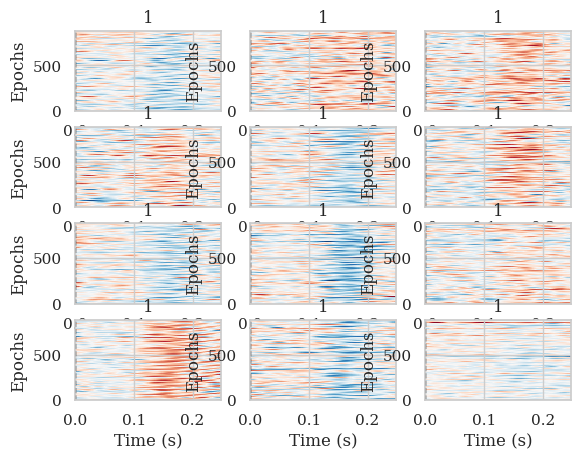

In [71]:
fig, ax = plt.subplots(4,3)
for i in range(len(subjects)):
    # plt.figure(5,figsize=(15,15))
    e = mne.EpochsArray(X_test_list[i][Y_test_list[i]==1],mne.create_info([str(i) for i in range(16)],500))
    print(ax[i//3,i%3])
    mne.viz.plot_epochs_image(e,1,axes=ax[i//3,i%3],evoked=False,colorbar=False,show=False)

In [16]:
y_pred_norm.shape

(5292,)

### Prepare data 2 for online like preproc

In [5]:
# subjects = [1,2]
subjects = [1,2,3,4,5,6,7,8,9,10,11,12]

# keep = ["O1", "O2", "Oz", "P7", "P3", "P4", "P8", "Pz","stim_trial","stim_epoch"]
keep = None

moabb_ds = CasitllosBurstVEP100()

n_channels = 32
on_frame = True
recenter = True
normalise = False
to_spd = True
if on_frame:
    freq = fps
else:
    freq = sfreq

In [6]:
raw_data,labels,codes,labels_codes = get_BVEP_data(subjects,on_frame,to_keep=keep,moabb_ds=moabb_ds)
# X_parent,Y_parent,domains_parent = prepare_data(subjects,raw_data,labels,on_frame,to_spd,recenter,codes=codes, normalise=normalise)



Choosing the first None classes from all possible events.


None
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad ep

C:\Users\s.velut\Documents\These\moabb\moabb\datasets\castillos2023.py:129: RuntimeWarning: Data file name in EEG.data (P13_burst100.fdt) is incorrect, the file name must have changed on disk, using the correct file name (P6_burst100.fdt).
  raw = mne.io.read_raw_eeglab(file_path_list[0], preload=True, verbose=False)


C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped


### LOOA adaptative online like preproc

In [18]:
from Alignments.riemannian import compute_ref_riemann, compute_riemannian_alignment


keras.backend.clear_session()
window_size=0.25
n_cal = 4
n_class = 4
nb_samples_cal = int(n_class*n_cal*(2.2-window_size)*fps)
spd_accuracy_code_looa = np.zeros(len(subjects))
spd_tps_train_code_looa = np.zeros(len(subjects))
spd_tps_test_code_looa = np.zeros(len(subjects))
spd_accuracy_looa = np.zeros(len(subjects))
batchsize = 64 #len(subjects)8 # 64 for burst
epoch = 20 #45 # 20 for burst

for i in range(len(subjects)):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(len(subjects)) if j!=i]
    X = np.zeros((raw_data.shape[0],raw_data.shape[1],raw_data.shape[2],raw_data.shape[2]))
    Y = labels.copy()
    # domains = domains_parent.copy()

    for j in range(len(subjects)):
            cov = Covariances(estimator="lwf")
            xdawncov = XdawnCovariances(estimator="lwf",xdawn_estimator="lwf",nfilter=16,classes=[1])
            
            
            if j==i:
                xdawncov = xdawncov.fit(raw_data[j][:nb_samples_cal],Y[j][:nb_samples_cal])
                X[j] = xdawncov.transform(raw_data[j])

                # data = copy.deepcopy(X[j][:nb_samples_cal])

                r_ra = compute_ref_riemann(data=X[j][:nb_samples_cal][Y[j][:nb_samples_cal]==1], mean=None, dtype='covmat')
                result = np.matmul(r_ra, X[j])
                X[j] = np.matmul(result, r_ra)


            else:
                xdawncov = xdawncov.fit(raw_data[j],Y[j])
                X[j] = xdawncov.transform(raw_data[j])
                r_ra = compute_ref_riemann(data=X[j][Y[j]==1], mean=None, dtype='covmat')
                result = np.matmul(r_ra, X[j])
                X[j] = np.matmul(result, r_ra)

            print("Recentering the matrix")
            

    X_train = np.concatenate([np.concatenate(X[ind2take]).reshape(-1,X.shape[-2],X.shape[-1]),X[i][:nb_samples_cal]]).reshape(-1,X.shape[-2],X.shape[-1])
    Y_train = np.concatenate([np.concatenate(Y[ind2take]).reshape(-1),Y[i][:nb_samples_cal]]).reshape(-1)
    X_test = X[i][nb_samples_cal:]
    Y_test = Y[i][nb_samples_cal:]

    labels_code_test = labels_codes[i][n_cal*n_class:]
    print(labels_code_test.shape)

    # X_std = X_train.std(axis=0)
    # X_train /= X_std + 1e-8
    # X_std = X_test.std(axis=0)
    # X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    rus = RandomUnderSampler()
    counter=np.array(range(0,len(Y_train))).reshape(-1,1)
    index,_ = rus.fit_resample(counter,Y_train[:])
    X_train = np.squeeze(X_train[index,:,:], axis=1)
    Y_train = np.squeeze(Y_train[index])
    # print(Y_train)

    print(X_train[Y_train==1].shape)
    print(X_test.shape)

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = SPDNet_Tensorflow(bimap_dims=[28,14,7])

    print("Fitting")
    start = time.time()
    weight_decay = 1e-4
    
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)
    history = clf.fit(np.array(x_train), y_train,
                    batch_size=batchsize, epochs=epoch,
                    validation_data=(np.array(x_val), y_val), shuffle=True)
    spd_tps_train_code_looa[i] = time.time() - start
    
    print("getting accuracy of participant ", i)
    start = time.time()
    y_pred = clf.predict(X_test)
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    spd_accuracy_looa[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)
    print(spd_accuracy_looa[i])

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=60, consecutive=50, window_size=window_size
    )
    spd_tps_test_code_looa[i] = time.time() - start
    spd_accuracy_code_looa[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    
    keras.backend.clear_session()
    del X_train
    del X_test
    del Y_train
    del Y_test

print(spd_accuracy_looa)
print(spd_accuracy_code_looa)
print(spd_tps_train_code_looa)
print(spd_tps_test_code_looa)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/LOOA_score",spd_accuracy_looa)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/LOOA_score_code",spd_accuracy_code_looa)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/LOOA_tps_train_code",spd_tps_train_code_looa)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/LOOA_tps_test_code",spd_tps_test_code_looa)


TL to the participant :  0
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(44,)
balancing the number of ones and zeros
(13520, 32, 32)
(5148, 32, 32)
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 8s 19ms/step - loss: 0.5061 - sparse_categorical_accuracy: 0.7644 - val_loss: 0.4768 - val_sparse_categorical_accuracy: 0.7781
Epoch 2/20
381/381 [==============================] - 7s 19ms/step - loss: 0.4243 - sparse_categorical_accuracy

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  6
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(44,)
balancing the number of ones and zeros
(13520, 32, 32)
(5148, 32, 32)
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 7s 17ms/step - loss: 0.5112 - sparse_categorical_accuracy: 0.7625 - val_loss: 0.4429 - val_sparse_categorical_accuracy: 0.8040
Epoch 2/20
381/381 [==============================] - 6s 17ms/step - loss: 0.4160 - sparse_categorical_accuracy

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  7
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(44,)
balancing the number of ones and zeros
(13520, 32, 32)
(5148, 32, 32)
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 7s 17ms/step - loss: 0.5176 - sparse_categorical_accuracy: 0.7575 - val_loss: 0.4670 - val_sparse_categorical_accuracy: 0.7811
Epoch 2/20
381/381 [==============================] - 6s 17ms/step - loss: 0.4248 - sparse_categorical_accuracy

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  10
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(32, 32)
(7020, 32, 32)
Recentering the matrix
(44,)
balancing the number of ones and zeros
(13520, 32, 32)
(5148, 32, 32)
Creating the different pipelines
Fitting
Epoch 1/20
381/381 [==============================] - 12s 24ms/step - loss: 0.4810 - sparse_categorical_accuracy: 0.7807 - val_loss: 0.4276 - val_sparse_categorical_accuracy: 0.8114
Epoch 2/20
381/381 [==============================] - 9s 23ms/step - loss: 0.4123 - sparse_categorical_accura

In [19]:
np.mean(spd_accuracy_code_looa)

0.8791666666666665

### Train Test online like preproc

In [17]:
from Alignments.riemannian import compute_ref_riemann, compute_riemannian_alignment


keras.backend.clear_session()
window_size=0.25
n_cal = 7
n_class = 4
nb_samples_cal = int(n_class*n_cal*(2.2-window_size)*fps)
spd_accuracy_code_looa = np.zeros(len(subjects))
spd_tps_train_code_looa = np.zeros(len(subjects))
spd_tps_test_code_looa = np.zeros(len(subjects))
spd_accuracy_looa = np.zeros(len(subjects))
batchsize = 64 #len(subjects)8 # 64 for burst
epoch = 20 #45 # 20 for burst

for i in range(len(subjects)):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(len(subjects)) if j!=i]
    X = np.zeros((raw_data.shape[0],raw_data.shape[1],raw_data.shape[2],raw_data.shape[2]))
    Y = labels.copy()
    # domains = domains_parent.copy()
    xdawncov = xdawncov.fit(raw_data[i][:nb_samples_cal],Y[i][:nb_samples_cal])
    X[i] = xdawncov.transform(raw_data[i])

    r_ra = compute_ref_riemann(data=X[i][:nb_samples_cal], mean=None, dtype='covmat')
    print(r_ra.shape)
    result = np.matmul(r_ra, X[i])
    X[i] = np.matmul(result, r_ra)
    print(X[i].shape)            

    X_train = X[i][:nb_samples_cal]
    Y_train = Y[i][:nb_samples_cal]
    X_test = X[i][nb_samples_cal:]
    Y_test = Y[i][nb_samples_cal:]

    labels_code_test = labels_codes[i][n_cal*n_class:]
    print(labels_code_test.shape)

    # X_std = X_train.std(axis=0)
    # X_train /= X_std + 1e-8
    # X_std = X_test.std(axis=0)
    # X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    rus = RandomUnderSampler()
    counter=np.array(range(0,len(Y_train))).reshape(-1,1)
    index,_ = rus.fit_resample(counter,Y_train[:])
    X_train = np.squeeze(X_train[index,:,:], axis=1)
    Y_train = np.squeeze(Y_train[index])
    # print(Y_train)

    print(X_train.shape)
    print(X_test.shape)

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = SPDNet_Tensorflow(bimap_dims=[28,14,7])

    print("Fitting")
    start = time.time()
    weight_decay = 1e-4
    
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)
    history = clf.fit(np.array(x_train), y_train,
                    batch_size=batchsize, epochs=epoch,
                    validation_data=(np.array(x_val), y_val), shuffle=True)
    spd_tps_train_code_looa[i] = time.time() - start
    
    print("getting accuracy of participant ", i)
    start = time.time()
    y_pred = clf.predict(X_test)
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    spd_accuracy_looa[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)
    print(spd_accuracy_looa[i])

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=60, consecutive=50, window_size=window_size
    )
    spd_tps_test_code_looa[i] = time.time() - start
    spd_accuracy_code_looa[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    
    keras.backend.clear_session()
    del X_train
    del X_test
    del Y_train
    del Y_test

print(spd_accuracy_looa)
print(spd_accuracy_code_looa)
print(spd_tps_train_code_looa)
print(spd_tps_test_code_looa)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/LOOA_score",spd_accuracy_looa)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/LOOA_score_code",spd_accuracy_code_looa)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/LOOA_tps_train_code",spd_tps_train_code_looa)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDNet/LOOA_tps_test_code",spd_tps_test_code_looa)


TL to the participant :  0
(32, 32)
(7020, 32, 32)
(32,)
balancing the number of ones and zeros
(1120, 32, 32)
(3744, 32, 32)
Creating the different pipelines
Fitting
Epoch 1/20
16/16 [==============================] - 1s 32ms/step - loss: 0.6894 - sparse_categorical_accuracy: 0.5575 - val_loss: 0.6726 - val_sparse_categorical_accuracy: 0.6071
Epoch 2/20
16/16 [==============================] - 0s 22ms/step - loss: 0.6007 - sparse_categorical_accuracy: 0.7133 - val_loss: 0.5975 - val_sparse_categorical_accuracy: 0.7232
Epoch 3/20
16/16 [==============================] - 0s 22ms/step - loss: 0.5621 - sparse_categorical_accuracy: 0.7589 - val_loss: 0.5806 - val_sparse_categorical_accuracy: 0.7054
Epoch 4/20
16/16 [==============================] - 0s 22ms/step - loss: 0.5392 - sparse_categorical_accuracy: 0.7827 - val_loss: 0.5851 - val_sparse_categorical_accuracy: 0.6875
Epoch 5/20
16/16 [==============================] - 0s 23ms/step - loss: 0.5201 - sparse_categorical_accuracy: 0.7946

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  4
(32, 32)
(7020, 32, 32)
(32,)
balancing the number of ones and zeros
(1120, 32, 32)
(3744, 32, 32)
Creating the different pipelines
Fitting
Epoch 1/20
16/16 [==============================] - 1s 27ms/step - loss: 0.7698 - sparse_categorical_accuracy: 0.5308 - val_loss: 0.6566 - val_sparse_categorical_accuracy: 0.6339
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6612 - sparse_categorical_accuracy: 0.6012 - val_loss: 0.6030 - val_sparse_categorical_accuracy: 0.6964
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6021 - sparse_categorical_accuracy: 0.6944 - val_loss: 0.5581 - val_sparse_categorical_accuracy: 0.7946
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5542 - sparse_categorical_accuracy: 0.7708 - val_loss: 0.5132 - val_sparse_categorical_accuracy: 0.8482
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5087 - sparse_categorical_accuracy: 0.8036

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  10
(32, 32)
(7020, 32, 32)
(32,)
balancing the number of ones and zeros
(1120, 32, 32)
(3744, 32, 32)
Creating the different pipelines
Fitting
Epoch 1/20
16/16 [==============================] - 1s 27ms/step - loss: 0.6807 - sparse_categorical_accuracy: 0.5923 - val_loss: 0.6853 - val_sparse_categorical_accuracy: 0.5536
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6191 - sparse_categorical_accuracy: 0.6577 - val_loss: 0.6437 - val_sparse_categorical_accuracy: 0.6429
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5726 - sparse_categorical_accuracy: 0.7212 - val_loss: 0.5925 - val_sparse_categorical_accuracy: 0.6518
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5329 - sparse_categorical_accuracy: 0.7530 - val_loss: 0.5543 - val_sparse_categorical_accuracy: 0.6875
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5025 - sparse_categorical_accuracy: 0.787

### Test One class classif

In [44]:
from sklearn.svm import OneClassSVM


keras.backend.clear_session()
window_size=0.25
n_cal = 7
n_class = 4
nb_samples_cal = int(n_class*n_cal*(2.2-window_size)*fps)
spd_accuracy_code_looa = np.zeros(len(subjects))
spd_tps_train_code_looa = np.zeros(len(subjects))
spd_tps_test_code_looa = np.zeros(len(subjects))
spd_accuracy_looa = np.zeros(len(subjects))
batchsize = 64 #len(subjects)8 # 64 for burst
epoch = 20 #45 # 20 for burst

for i in range(len([1,2])):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(len(subjects)) if j!=i]
    X = raw_data
    Y = labels.copy()
    # domains = domains_parent.copy()
    # xdawncov = xdawncov.fit(raw_data[i][:nb_samples_cal],Y[i][:nb_samples_cal])
    # X[i] = xdawncov.transform(raw_data[i])

    # r_ra = compute_ref_riemann(data=X[i][:nb_samples_cal], mean=None, dtype='covmat')
    # print(r_ra.shape)
    # result = np.matmul(r_ra, X[i])
    # X[i] = np.matmul(result, r_ra)
    # print(X[i].shape)            

    X_train = X[i][:nb_samples_cal]
    Y_train = Y[i][:nb_samples_cal]
    X_test = X[i][nb_samples_cal:]
    Y_test = Y[i][nb_samples_cal:]

    labels_code_test = labels_codes[i][n_cal*n_class:]
    print(labels_code_test.shape)

    # X_std = X_train.std(axis=0)
    # X_train /= X_std + 1e-8
    # X_std = X_test.std(axis=0)
    # X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    rus = RandomUnderSampler()
    counter=np.array(range(0,len(Y_train))).reshape(-1,1)
    index,_ = rus.fit_resample(counter,Y_train[:])
    X_train = np.squeeze(X_train[index,:,:], axis=1)
    Y_train = np.squeeze(Y_train[index])
    # print(Y_train)

    X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
    X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
    print(X_train.shape)
    print(X_test.shape)

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = OneClassSVM(gamma='scale', nu=0.001)

    print("Fitting")
    start = time.time()
    weight_decay = 1e-4
    
    history = clf.fit(np.array(X_train), Y_train)
    spd_tps_train_code_looa[i] = time.time() - start
    
    print("getting accuracy of participant ", i)
    start = time.time()
    y_pred = clf.predict(X_test)
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y == -1) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    spd_accuracy_looa[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)
    print(spd_accuracy_looa[i])

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=60, consecutive=50, window_size=window_size
    )
    spd_tps_test_code_looa[i] = time.time() - start
    spd_accuracy_code_looa[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    
    keras.backend.clear_session()

print(spd_accuracy_looa)
print(spd_accuracy_code_looa)
print(spd_tps_train_code_looa)
print(spd_tps_test_code_looa)

TL to the participant :  0
(32,)
balancing the number of ones and zeros
(1120, 4032)
(3744, 4032)
Creating the different pipelines
Fitting
getting accuracy of participant  0
0.4974548969072165


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  1
(32,)
balancing the number of ones and zeros
(1120, 4032)
(3744, 4032)
Creating the different pipelines
Fitting
getting accuracy of participant  1
0.49084246134020615


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


[0.4974549  0.49084246 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
[0.28 0.28 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
[0.49982715 0.34159756 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
[3.96103072 6.26015759 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


In [45]:
y_pred_norm[:100],y_test_norm[:100]

(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
        0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

## LOOA SPDBN net test spatio-temporal recentering

In [5]:
# subjects = [1,2,3,4]
subjects = [1,2,3,4,5,6,7,8,9,10,11,12]

# keep = ["O1", "O2", "Oz", "P7", "P3", "P4", "P8", "Pz","stim_trial","stim_epoch"]
keep = None

moabb_ds = CasitllosBurstVEP100()

n_channels = 32
on_frame = True
recenter = True
normalise = False
if on_frame:
    freq = fps
else:
    freq = sfreq

In [6]:
raw_data,labels,codes,labels_codes = get_BVEP_data(subjects,on_frame,to_keep=keep,moabb_ds=moabb_ds,window_size=0.4,start=-0.1)
X_parent,Y_parent,domains_parent = prepare_data(subjects,raw_data,labels,on_frame,False,recenter,codes=codes, normalise=normalise)

Choosing the first None classes from all possible events.


None
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad ep

C:\Users\s.velut\Documents\These\moabb\moabb\datasets\castillos2023.py:129: RuntimeWarning: Data file name in EEG.data (P13_burst100.fdt) is incorrect, the file name must have changed on disk, using the correct file name (P6_burst100.fdt).
  raw = mne.io.read_raw_eeglab(file_path_list[0], preload=True, verbose=False)


C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
7020 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 201 original time points ...
0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff fr

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
7020 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 201 original time points ...
0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff fr

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


7020 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 201 original time points ...
0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
7020 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 201 original time points ...
0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff freque

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
7020 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 201 original time points ...
0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff fr

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
7020 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 201 original time points ...
0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff fr

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 project

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'stim_trial', 'stim_epoch']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix
Recentering the matrix


In [7]:
def get_peak_time(X,Y,channel=16):
    Xevoked = np.mean(X[Y==1],axis=0)[channel]
    ind_max = np.argmax(Xevoked)
    t_max = ind_max * 1/500

    return t_max

In [19]:
def temp_recentering(X_train,X_test,Y_train,Y_test,domains_train,domain_test,start=-0.1):
    domains = np.unique(domains_train)
    t_max_list = [get_peak_time(X_train[domains_train==d],Y_train[domains_train==d]) for d in domains]

    t_mmax = np.mean(t_max_list)
    print(t_max_list)

    X_train_new = []

    for i,d in enumerate(domains):
        ti = t_max_list[i]
        diff = ti-t_mmax
        ind_min = int((diff-start)*500)
        ind_max = int(0.25*500)
        X_temp = X_train[domains_train==d][:,:,ind_min:ind_min+ind_max]
        X_temp = Euc2SPD(X_temp,Y_train[domains_train==d])

        X_train_new.append(X_temp)

        if domain_test==d:
            X_test_new = X_test[:,:,ind_min:ind_min+ind_max]


        # print(np.array(X_temp).shape)
    X_test_new = Euc2SPD(X_test_new,Y_test)
    return np.concatenate(X_train_new),np.array(X_test_new)

In [22]:
n_cal = 4
n_class = 4
nb_samples_cal = int(n_class*n_cal*(2.2-window_size)*fps)
spdbn_accuracy_code_looa = np.zeros(len(subjects))
spdbn_tps_train_code_looa = np.zeros(len(subjects))
spdbn_tps_test_code_looa = np.zeros(len(subjects))
spdbn_accuracy_looa = np.zeros(len(subjects))

for i in range(len(subjects)):
    print("TL to the participant : ", i)
    ind2take = [j for j in range(len(subjects)) if j!=i]
    X = X_parent.copy()
    Y = Y_parent.copy()
    domains = domains_parent.copy()

    X_train = np.concatenate([np.concatenate(X[ind2take]).reshape(-1,X.shape[-2],X.shape[-1]),X[i][:nb_samples_cal]]).reshape(-1,X.shape[-2],X.shape[-1])
    Y_train = np.concatenate([np.concatenate(Y[ind2take]).reshape(-1),Y[i][:nb_samples_cal]]).reshape(-1)
    domains_train = np.concatenate([np.concatenate(domains[ind2take]).reshape(-1),domains[i][:nb_samples_cal]]).reshape(-1)
    X_test = X[i][nb_samples_cal:]
    Y_test = Y[i][nb_samples_cal:]
    domains_test = domains[i][nb_samples_cal:]

    X_train,X_test = temp_recentering(X_train,X_test,Y_train,Y_test,domains_train,domains_test[0],start=-0.1)

    labels_code_test = labels_codes[i][n_cal*n_class:]

    print(X_train.shape)
    print(X_test.shape)
    # X_std = X_train.std(axis=0)
    # X_train /= X_std + 1e-8
    # X_std = X_test.std(axis=0)
    # X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    X_train, Y_train, domains_train = balance(X_train,Y_train,domains_train)

    print("Creating the different pipelines")
    lr = 1e-3
    # optimizer = riemannian_adam.RiemannianAdam(learning_rate=lr)
    batchsize = 64 #128 # 64 for burst
    epoch = 20 #45 # 20 for burst
    # clf = SPDNet_AJD(n_epochs=epoch,batch_size=batchsize,valid_split=0.1)
    clf = SPDNetBN_Module(bimap_dims=[32,28,14,7])

    print("Fitting")
    start = time.time()
    weight_decay = 1e-4
    
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)

    # Convert data into PyTorch tensors
    X_train_tensor = torch.tensor(x_train, dtype=torch.float64)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_val_tensor = torch.tensor(x_val, dtype=torch.float64)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float64)
    y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

    # Create DataLoader for train, validation, and test sets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    # Define loss function and optimizer
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch_riemannian_adam.RiemannianAdam(clf.parameters(), lr=0.001)

    # Train the model
    num_epochs = 20
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_dataloader:
            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = clf(inputs)
            loss = criterion(outputs.float(), labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_dataloader)}")

    print("Training finished!")
    spdbn_tps_train_code_looa[i] = time.time() - start

    # Validation
    clf.eval()
    val_correct = 0
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = clf(inputs)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()

    val_accuracy = val_correct / len(x_val)
    print(f"Validation Accuracy: {val_accuracy}")

    # Testing
    start = time.time()
    test_correct = 0
    y_pred= []
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = clf(inputs)
            _, predicted = torch.max(outputs, 1)
            y_pred.append(predicted)
            test_correct += (predicted == labels).sum().item()
            
    test_accuracy = test_correct / len(X_test)
    print(f"Test Accuracy: {balanced_accuracy_score(Y_test,y_pred)}")
    
    print("getting accuracy of participant ", i)
    y_pred = np.concatenate(y_pred)
    y_pred = np.array(y_pred)
    y_pred_norm = np.array([1 if (y >= 0.5) else 0 for y in y_pred])
    y_test_norm = np.array([0 if y == 0 else 1 for y in Y_test])

    tn, fp, fn, tp = confusion_matrix(y_test_norm, y_pred_norm).ravel()
    spdbn_accuracy_looa[i] = balanced_accuracy_score(y_test_norm,y_pred_norm)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
        y_pred_norm, codes, min_len=30, sfreq=fps, consecutive=50, window_size=window_size
    )
    spdbn_tps_test_code_looa[i] = time.time() - start
    spdbn_accuracy_code_looa[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    print(f"Code Accuracy: {spdbn_accuracy_code_looa}")
    keras.backend.clear_session()

print(spdbn_accuracy_looa)
print(spdbn_tps_train_code_looa)
print(spdbn_tps_test_code_looa)
print(spdbn_accuracy_code_looa)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/score/LOOA_score",spdbn_accuracy_looa)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/score_code/LOOA_score_code",spdbn_accuracy_code_looa)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/tps_code/LOOA_tps_train_code",spdbn_tps_train_code_looa)
# np.save("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/SPDbnNet/tps_code/LOOA_tps_test_code",spdbn_tps_test_code_looa)

TL to the participant :  0
[0.258, 0.272, 0.264, 0.26, 0.258, 0.264, 0.27, 0.262, 0.268, 0.268, 0.262, 0.272]
shape of cov (1872, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (5148, 32, 32)
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6956435083717186
Epoch 2, Loss: 0.6809497556974256
Epoch 3, Loss: 0.6784213340188575
Epoch 4, Loss: 0.6774588330524174
Epoch 5, Loss: 0.6767030195614171
Epoch 6, Loss: 0.6763345495922359
Epoch 7, Loss: 0.6750038854406262
Epoch 8, Loss: 0.6746051794900669
Epoch 9, Loss: 0.6738115876052636
Epoch 10, Loss: 0.6737639821107619
Epoch 11, Loss: 0.6734250474163866
Epoch 12, Loss: 0.6732866853240906
Epoc

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



TL to the participant :  1
[0.256, 0.272, 0.264, 0.26, 0.258, 0.264, 0.27, 0.262, 0.268, 0.268, 0.262, 0.272]
shape of cov (7020, 32, 32)
shape of cov (1872, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (5148, 32, 32)
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6887888900564099
Epoch 2, Loss: 0.6714779091632272
Epoch 3, Loss: 0.6693860295563545
Epoch 4, Loss: 0.6668760806243876
Epoch 5, Loss: 0.666013658672493
Epoch 6, Loss: 0.6657759171771253
Epoch 7, Loss: 0.6648955897396318
Epoch 8, Loss: 0.6637741302254945
Epoch 9, Loss: 0.664244132874206
Epoch 10, Loss: 0.6637130855262436
Epoch 11, Loss: 0.6643577781249219
Epoch 12, Loss: 0.6630431856383175
Epoch

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  2
[0.256, 0.272, 0.264, 0.26, 0.258, 0.264, 0.27, 0.262, 0.268, 0.268, 0.262, 0.272]
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (1872, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (5148, 32, 32)
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6751707895534245
Epoch 2, Loss: 0.6571324231430614
Epoch 3, Loss: 0.65522700548172
Epoch 4, Loss: 0.6543568388370704
Epoch 5, Loss: 0.6539557887500352
Epoch 6, Loss: 0.6531860080603852
Epoch 7, Loss: 0.6528301376683192
Epoch 8, Loss: 0.6531262543257765
Epoch 9, Loss: 0.6532474535656726
Epoch 10, Loss: 0.6530694462495839
Epoch 11, Loss: 0.6525974459848379
Epoch 12, Loss: 0.6524108158634716
Epoch 

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  8
[0.256, 0.272, 0.264, 0.26, 0.258, 0.264, 0.27, 0.262, 0.268, 0.268, 0.26, 0.272]
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (1872, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (5148, 32, 32)
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6731677857909616
Epoch 2, Loss: 0.6529018819488566
Epoch 3, Loss: 0.6500974316296615
Epoch 4, Loss: 0.648869481299493
Epoch 5, Loss: 0.6471753786867998
Epoch 6, Loss: 0.6484344024357833
Epoch 7, Loss: 0.6462149410423018
Epoch 8, Loss: 0.6465441348358715
Epoch 9, Loss: 0.645933474299163
Epoch 10, Loss: 0.6446515159031224
Epoch 11, Loss: 0.6451129306332646
Epoch 12, Loss: 0.6444026849714164
Epoch 1

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  9
[0.256, 0.272, 0.264, 0.26, 0.258, 0.264, 0.27, 0.262, 0.268, 0.268, 0.262, 0.272]
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (1872, 32, 32)
shape of cov (5148, 32, 32)
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6709136964455051
Epoch 2, Loss: 0.6519660857405876
Epoch 3, Loss: 0.6498805002903375
Epoch 4, Loss: 0.6492727758690441
Epoch 5, Loss: 0.6468963809213614
Epoch 6, Loss: 0.6472208352852369
Epoch 7, Loss: 0.6456203118083984
Epoch 8, Loss: 0.6467992159638192
Epoch 9, Loss: 0.6456242087944912
Epoch 10, Loss: 0.6449820604224218
Epoch 11, Loss: 0.6452549537961564
Epoch 12, Loss: 0.6449597998866885
Epoc

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


TL to the participant :  10
[0.256, 0.272, 0.264, 0.26, 0.258, 0.264, 0.27, 0.262, 0.268, 0.268, 0.262, 0.272]
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (1872, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (7020, 32, 32)
shape of cov (5148, 32, 32)
(79092, 32, 32)
(5148, 32, 32)
balancing the number of ones and zeros
Creating the different pipelines
Fitting
Epoch 1, Loss: 0.6792217364774289
Epoch 2, Loss: 0.6594669240040416
Epoch 3, Loss: 0.6572668968536096
Epoch 4, Loss: 0.655109602635301
Epoch 5, Loss: 0.6552413985172282
Epoch 6, Loss: 0.6541710968405556
Epoch 7, Loss: 0.6541159943019937
Epoch 8, Loss: 0.6535096533029411
Epoch 9, Loss: 0.652464306729985
Epoch 10, Loss: 0.6516995428428249
Epoch 11, Loss: 0.6503554818824208
Epoch 12, Loss: 0.6515938103042562
Epoch

## Train test ERP TS+LDA

In [ ]:
def create_template(trial_len,code,sfreq,fps):
    y = np.zeros(trial_len)
    code_pos = 0
    for idx in range(trial_len):
        if idx/sfreq >= (code_pos+1)/fps:
            code_pos += 1 
        y[idx] = int(code[code_pos])

    return y

In [ ]:
# Get target frequency list
event_id = epochs.event_id
peaks = [float(peak) for peak in codes.keys()]  # HERE

# Get lenght of the wave (length of trials)
trial_len = raw_data_dl.shape[-1]  # HERE

# Make time points 't'
t = np.arange(0, trial_len / sfreq, 1 / sfreq)  # HERE

# Create empty array
n_class = len(peaks)  # HERE
ref_signals = np.zeros((n_class, trial_len))  # HERE

# Iterate over peaks (the index will be needed to add waves to ref_signals at the end
for class_idx, peak in enumerate(peaks):
    y = create_template(trial_len,codes[class_idx],sfreq,60)
    
    # Add to the empty array
    ref_signals[class_idx, :] = y  # HERE

In [ ]:
ref_signals[labels_dl[0][0:28], :].T.shape

In [ ]:
# Empty list for predictions
y_pred = []

# CCA model
cca = CCA(n_components=1, max_iter=1000)

# Loop over trials
n_trials, _, _ = raw_data_dl[0].shape


for trial_n in range(n_trials):
    # Empty list to store the correlations
    corrs = []
    next_trial = raw_data_dl[0][trial_n, ...]

    # Iterate over classes
    for class_idx in range(len(peaks)):
        # Get the corresponding template
        template = ref_signals[class_idx, :]

        # Fit CCA and transform
        cca.fit(next_trial.T, template.T)
        x_scores, y_scores = cca.fit_transform(next_trial.T, template.T)

        # Get correlation
        corr_score = np.corrcoef(x_scores, y_scores, rowvar=False)[0, 1]
        corrs.append(corr_score)
    
    # Append the label of the max correlation to the pred list
    trial_pred = np.argmax(corrs)
    y_pred.append(trial_pred)

# Get accuracy
acc_score = accuracy_score(labels_dl[0], y_pred)
print(f'Total accuracy score: {acc_score}')

In [ ]:
n_cal = 7
accuracy_code_perso = np.zeros(12)
tps_code_perso = np.zeros(12)
accuracy_perso = np.zeros(12)

for i in range(12):
    print("TL to the participant : ", i)
    X_train = raw_data_dl[i][:n_class*n_cal]
    Y_train = labels_dl[i][:n_class*n_cal]
    
    Y_test = labels_dl[i][n_class*n_cal:]
    X_test = raw_data_dl[i][n_class*n_cal:]
    labels_code_test = Y_test

    print(X_train.shape)
    print(X_test.shape)
    X_std = X_train.std(axis=0)
    X_train /= X_std + 1e-8
    X_std = X_test.std(axis=0)
    X_test /= X_std + 1e-8

    print("balancing the number of ones and zeros")
    rus = RandomUnderSampler()
    counter=np.array(range(0,len(Y_train))).reshape(-1,1)
    index,_ = rus.fit_resample(counter,Y_train[:])
    X_train = np.squeeze(X_train[index,:,:], axis=1)
    Y_train = np.squeeze(Y_train[index])

    print("Creating the different pipelines")
    clf = make_pipeline(XdawnCovariances(nfilter=8, estimator="oas", xdawn_estimator="lwf"),
            TangentSpace(),
            LDA(solver="lsqr", shrinkage="auto"))
    
    print("Fitting")
    clf = clf.fit(np.array(X_train), Y_train)
    y_pred = clf.predict(X_test)
    print("getting accuracy of participant ", i)
    accuracy_perso[i] = balanced_accuracy_score(Y_test,y_pred)

    labels_pred_accumul, _, mean_long_accumul = make_preds_accumul_aggresive(
            y_pred, dataset_moabb.codes, min_len=30, sfreq=60, consecutive=50, window_size=window_size
    )
    tps_code_perso[i] = np.mean(mean_long_accumul)
    accuracy_code_perso[i] = np.round(accuracy_score(labels_code_test[labels_pred_accumul!=-1], labels_pred_accumul[labels_pred_accumul!=-1]), 2)
    keras.backend.clear_session()

print(accuracy_perso)
print(tps_code_perso)
print(accuracy_code_perso)